In [0]:
#Dataset Output Classes

# 0 ->Actinic Keratoses (Solar Keratoses) and Intraepithelial Carcinoma
# 1 ->Basal cell carcinoma
# 2 ->Benign keratosis
# 3 ->Dermatofibroma
# 4 ->Melanocytic nevi
# 5 ->Vascular skin lesions
# 6 ->Melanoma

In [2]:
from google.colab import drive
drive.mount("/content/gdrive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import pandas as pd

In [0]:
df = pd.read_csv("/content/gdrive/My Drive/8th Semester Project/hmnist_28_28_RGB.csv")

In [5]:
df.groupby('label').size()

label
0     327
1     514
2    1099
3     115
4    6705
5     142
6    1113
dtype: int64

In [0]:
labels = df['label']

In [0]:
df = df.drop('label',axis = 1)

In [0]:
data = df.values

In [9]:
data.shape

(10015, 2352)

In [0]:
data = data.reshape(-1,28,28,3)

In [0]:
import numpy as np

In [0]:
labels = np.array(labels)

In [13]:
labels.shape

(10015,)

In [0]:
first_time = False

In [0]:
#Handling Skew in the data

In [0]:
data = list(data)

In [29]:
data[0].shape

(28, 28, 3)

In [30]:
len(data)

10015

In [0]:
labels = list(labels)

In [15]:
if(first_time):
  from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [0]:
if(first_time):
  datagen = ImageDataGenerator(
      featurewise_center=True,
      featurewise_std_normalization=True,
      rotation_range=20,
      width_shift_range=0.2,
      height_shift_range=0.2,
      horizontal_flip=True)

In [0]:
if(first_time):
  l = len(labels)

In [0]:
if(first_time):
  for i in range(l):
    label = labels[i]
    num =0
    if(label==0 or label ==3 or label==5):
      num =3
    elif(label==1):
      num =2
    for j in range(num):
      image = datagen.random_transform(data[i])
      data.append(image)
      labels.append(label)
    print("Done for ",i,'/',l)

In [0]:
if(first_time):
  assert len(labels) == len(data)

In [0]:
import pickle

In [0]:
if(first_time):
  pickle.dump([data,labels],open("/content/gdrive/My Drive/8th Semester Project/skin_data.pickle","wb"))

In [0]:
if(not first_time):
  data,labels = pickle.load(open("/content/gdrive/My Drive/8th Semester Project/skin_data.pickle","rb"))

In [48]:
len(data)

12795

In [49]:
len(labels)

12795

In [50]:
data_dist = {}

for i in range(7):
  data_dist[i] = 0

for i in labels:
  data_dist[i]+=1

data_dist

{0: 1308, 1: 1542, 2: 1099, 3: 460, 4: 6705, 5: 568, 6: 1113}

In [52]:
data = np.array(data)
data.shape

(12795, 28, 28, 3)

In [0]:
labels = np.array(labels)

In [54]:
labels.shape

(12795,)

In [0]:
#Visualize Data

In [0]:
import matplotlib.pyplot as plt

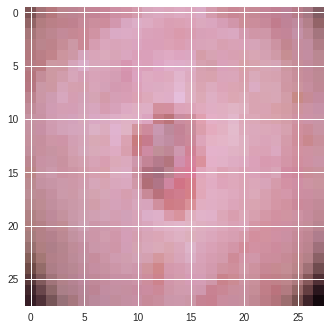

In [57]:
plt.imshow(data[8])

In [0]:
import keras

In [0]:
labels = keras.utils.to_categorical(labels, num_classes=7, dtype='float32')

In [0]:
import sklearn

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

In [0]:
#CNN Model

In [0]:
from keras.models import Sequential

In [0]:
from keras import regularizers

In [0]:
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense, Dropout, Flatten

In [0]:
batch_size = 128
num_classes = 7
number_of_epochs = 100

In [0]:
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(28,28,3), padding='same',activation='relu'))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))

model.add(Flatten())

model.add(Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.40))

model.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.35))

model.add(Dense(7, activation='softmax' ))

model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])

In [69]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7, 128)         73856     
__________

In [0]:
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=2,
                              verbose=0, mode='auto')

In [71]:
model.fit(x_train, y_train,batch_size=batch_size,epochs=number_of_epochs,verbose=1,validation_data=(x_test, y_test),callbacks = [early_stopping])

Train on 10236 samples, validate on 2559 samples
Epoch 1/100
10236/10236 [==============================] - 17s 2ms/step - loss: 6.4086 - acc: 0.5061 - val_loss: 3.7691 - val_acc: 0.5236
Epoch 2/100
10236/10236 [==============================] - 11s 1ms/step - loss: 2.7487 - acc: 0.5472 - val_loss: 1.9128 - val_acc: 0.5830
Epoch 3/100
10236/10236 [==============================] - 11s 1ms/step - loss: 1.6206 - acc: 0.5727 - val_loss: 1.3886 - val_acc: 0.5873
Epoch 4/100
10236/10236 [==============================] - 11s 1ms/step - loss: 1.3045 - acc: 0.5821 - val_loss: 1.3059 - val_acc: 0.5701
Epoch 5/100
10236/10236 [==============================] - 11s 1ms/step - loss: 1.2190 - acc: 0.5855 - val_loss: 1.1747 - val_acc: 0.5928
Epoch 6/100
10236/10236 [==============================] - 11s 1ms/step - loss: 1.1911 - acc: 0.5858 - val_loss: 1.1500 - val_acc: 0.5912
Epoch 7/100
10236/10236 [==============================] - 11s 1ms/step - loss: 1.1720 - acc: 0.5927 - val_loss: 1.1326 - v

In [0]:
model.save('/content/gdrive/My Drive/8th Semester Project/skin_cancer_classification__model.h5')

In [0]:
#Performance Metrics

In [0]:
actual_output = []
obtained_output = []

In [0]:
#Make predictions
obtained_output = model.predict(x_test)
actual_output = y_test

In [0]:
obtained_output = [np.argmax(i) for i in obtained_output]
actual_output = [np.argmax(i) for i in y_test]

In [0]:
assert len(list(obtained_output)) == len(list(actual_output))

In [122]:
number_correct = 0
for i in range(len(obtained_output)):
  if(obtained_output[i]==actual_output[i]):
    number_correct +=1
print("Accurcay is : ",number_correct/len(obtained_output))

Accurcay is :  0.6643220007815553


In [0]:
from sklearn.metrics import f1_score

In [125]:
f1score = f1_score(actual_output,obtained_output,average='weighted')

print("F1 Score is : ",f1score)

F1 Score is :  0.6445268078084067


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [0]:
from sklearn.metrics import recall_score

In [127]:
recall = recall_score(actual_output,obtained_output,average='weighted')

print("Recall Score is : ",recall)

Recall Score is :  0.6643220007815553


In [0]:
from sklearn.metrics import precision_score

In [129]:
precision = precision_score(actual_output,obtained_output,average = 'weighted')

print("Precision Score is : ",precision)

Precision Score is :  0.6495696676875842


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [0]:
#LIME Explanations

In [74]:
!pip install lime

    100% |████████████████████████████████| 276kB 5.2MB/s 
  Stored in directory: /root/.cache/pip/wheels/48/13/7c/20792e4efe5fd04237c0ac92bc8551acfe36392e09953ac8ea
Successfully built lime


In [0]:
import lime
from lime import lime_image

In [0]:
def prediction_function(x):
  result = model.predict(x.reshape(-1,28,28,3).astype(np.float32))
  return result

In [0]:
explainer = lime_image.LimeImageExplainer()

In [0]:
def add_noise(image):
  row,col,ch = image.shape
  s_vs_p = 0.5
  amount = 0.01
  out = np.copy(image)
  # Salt mode
  num_salt = np.ceil(amount * image.size * s_vs_p)
  coords = [np.random.randint(0, i - 1, int(num_salt))
          for i in image.shape]
  out[coords] = 1

  # Pepper mode
  num_pepper = np.ceil(amount* image.size * (1. - s_vs_p))
  coords = [np.random.randint(0, i - 1, int(num_pepper))
          for i in image.shape]
  out[coords] = 0
  return out

In [0]:
from skimage.measure import structural_similarity as ssim
import cv2

In [0]:
def mse(imageA, imageB):
	# the 'Mean Squared Error' between the two images is the
	# sum of the squared difference between the two images;
	# NOTE: the two images must have the same dimension
	err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
	err /= float(imageA.shape[0] * imageA.shape[1])
	
	# return the MSE, the lower the error, the more "similar"
	# the two images are
	return err

In [0]:
def compare_images(imageA, imageB, title):
  # compute the mean squared error and structural similarity
  # index for the images
  m = mse(imageA, imageB)
  s = ssim(imageA, imageB,multichannel=True)

  # setup the figure
  fig = plt.figure(title)
  plt.suptitle("MSE: %.2f, SSIM: %.2f" % (m, s))

  # show first image
  ax = fig.add_subplot(1, 2, 1)
  plt.imshow(imageA, cmap = plt.cm.gray)
  plt.axis("off")

  # show the second image
  ax = fig.add_subplot(1, 2, 2)
  plt.imshow(imageB, cmap = plt.cm.gray)
  plt.axis("off")

  # show the images
  plt.show() 
  return m,s

In [0]:
from lime.wrappers.scikit_image import SegmentationAlgorithm

In [0]:
from skimage.color import gray2rgb, rgb2gray, label2rgb

In [0]:
segmenter = SegmentationAlgorithm('quickshift', kernel_size=1, max_dist=200, ratio=0.2)

In [0]:
def return_explanation_image(image,y,filename):
  explanation = explainer.explain_instance(image,classifier_fn = prediction_function,top_labels=7, hide_color=0, num_samples=100, segmentation_fn=segmenter)
  output = np.argmax(y)
  
  temp, mask = explanation.get_image_and_mask(output, positive_only=True, num_features=10, hide_rest=False, min_weight = 0.01)
  fig= plt.figure()
  (ax1) = fig.add_subplot(2,1,1)
  ax1.imshow(label2rgb(mask,temp, bg_label = 0), interpolation = 'nearest')
  ax1.set_title('Positive Regions for {}'.format(output))
  
  
  fig.savefig(filename)
  img = cv2.imread(filename)
  
  return img

In [0]:
#Test Explanation 

In [198]:
explanation = explainer.explain_instance(x_test[0], 
                                         classifier_fn = prediction_function, 
                                         top_labels=7, hide_color=0, num_samples=100, segmentation_fn=segmenter)

/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))


In [199]:
sample_test_input = x_test[2]
sample_test_input.shape

(28, 28, 3)

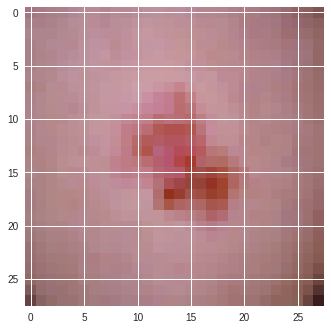

In [200]:
plt.imshow(sample_test_input)

In [201]:
output = np.argmax(y_test[0])
output

4

In [202]:
np.argmax(prediction_function(x_test[0]))

4

/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))


Text(0.5, 1.0, 'Positive Regions for 4')

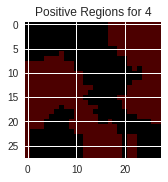

In [203]:
temp, mask = explanation.get_image_and_mask(output, positive_only=True, num_features=10, hide_rest=False, min_weight = 0.01)
fig= plt.figure()
(ax1) = fig.add_subplot(2,1,1)
ax1.imshow(label2rgb(mask,temp, bg_label = 0), interpolation = 'nearest')
ax1.set_title('Positive Regions for {}'.format(output))

In [0]:
fig.savefig("sample_input_explanation.jpeg")

/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))


Text(0.5, 1.0, 'Positive and Negative Regions for 4')

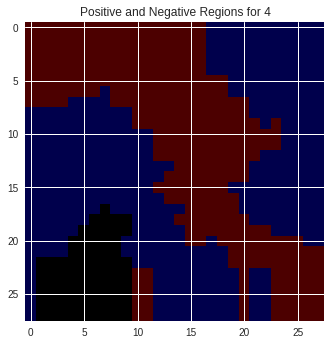

In [205]:
temp1, mask1 = explanation.get_image_and_mask(output, positive_only=False, num_features=10, hide_rest=False, min_weight = 0.01)
(ax2) = plt.subplot()
ax2.imshow(label2rgb(mask1,temp1, bg_label = 0), interpolation = 'nearest')
ax2.set_title('Positive and Negative Regions for {}'.format(output))

In [0]:
noisy_input = add_noise(sample_test_input)

In [207]:
noisy_input.shape

(28, 28, 3)

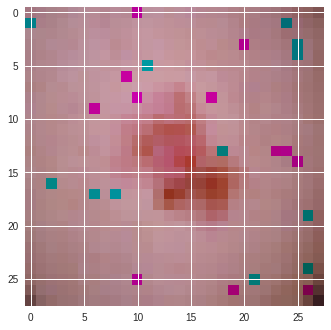

In [208]:
plt.imshow(noisy_input)

/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


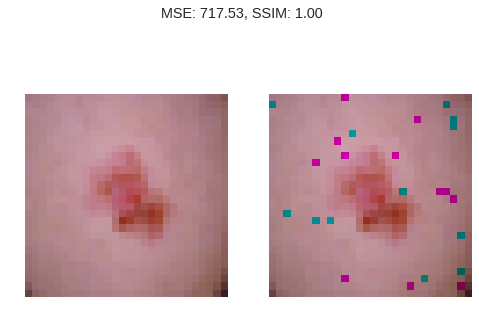

In [209]:
mse1,s1 = compare_images(sample_test_input,noisy_input,"Image Difference")

In [210]:
explanation = explainer.explain_instance(noisy_input, 
                                         classifier_fn = prediction_function, 
                                         top_labels=7, hide_color=0, num_samples=100, segmentation_fn=segmenter)

/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))


/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))


Text(0.5, 1.0, 'Positive Regions for 4')

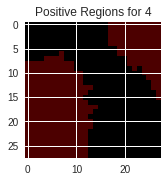

In [211]:
temp, mask = explanation.get_image_and_mask(output, positive_only=True, num_features=10, hide_rest=False, min_weight = 0.01)
fig= plt.figure()
(ax1) = fig.add_subplot(2,1,1)
ax1.imshow(label2rgb(mask,temp, bg_label = 0), interpolation = 'nearest')
ax1.set_title('Positive Regions for {}'.format(output))

In [0]:
fig.savefig("noisy_input_explanation.jpeg")

In [0]:
img = cv2.imread('noisy_input_explanation.jpeg')

In [0]:
img2 = cv2.imread('sample_input_explanation.jpeg')

In [215]:
img2.shape

(396, 576, 3)

/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


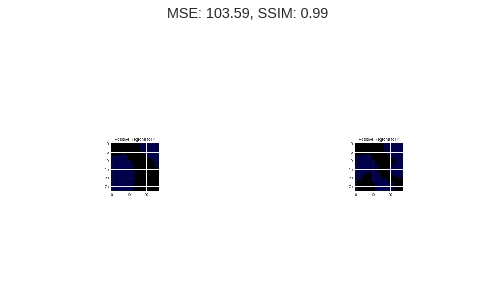

In [216]:
mse2,s2= compare_images(img,img2,"Explanation Difference")

In [0]:
#stability score for the current image
# stability = change in the explanation / change in the input
stability = mse2/mse1

In [218]:
stability

0.1443715667480359

In [0]:
number_of_samples = 200

In [195]:
img.shape

(396, 576, 3)

In [0]:
stabilities = []

/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


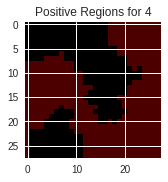

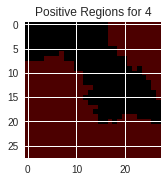

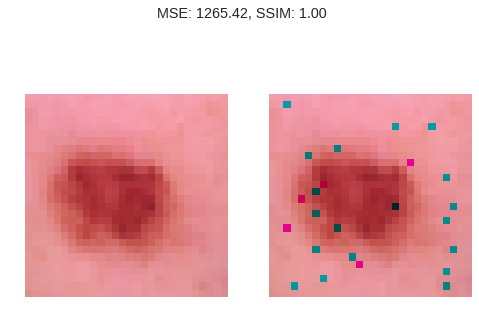

/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


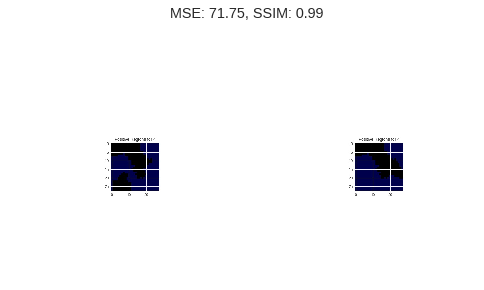

Done for  0 / 200


/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


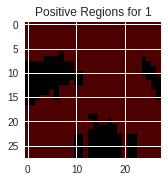

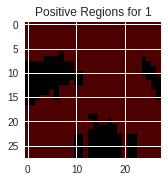

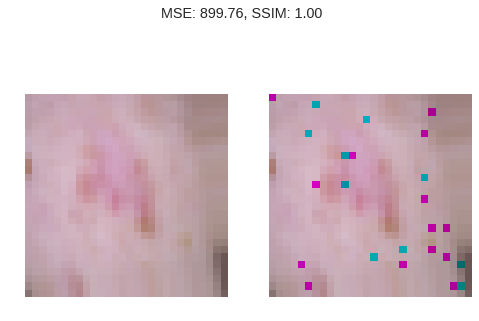

/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


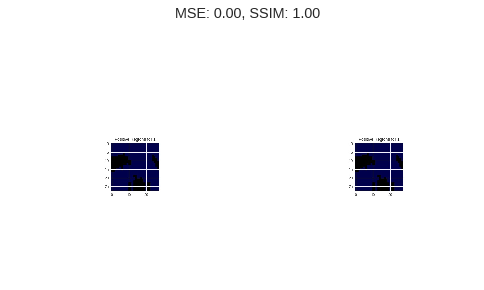

Done for  1 / 200


/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


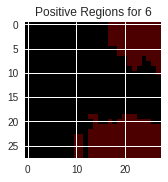

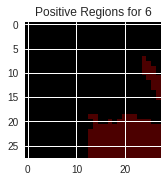

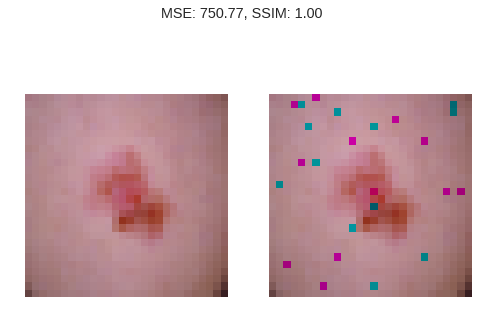

/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


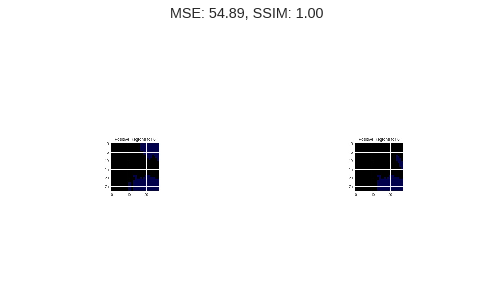

Done for  2 / 200


/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


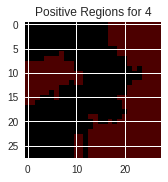

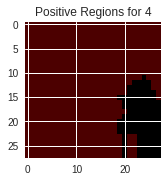

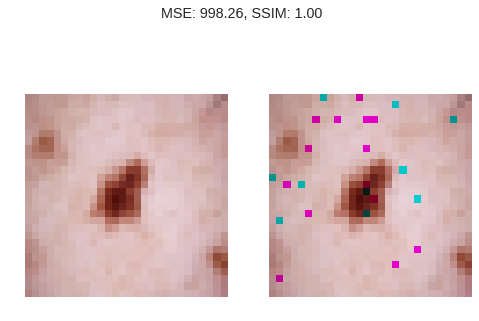

/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


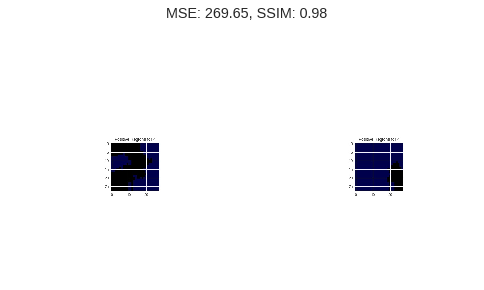

Done for  3 / 200


/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


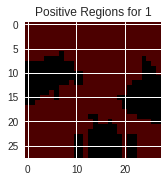

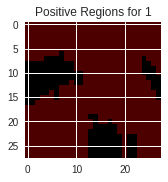

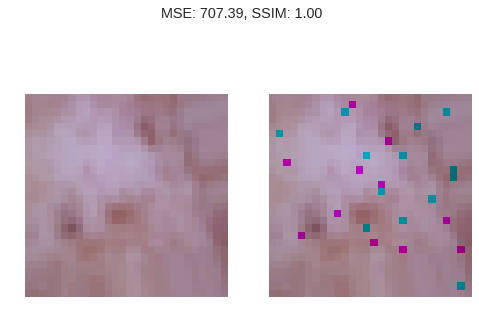

/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


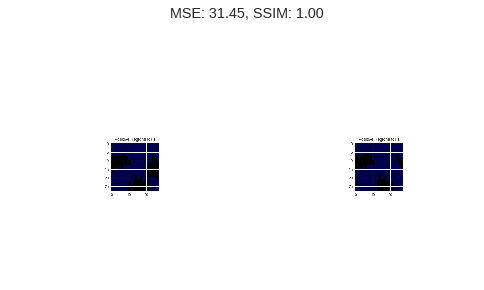

Done for  4 / 200


/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


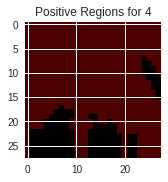

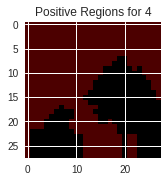

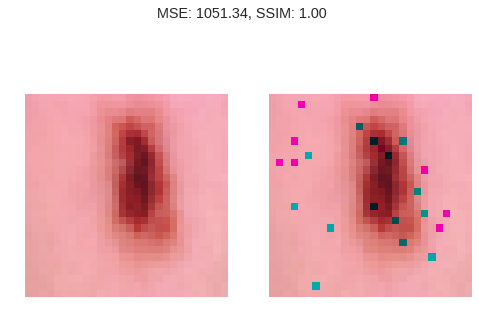

/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


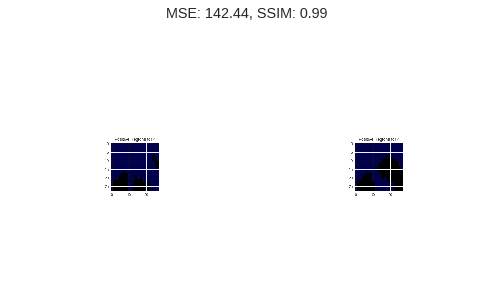

Done for  5 / 200


/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


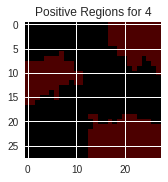

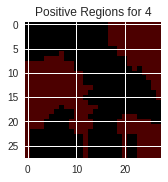

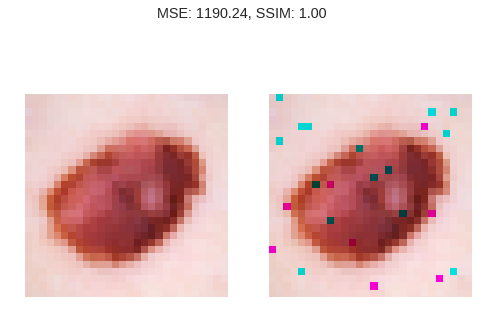

/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


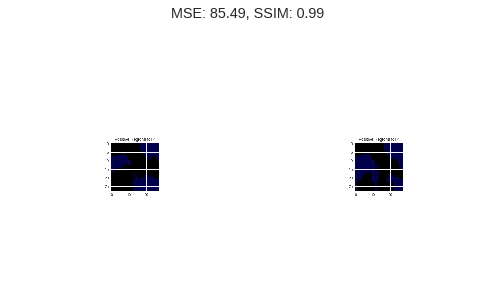

Done for  6 / 200


/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


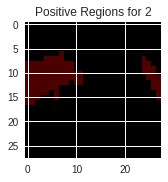

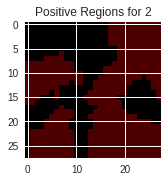

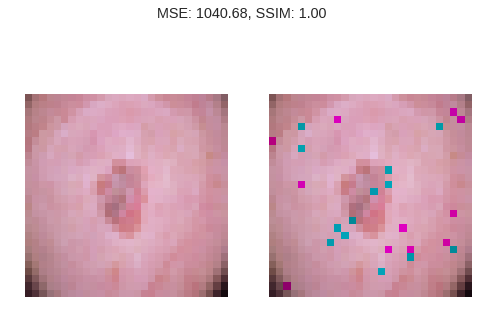

/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


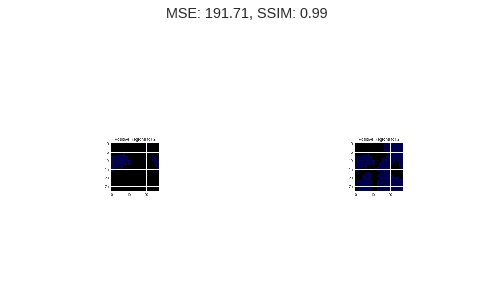

Done for  7 / 200


/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


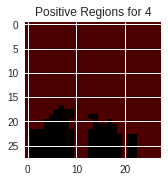

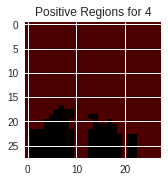

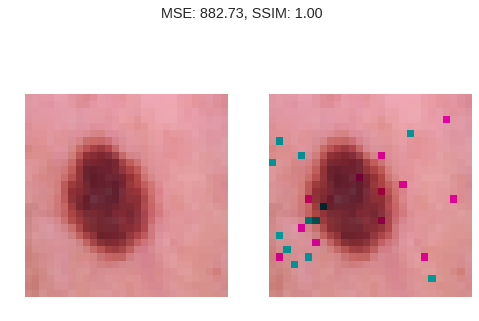

/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


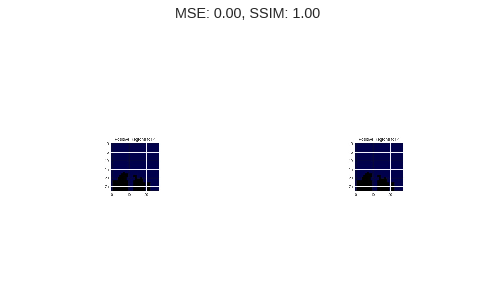

Done for  8 / 200


/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


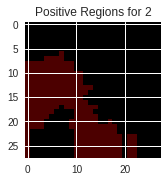

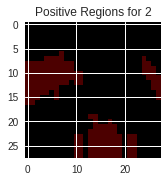

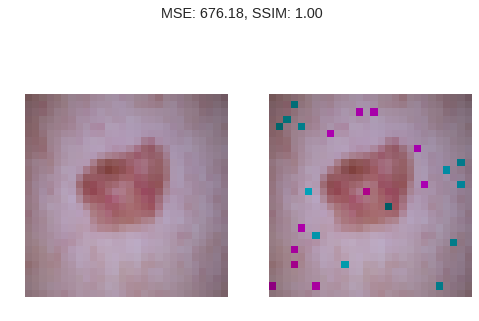

/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


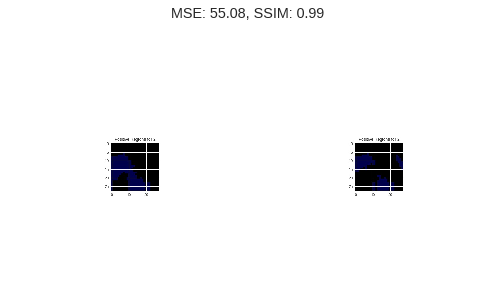

Done for  9 / 200


/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


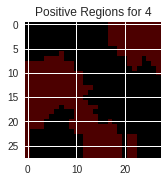

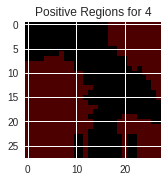

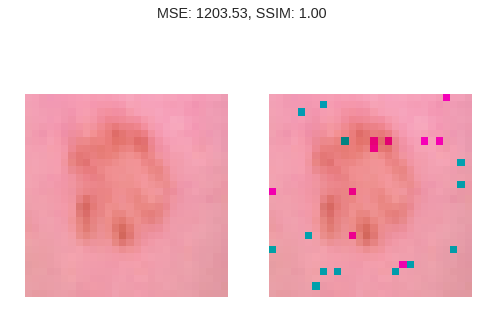

/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


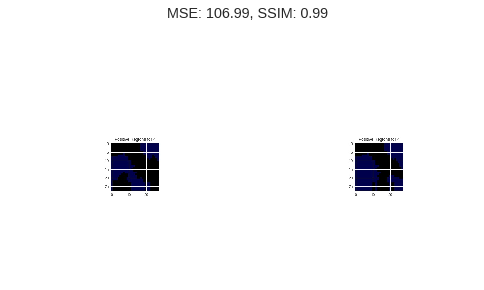

Done for  10 / 200


/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


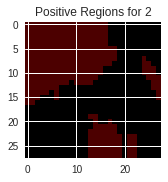

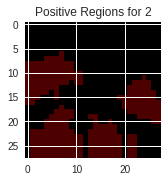

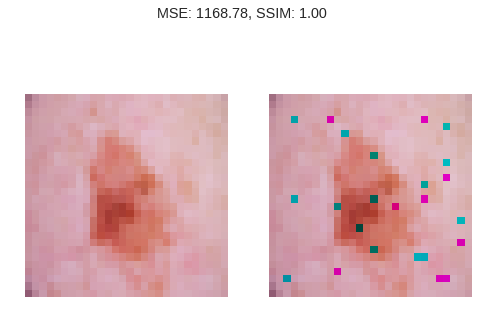

/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


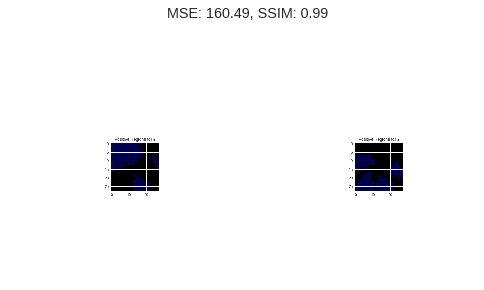

Done for  11 / 200


/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


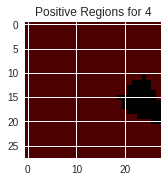

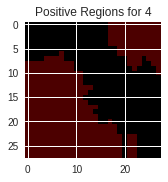

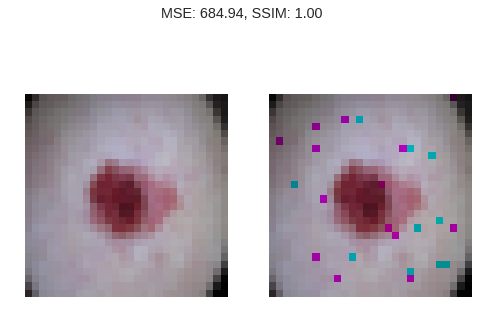

/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


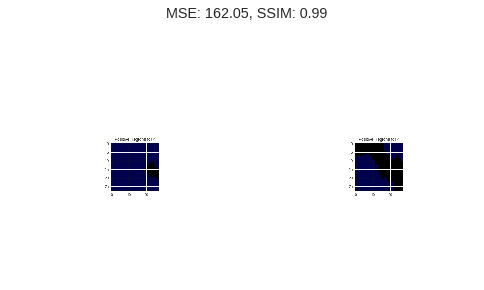

Done for  12 / 200


/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


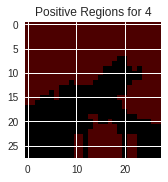

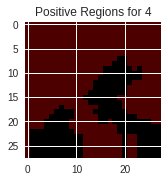

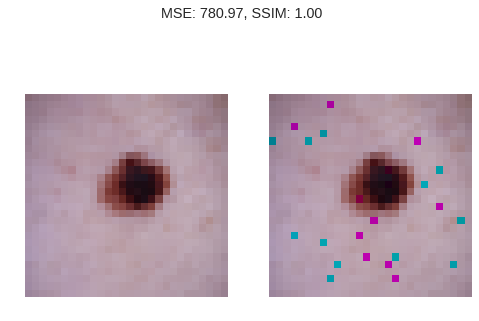

/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


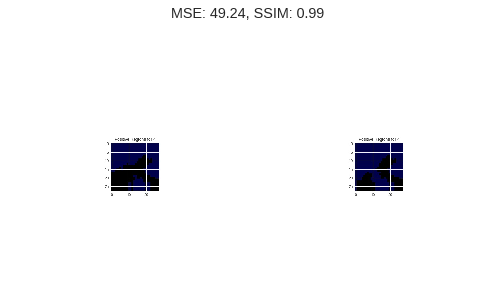

Done for  13 / 200


/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


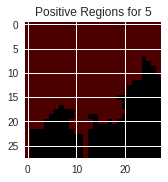

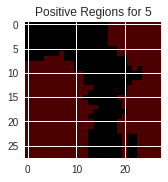

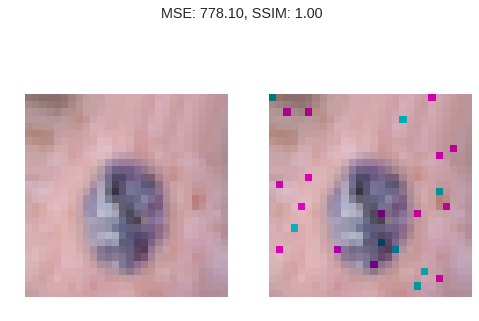

/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


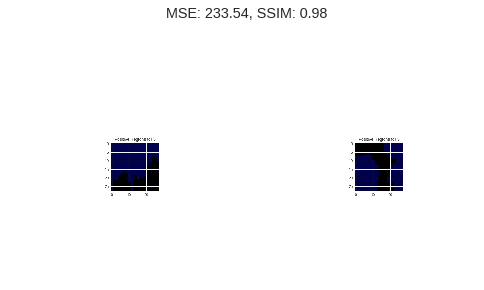

Done for  14 / 200


/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


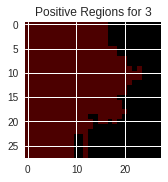

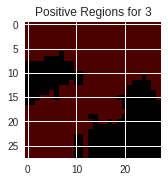

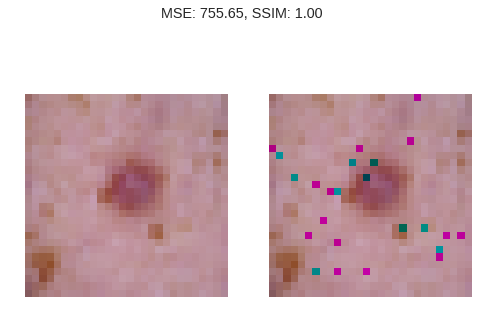

/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


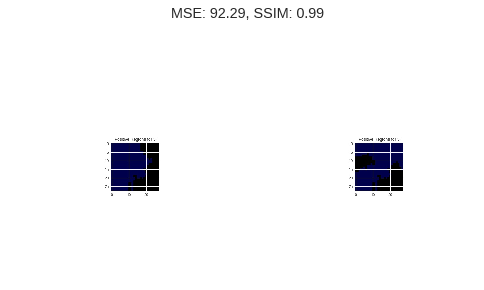

Done for  15 / 200


/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


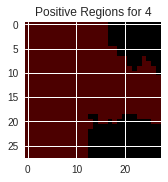

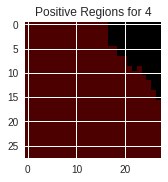

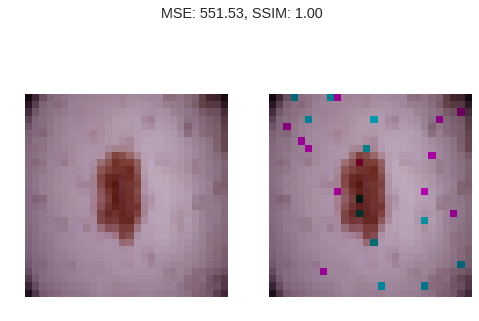

/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


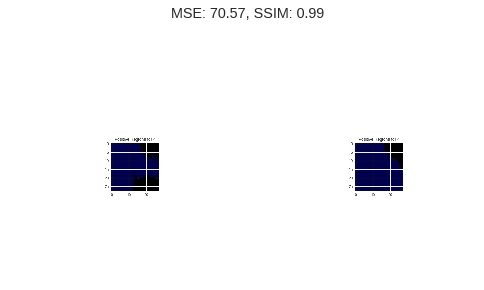

Done for  16 / 200


/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


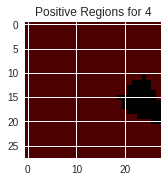

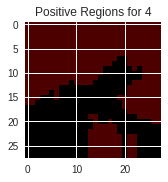

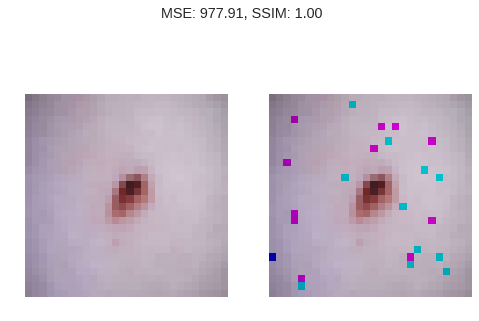

/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


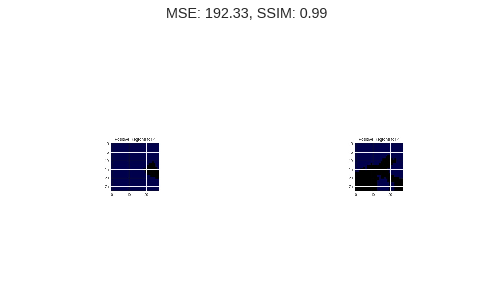

Done for  17 / 200


/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


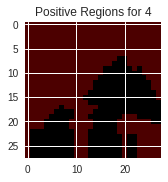

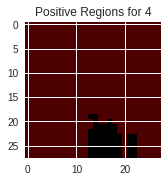

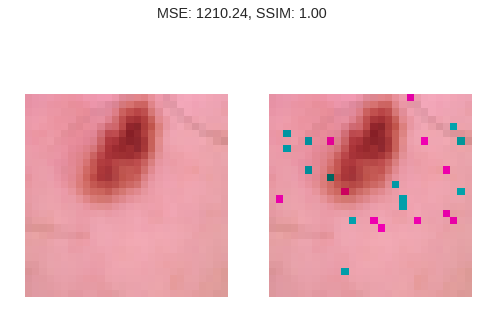

/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


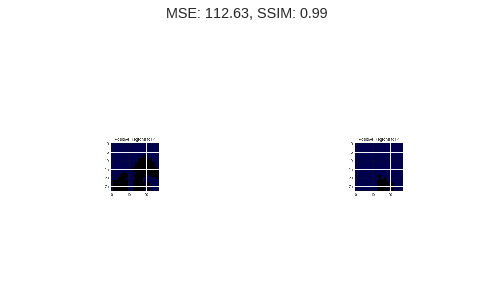

Done for  18 / 200


/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


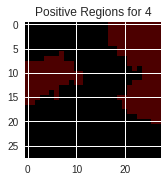

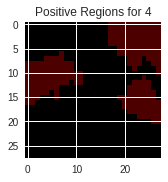

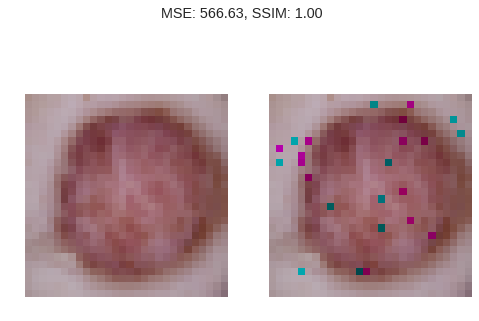

/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


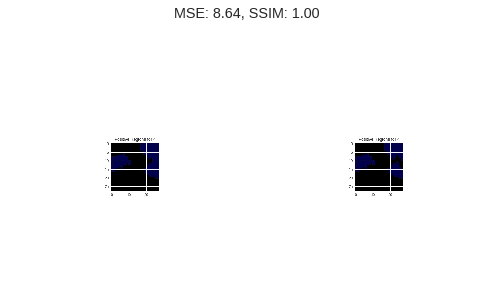

Done for  19 / 200


/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


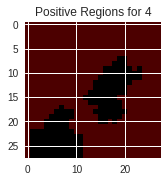

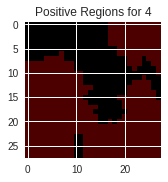

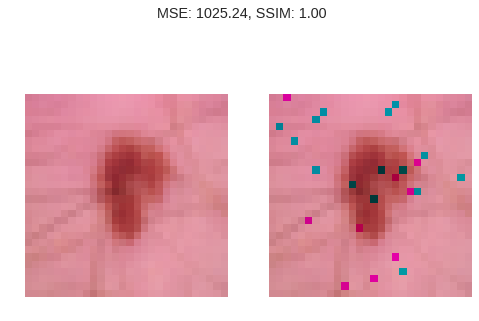

/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


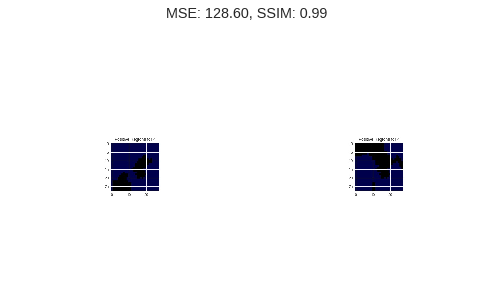

Done for  20 / 200


/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


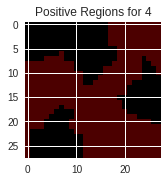

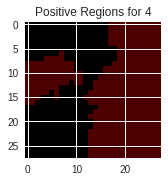

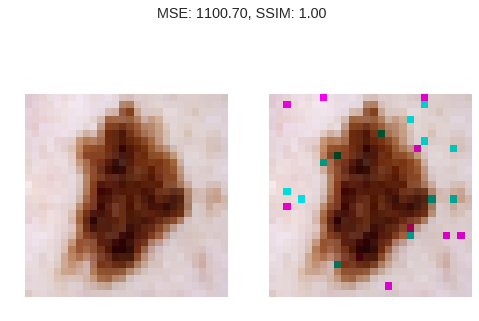

/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


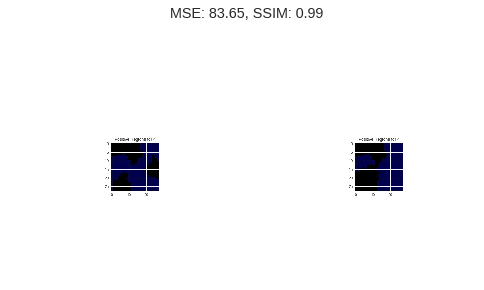

Done for  21 / 200


/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


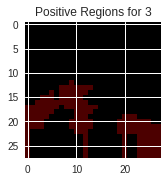

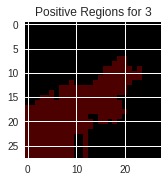

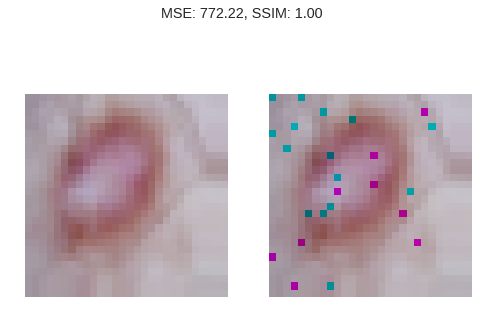

/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


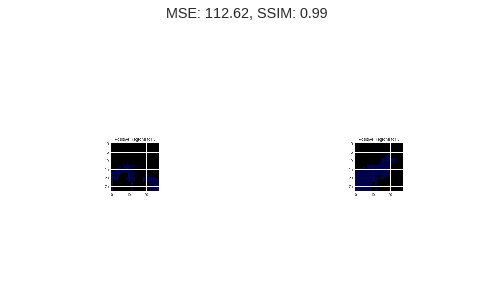

Done for  22 / 200


/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


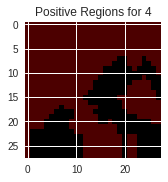

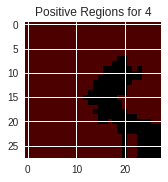

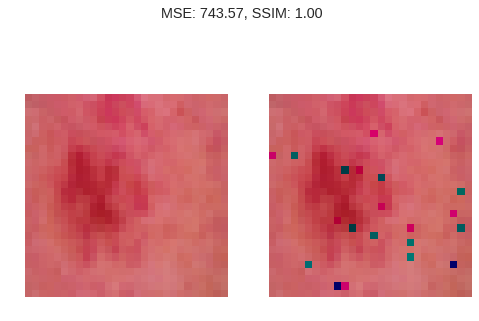

/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


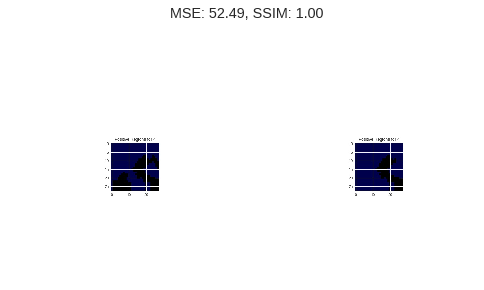

Done for  23 / 200


/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


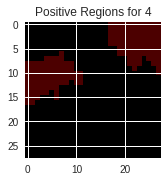

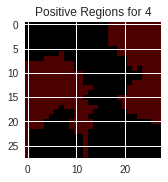

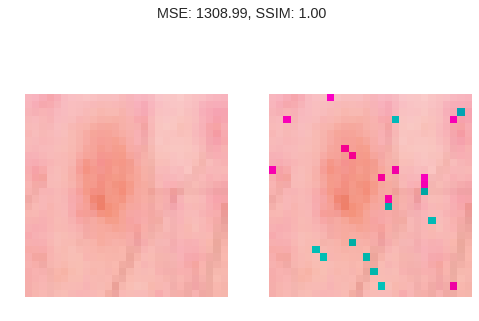

/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


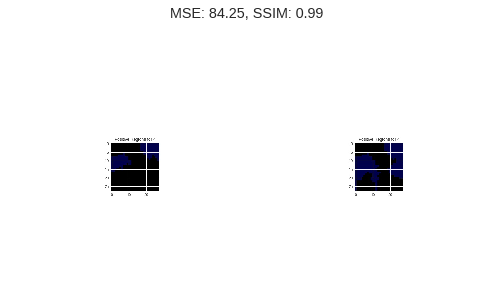

Done for  24 / 200


/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


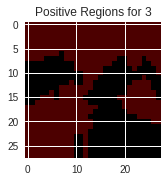

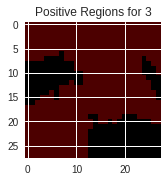

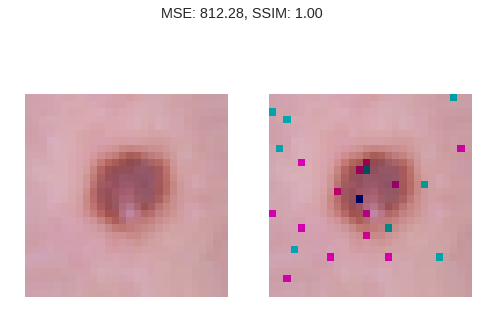

/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


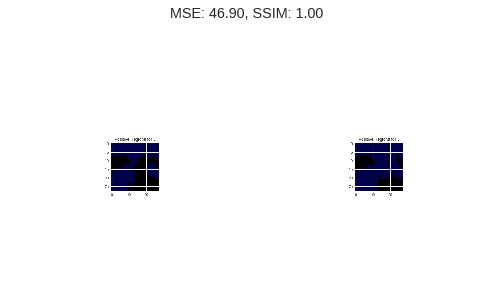

Done for  25 / 200


/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


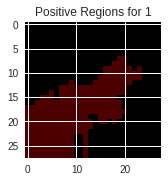

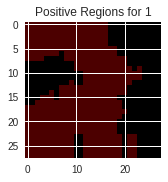

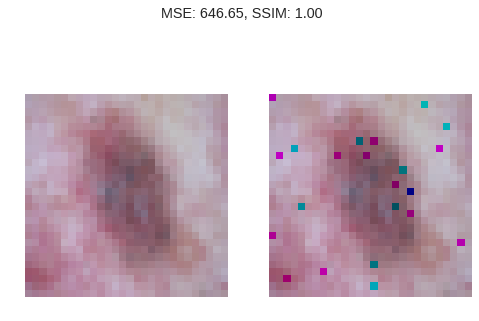

/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


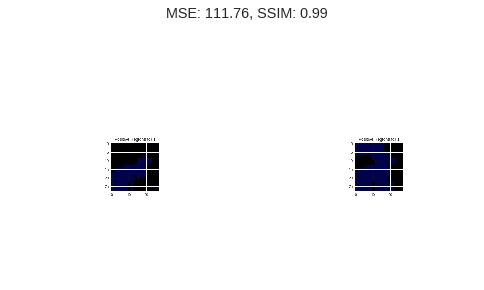

Done for  26 / 200


/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


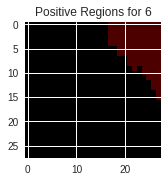

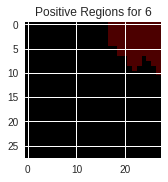

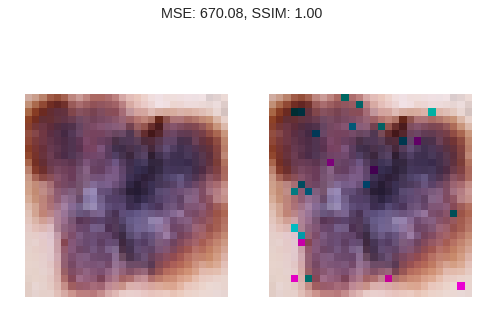

/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


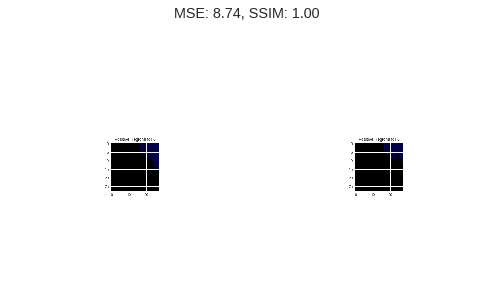

Done for  27 / 200


/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


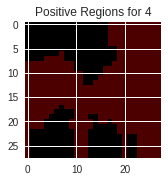

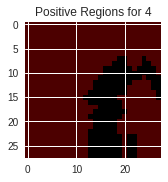

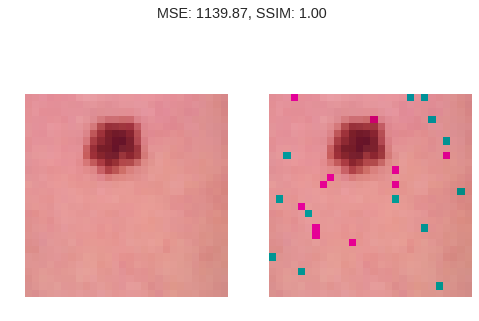

/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


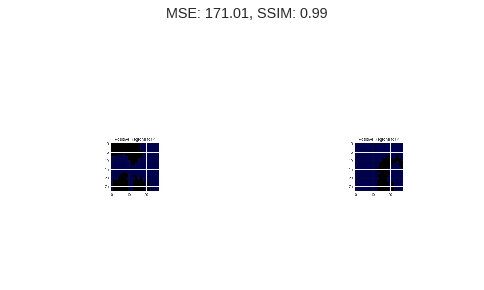

Done for  28 / 200


/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


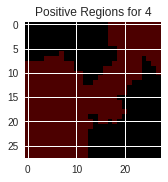

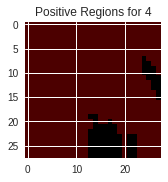

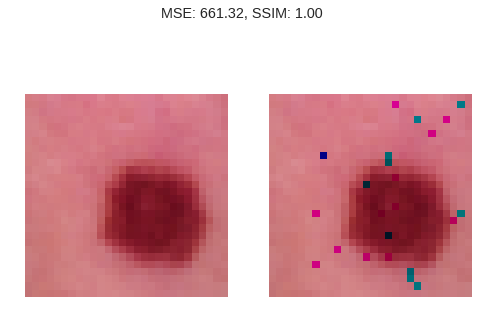

/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


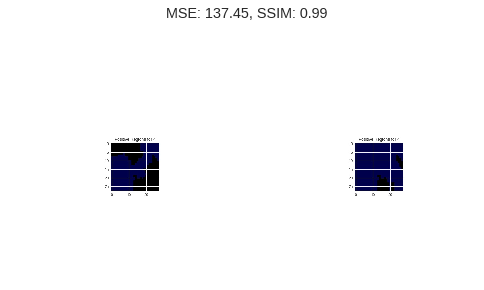

Done for  29 / 200


/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


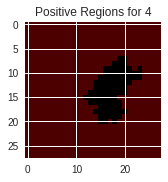

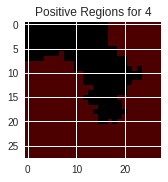

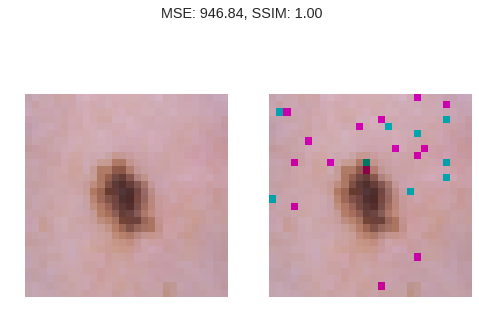

/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


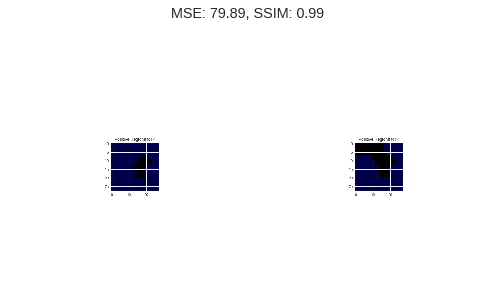

Done for  30 / 200


/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


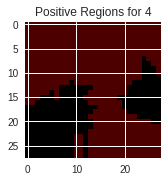

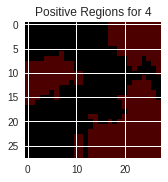

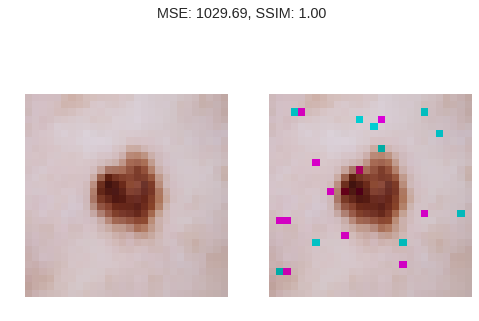

/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


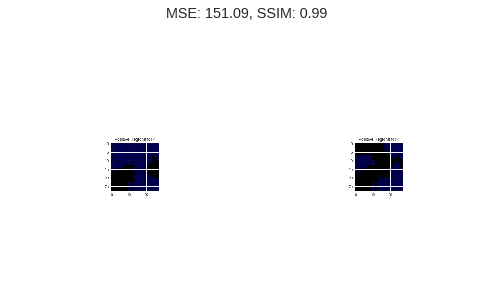

Done for  31 / 200


/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


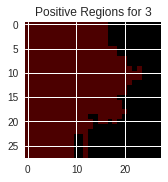

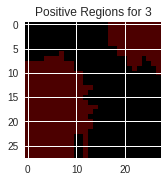

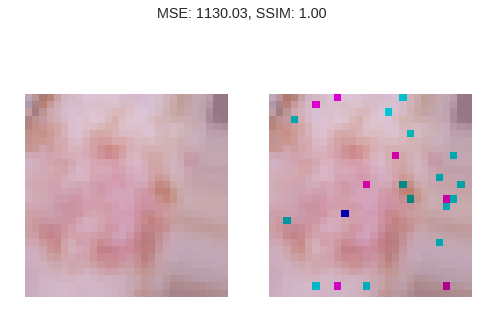

/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


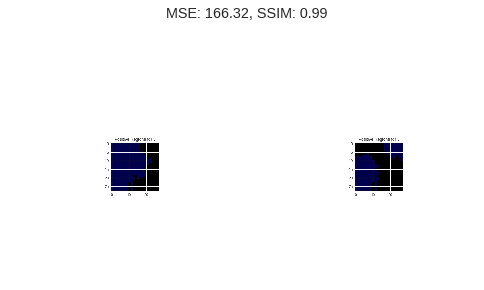

Done for  32 / 200


/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


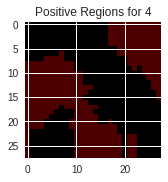

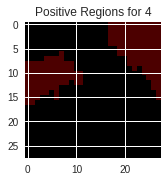

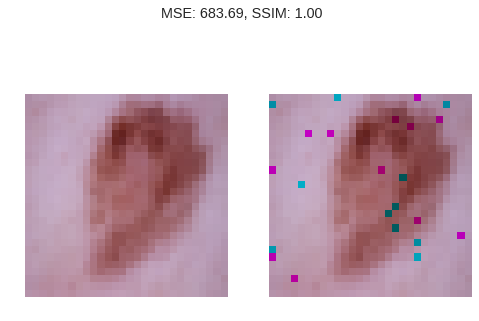

/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


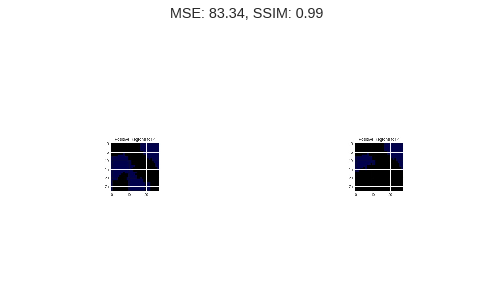

Done for  33 / 200


/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


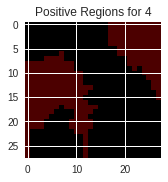

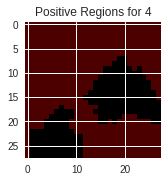

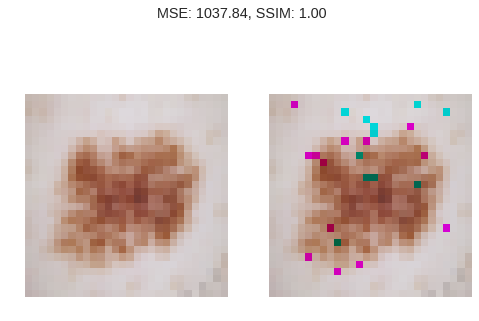

/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


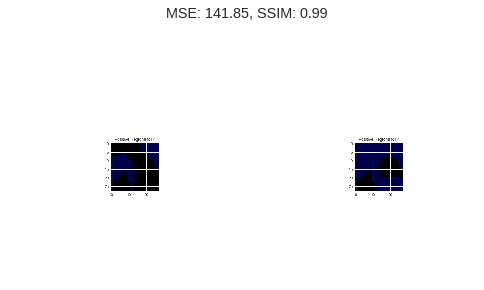

Done for  34 / 200


/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


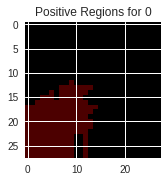

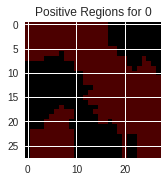

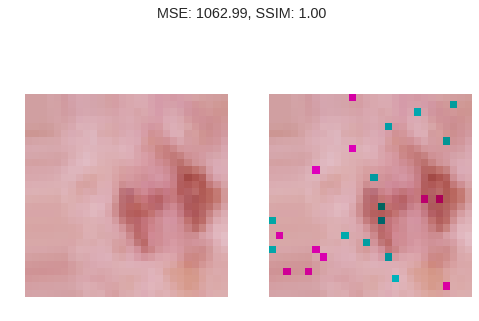

/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


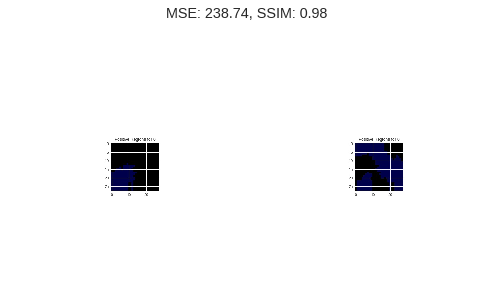

Done for  35 / 200


/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


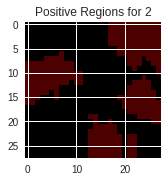

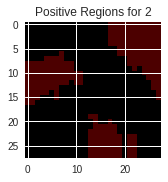

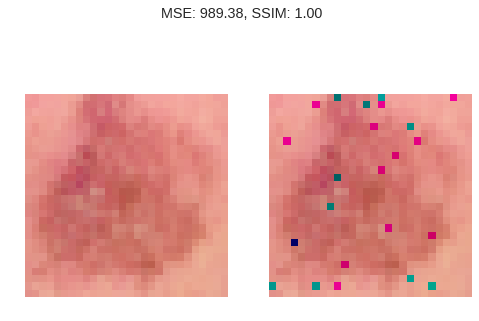

/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


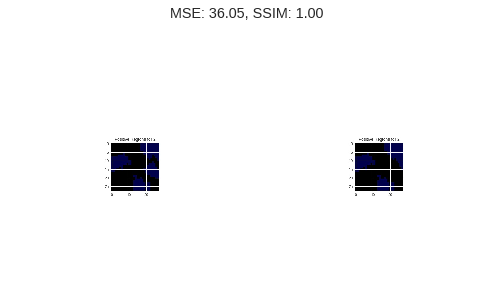

Done for  36 / 200


/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


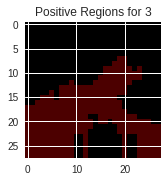

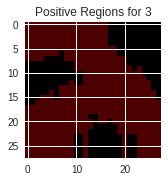

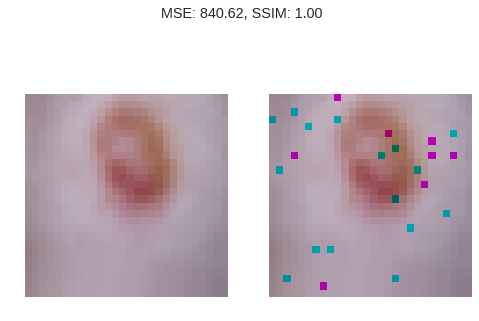

/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


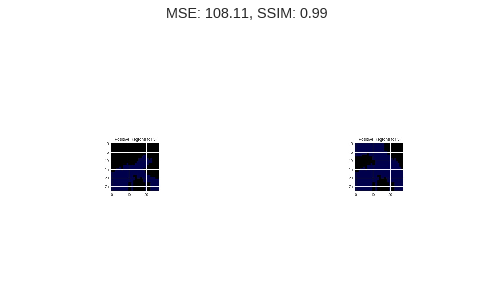

Done for  37 / 200


/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


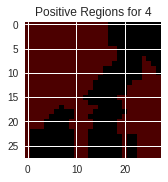

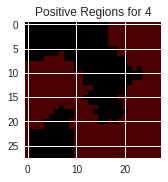

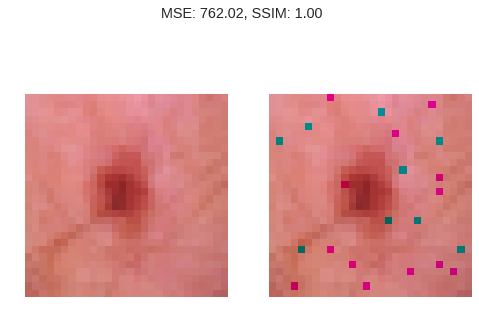

/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


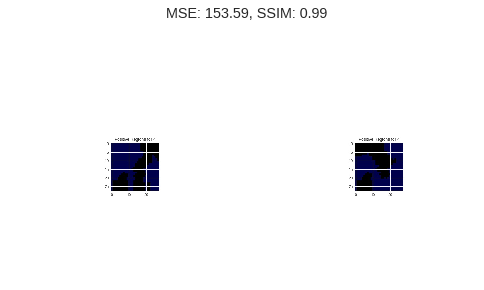

Done for  38 / 200


/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


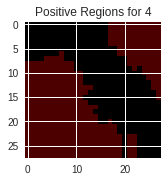

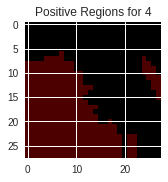

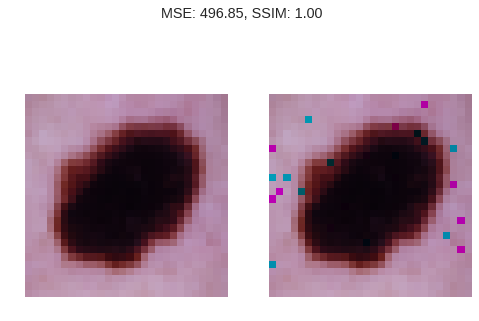

/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


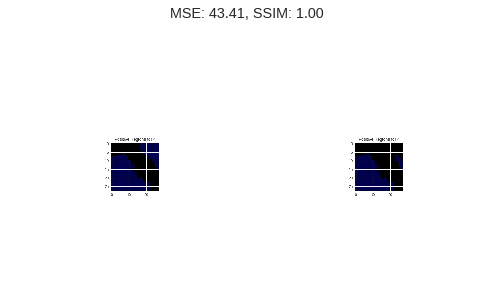

Done for  39 / 200


/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


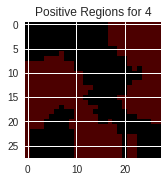

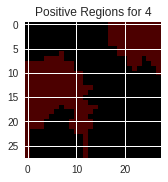

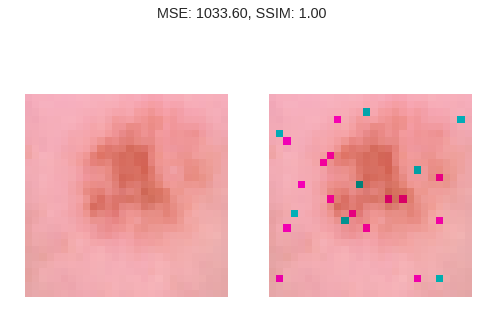

/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


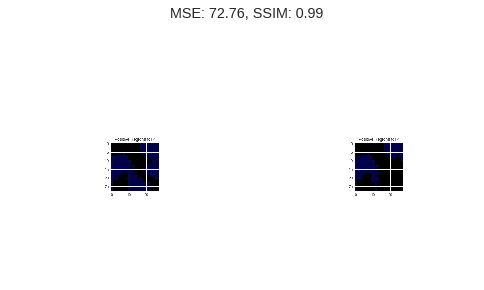

Done for  40 / 200


/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


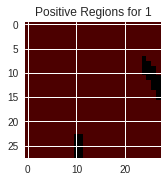

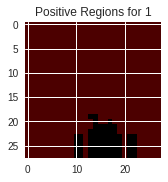

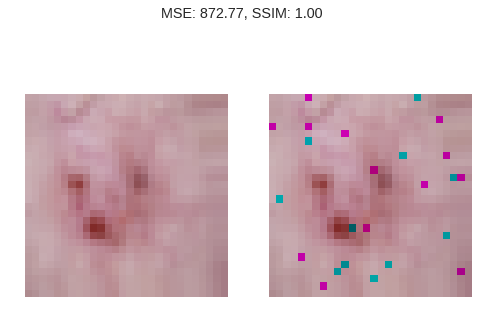

/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


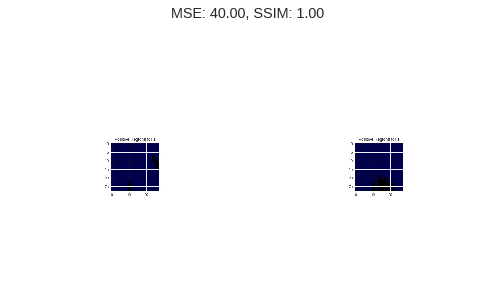

Done for  41 / 200


/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


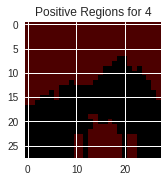

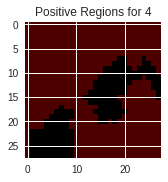

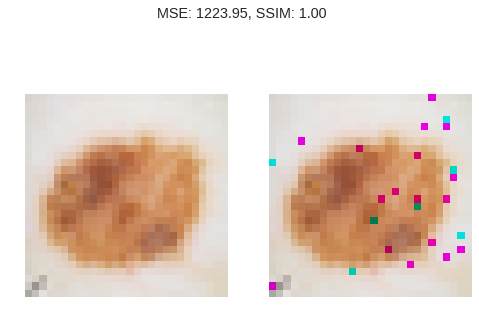

/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


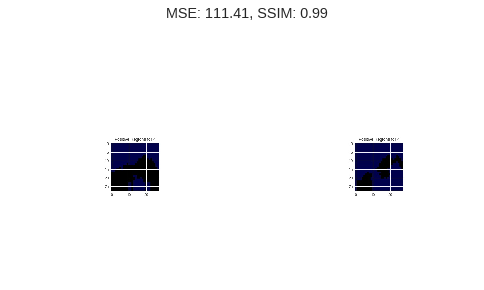

Done for  42 / 200


/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


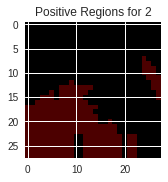

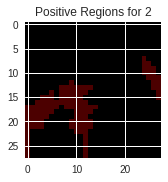

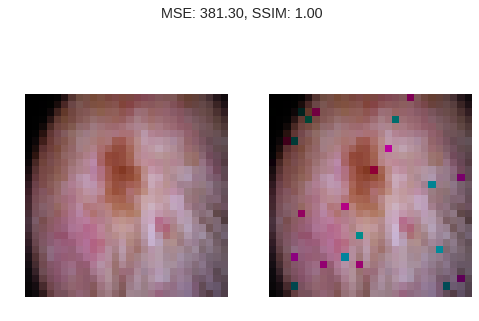

/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


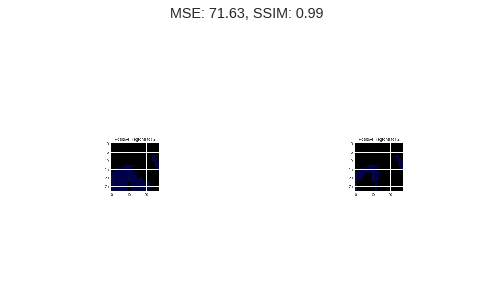

Done for  43 / 200


/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


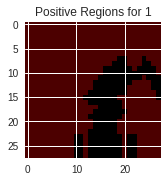

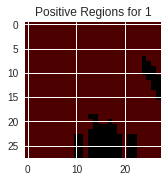

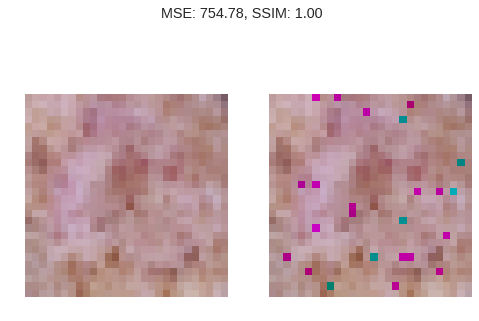

/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


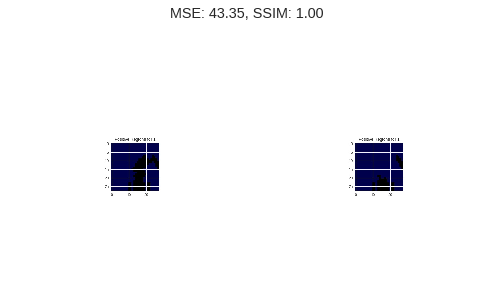

Done for  44 / 200


/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


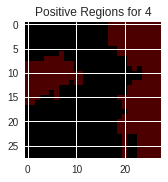

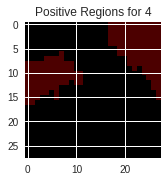

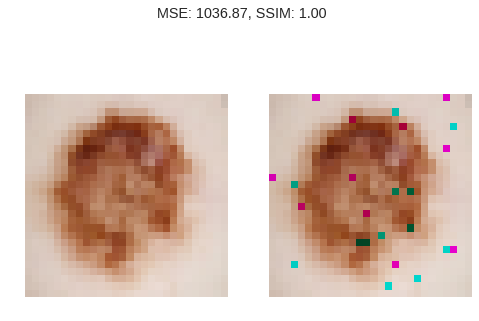

/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


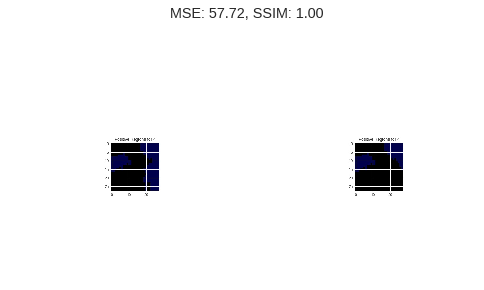

Done for  45 / 200


/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


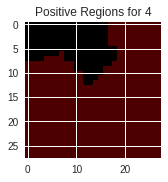

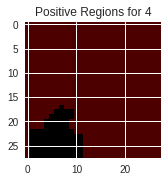

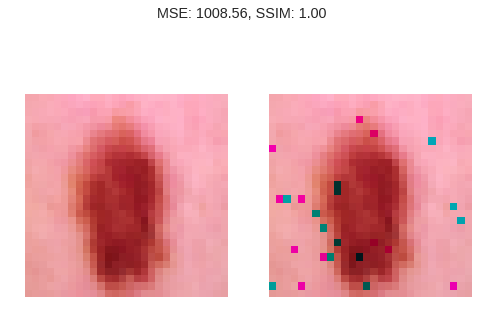

/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


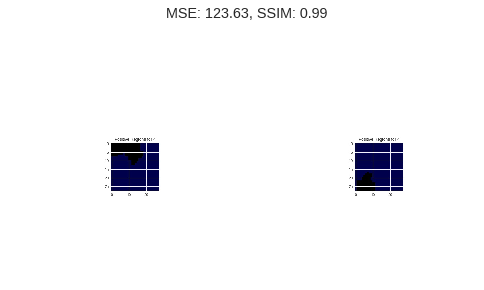

Done for  46 / 200


/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


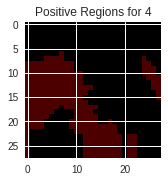

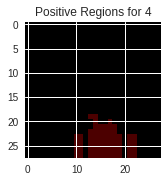

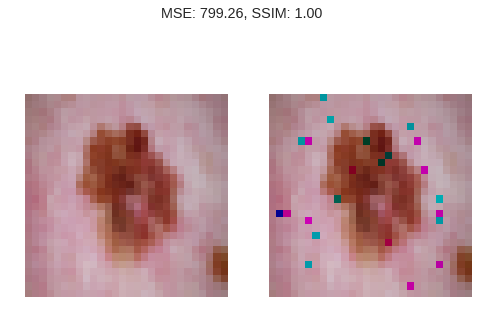

/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


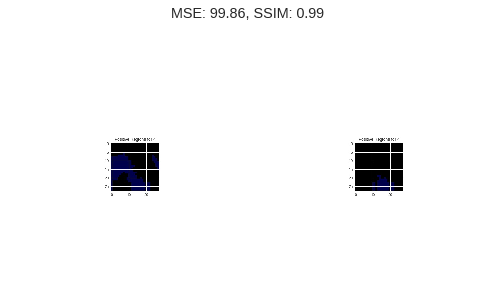

Done for  47 / 200


/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


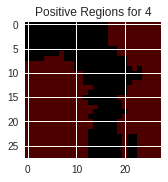

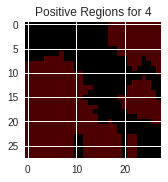

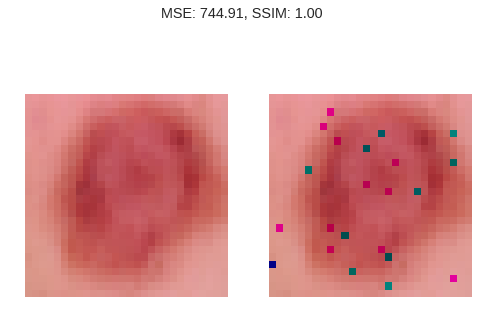

/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


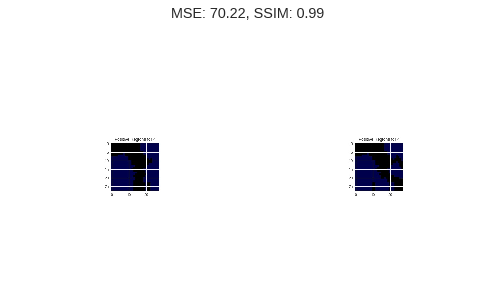

Done for  48 / 200


/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


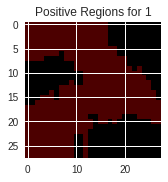

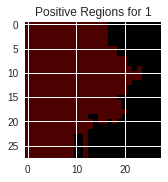

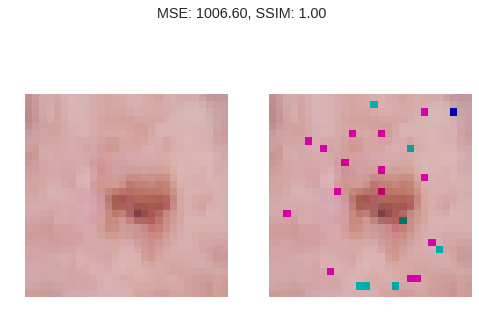

/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


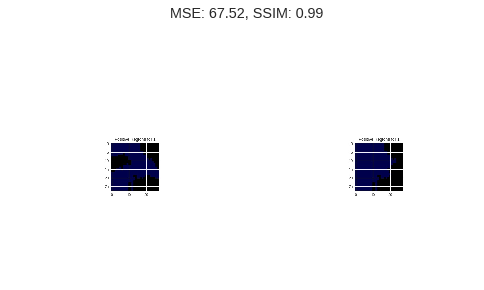

Done for  49 / 200


/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


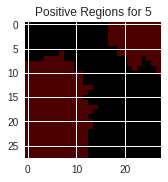

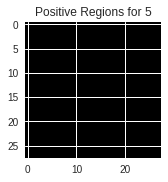

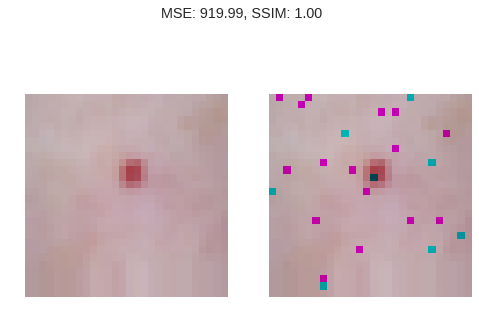

/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


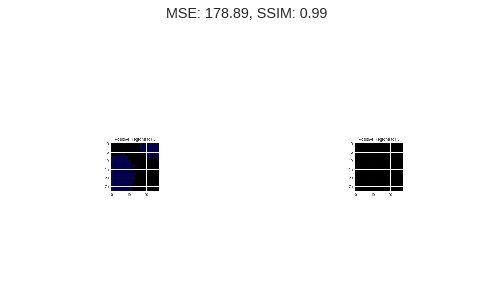

Done for  50 / 200


/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


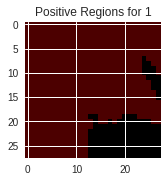

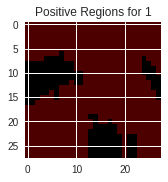

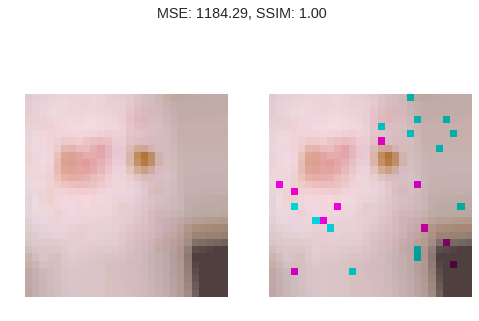

/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


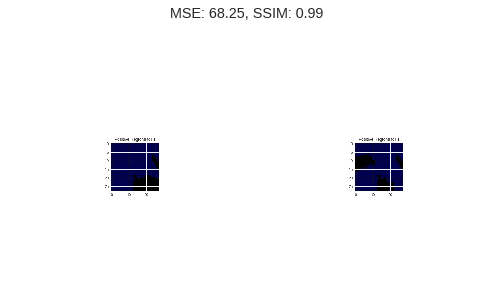

Done for  51 / 200


/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


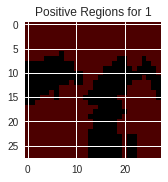

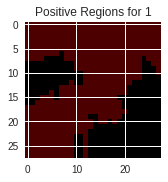

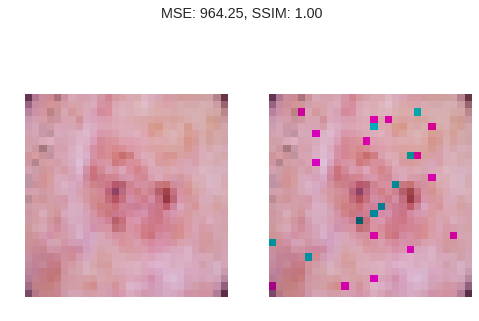

/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


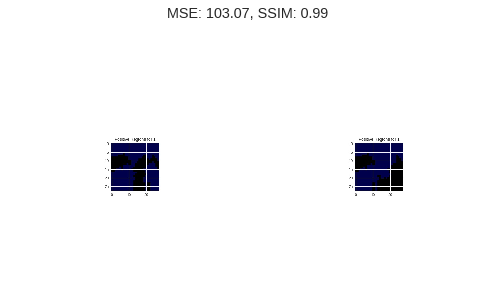

Done for  52 / 200


/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


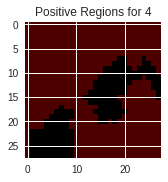

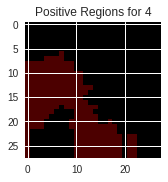

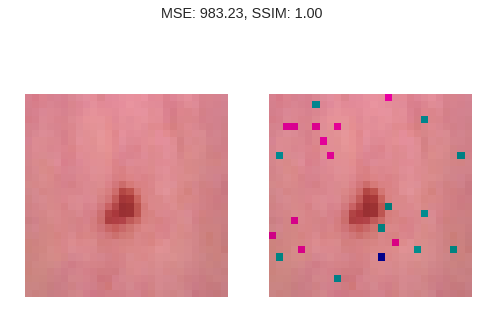

/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


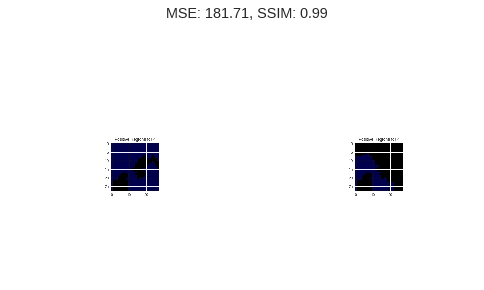

Done for  53 / 200


/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


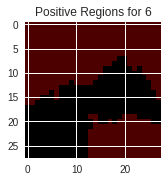

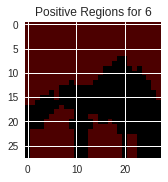

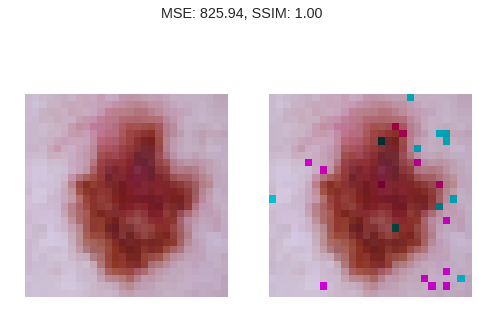

/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


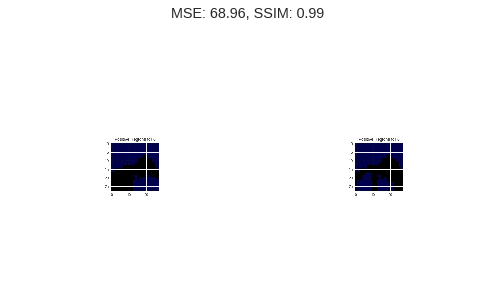

Done for  54 / 200


/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


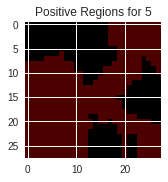

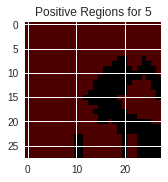

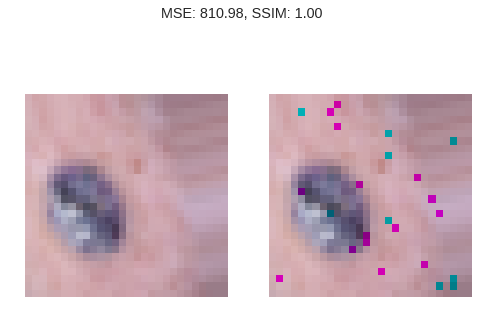

/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


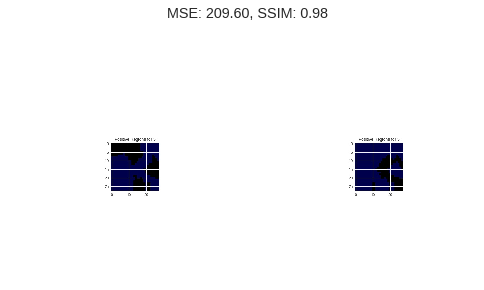

Done for  55 / 200


/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


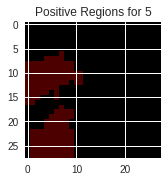

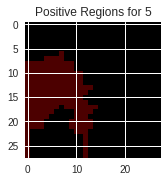

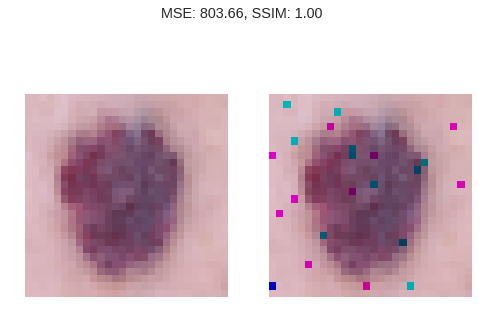

/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


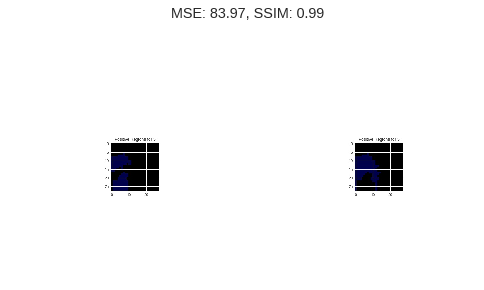

Done for  56 / 200


/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


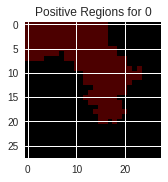

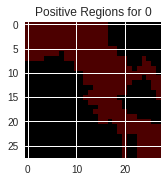

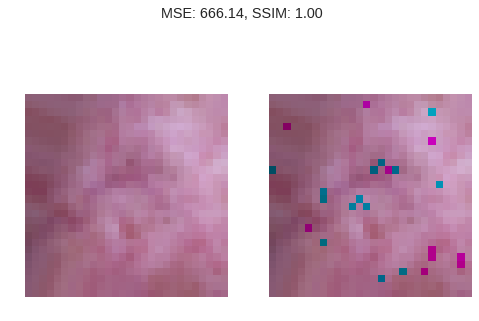

/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


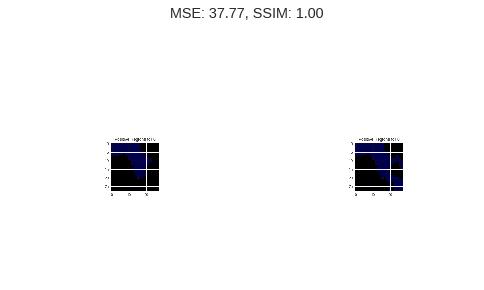

Done for  57 / 200


/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


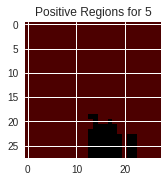

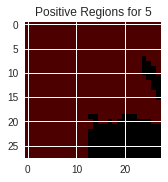

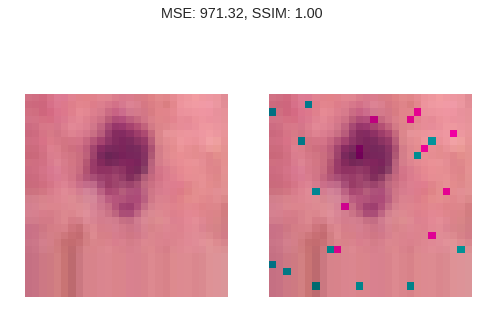

/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


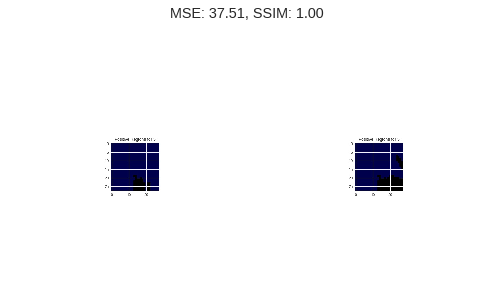

Done for  58 / 200


/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


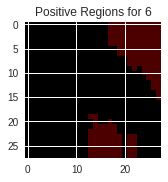

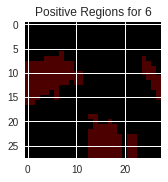

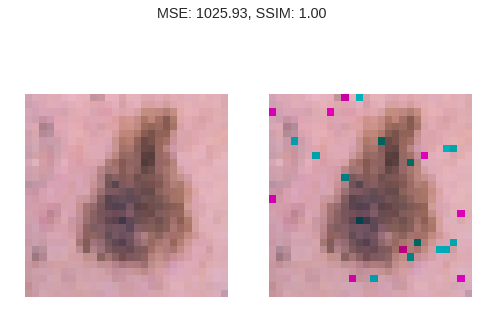

/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


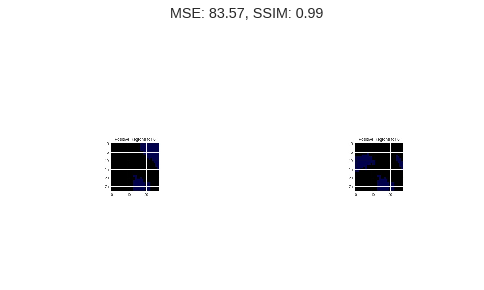

Done for  59 / 200


/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


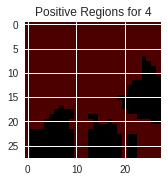

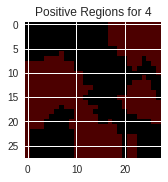

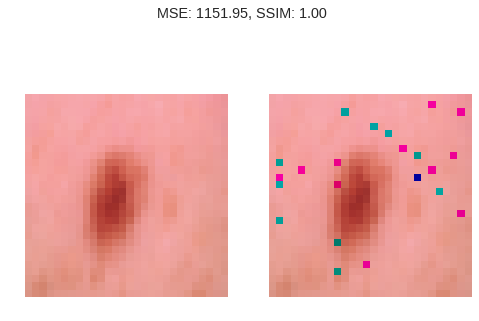

/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


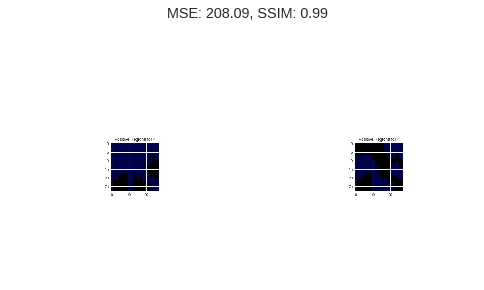

Done for  60 / 200


/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


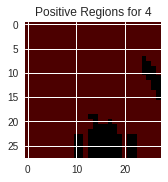

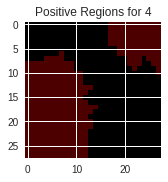

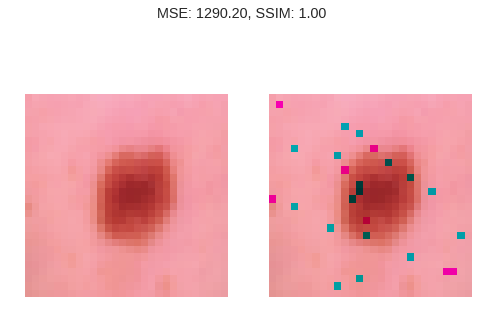

/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


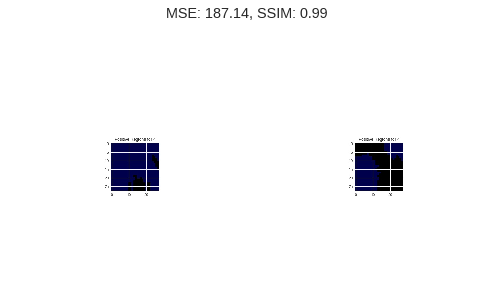

Done for  61 / 200


/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


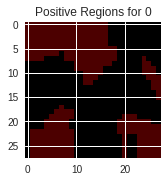

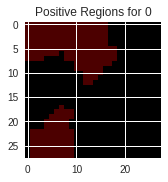

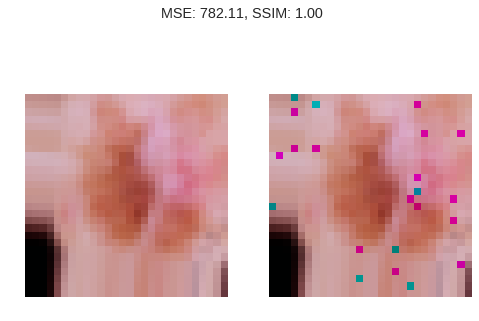

/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


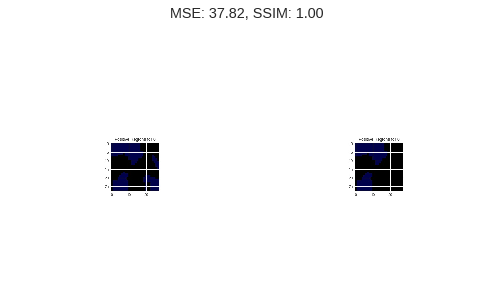

Done for  62 / 200


/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


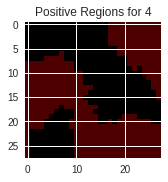

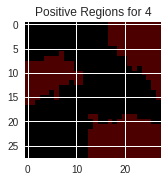

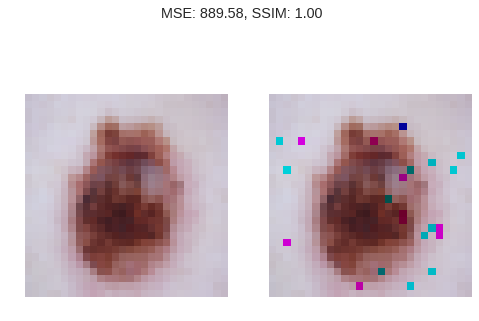

/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


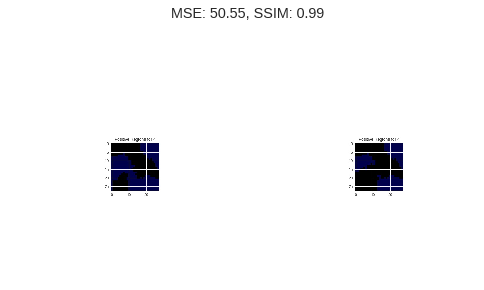

Done for  63 / 200


/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


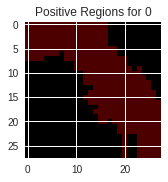

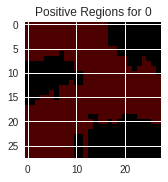

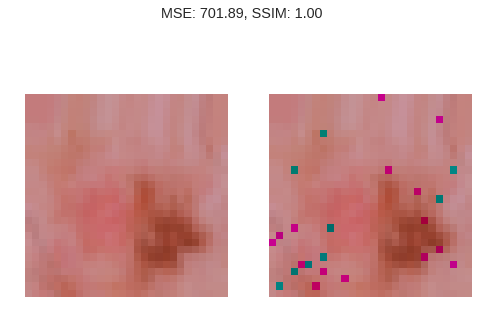

/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


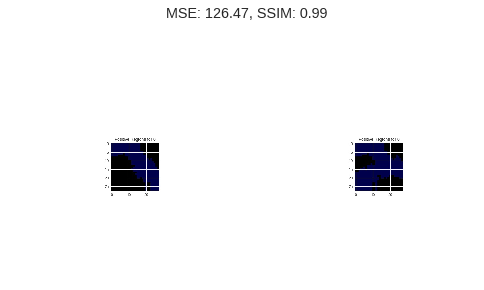

Done for  64 / 200


/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


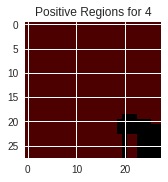

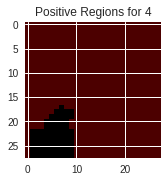

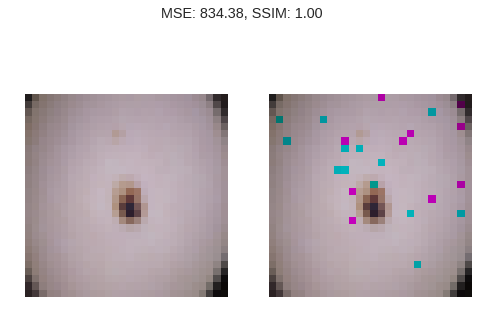

/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


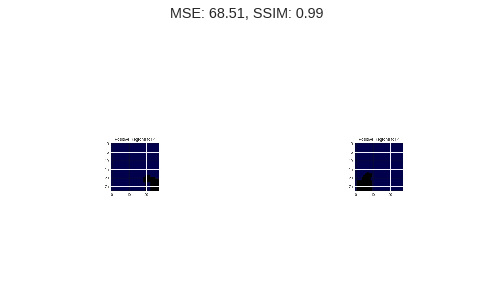

Done for  65 / 200


/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


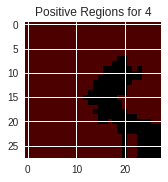

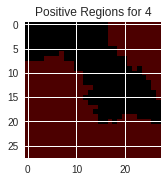

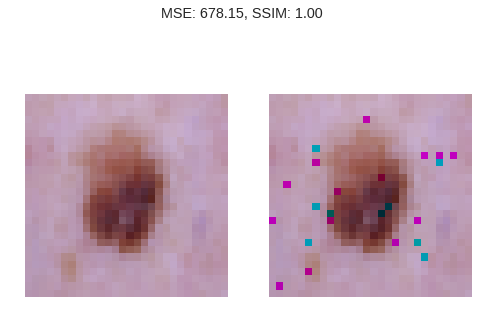

/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


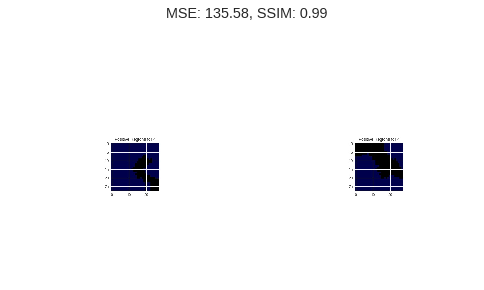

Done for  66 / 200


/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


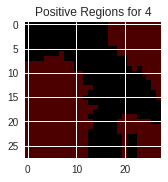

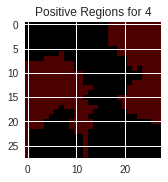

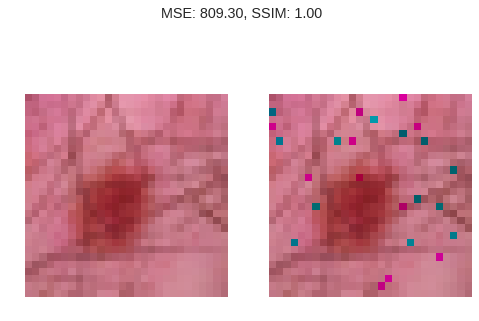

/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


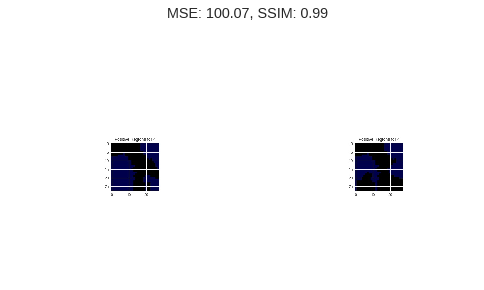

Done for  67 / 200


/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


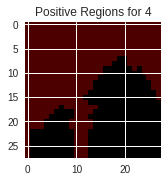

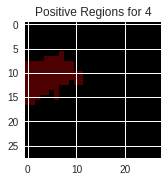

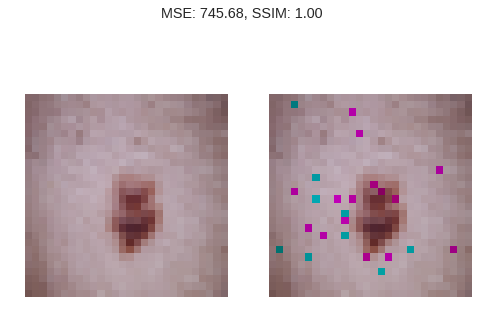

/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


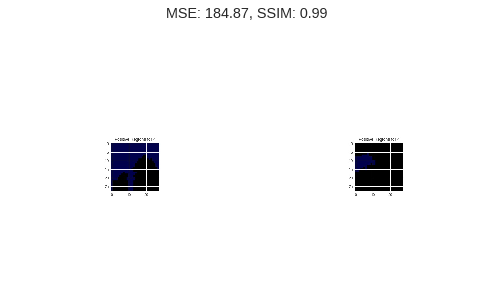

Done for  68 / 200


/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


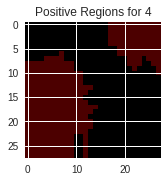

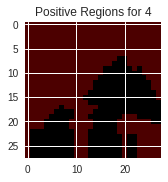

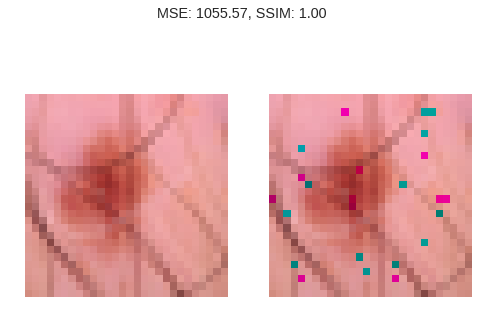

/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


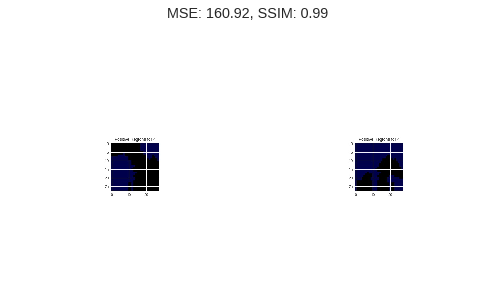

Done for  69 / 200


/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


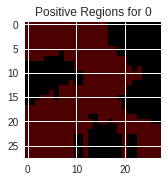

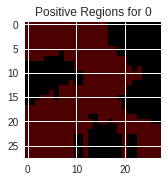

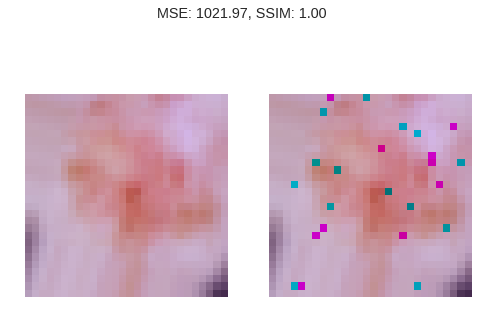

/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


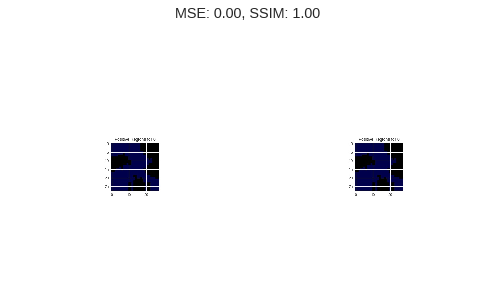

Done for  70 / 200


/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


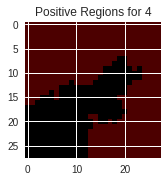

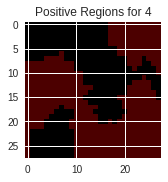

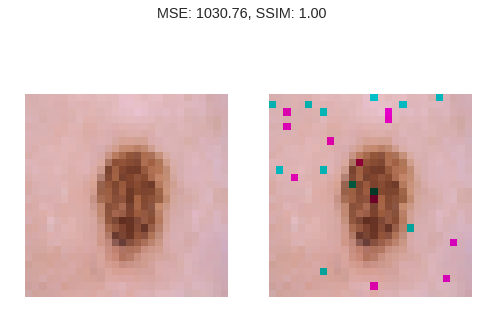

/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


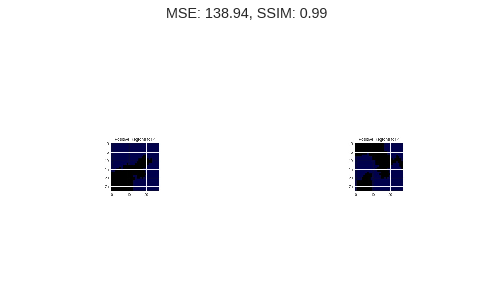

Done for  71 / 200


/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


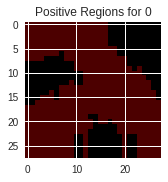

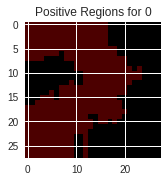

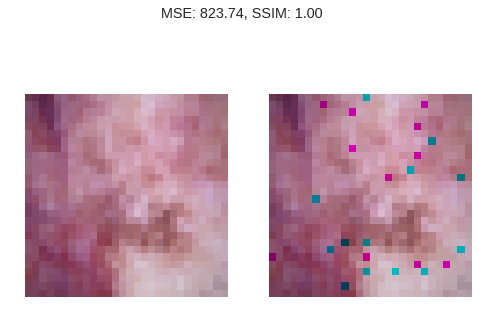

/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


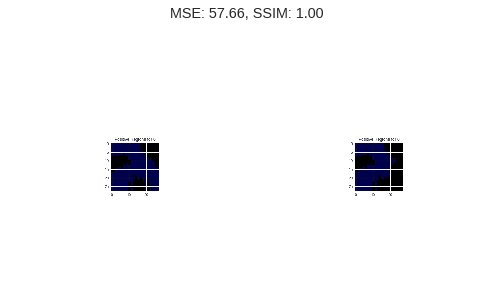

Done for  72 / 200


/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


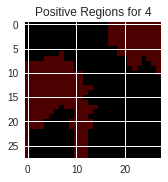

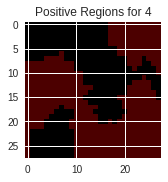

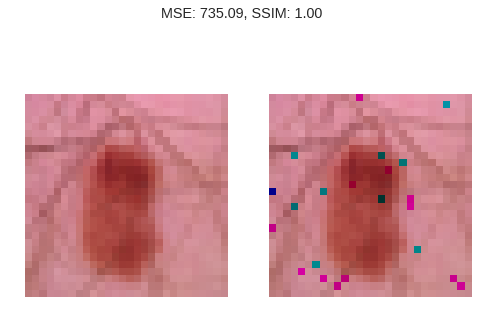

/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


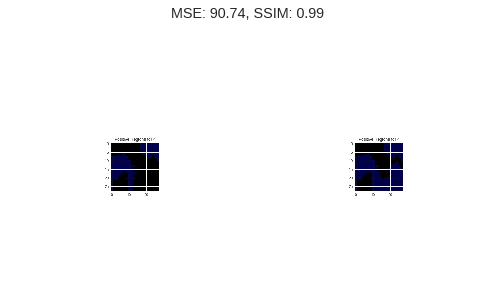

Done for  73 / 200


/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


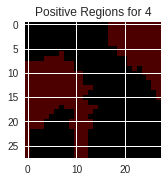

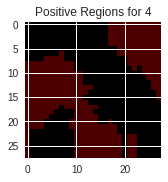

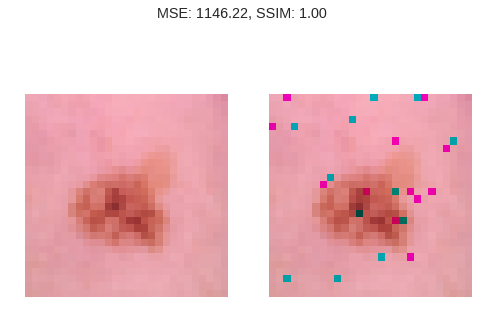

/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


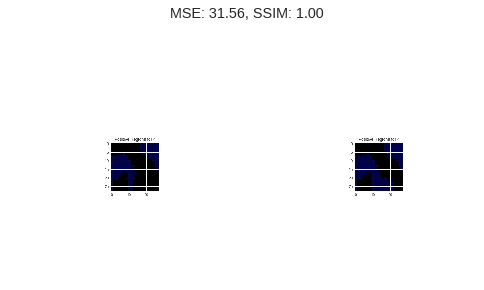

Done for  74 / 200


/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


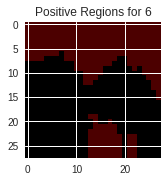

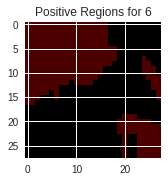

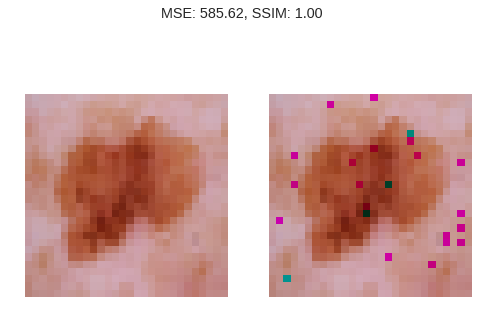

/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


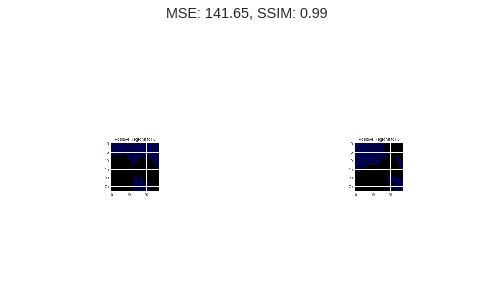

Done for  75 / 200


/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


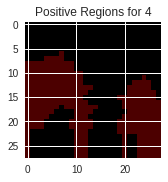

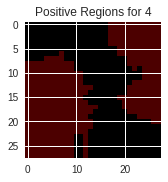

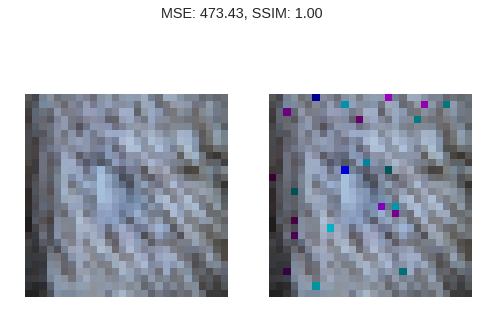

/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


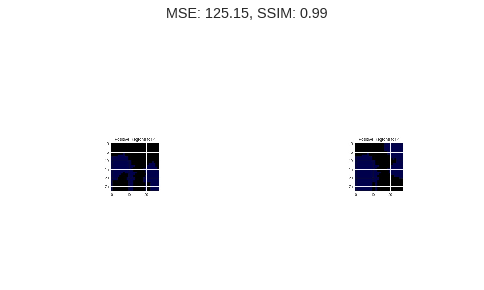

Done for  76 / 200


/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


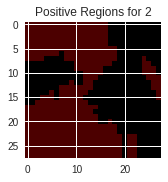

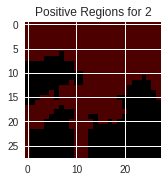

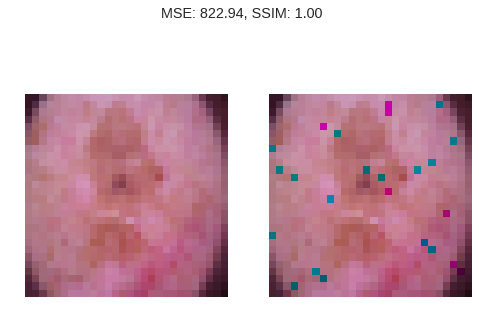

/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


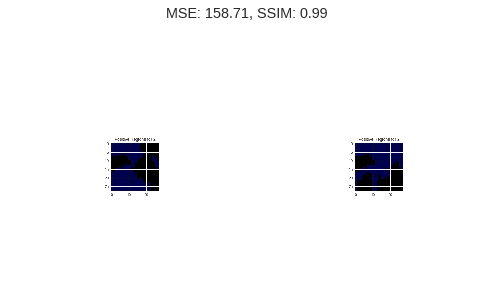

Done for  77 / 200


/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


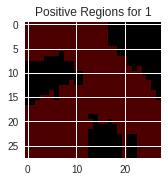

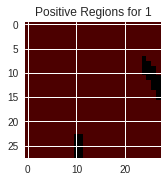

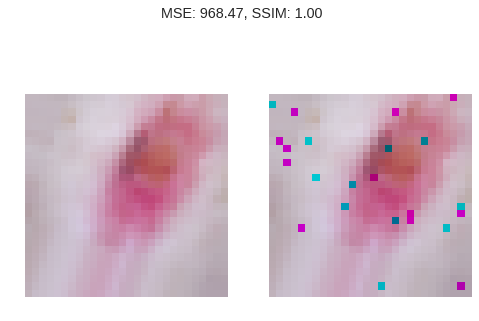

/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


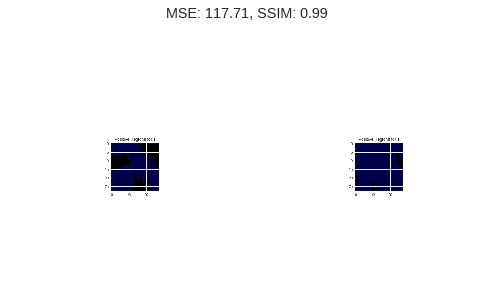

Done for  78 / 200


/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


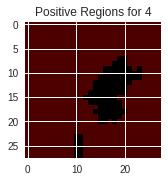

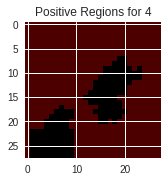

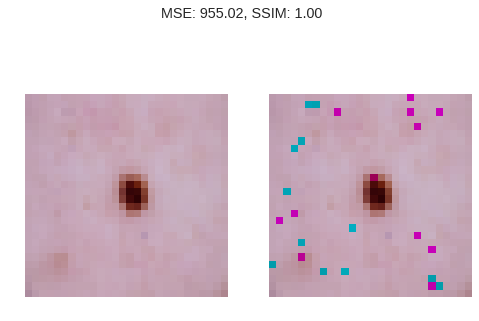

/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


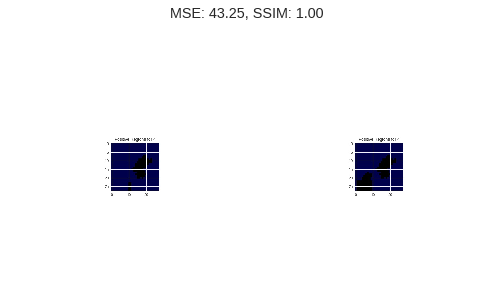

Done for  79 / 200


/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


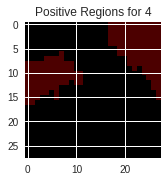

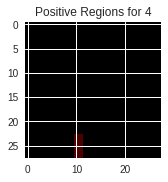

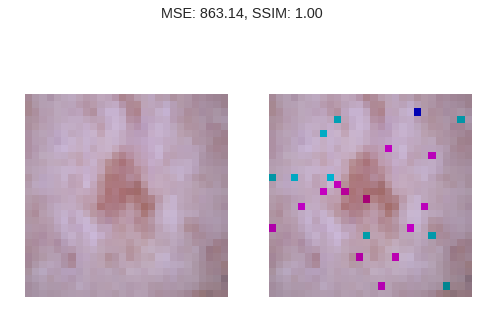

/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


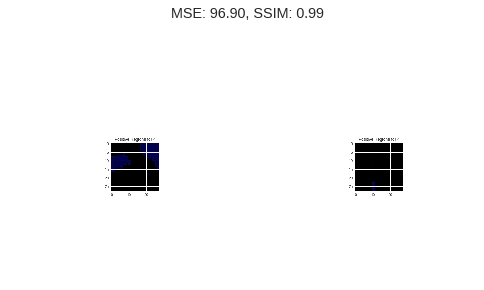

Done for  80 / 200


/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


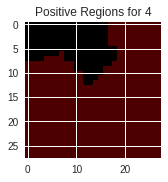

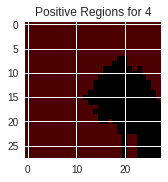

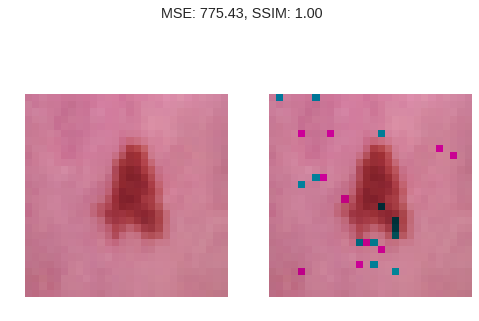

/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


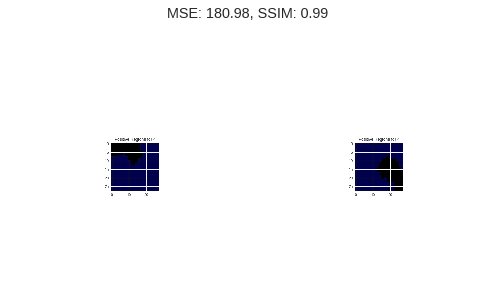

Done for  81 / 200


/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


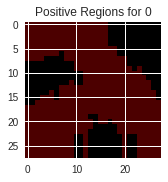

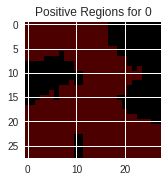

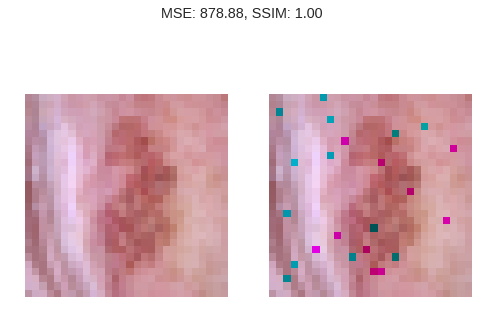

/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


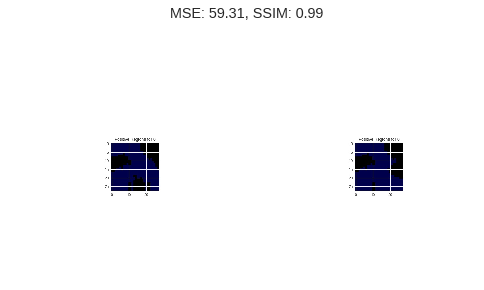

Done for  82 / 200


/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


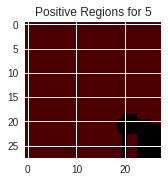

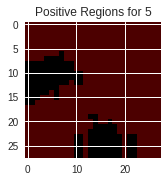

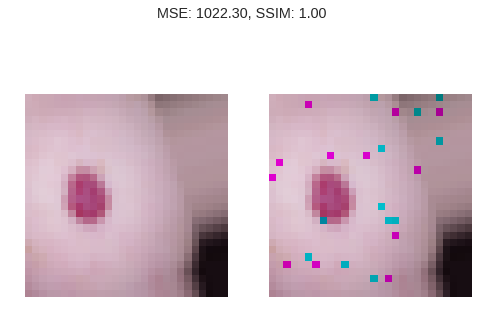

/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


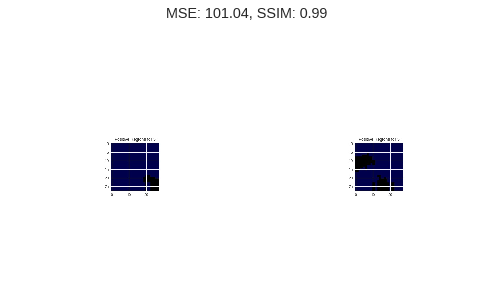

Done for  83 / 200


/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


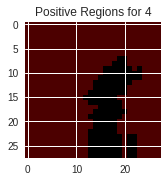

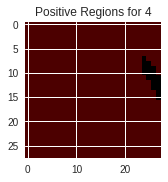

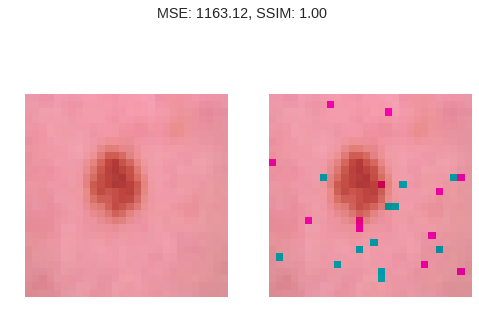

/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


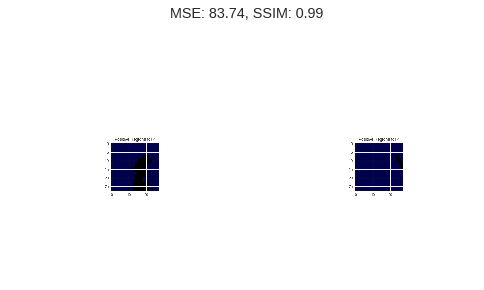

Done for  84 / 200


/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


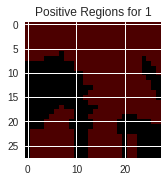

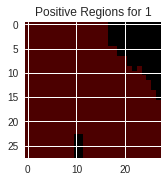

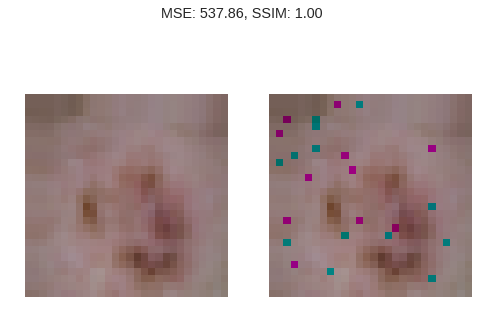

/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


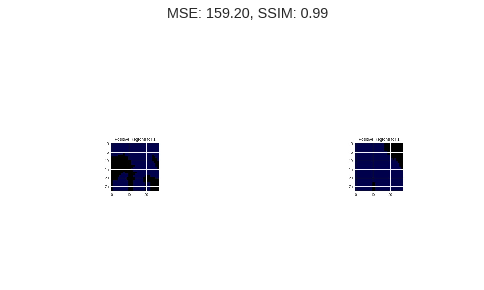

Done for  85 / 200


/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


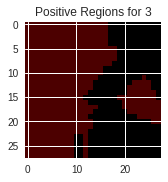

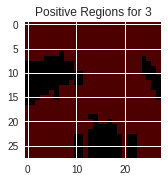

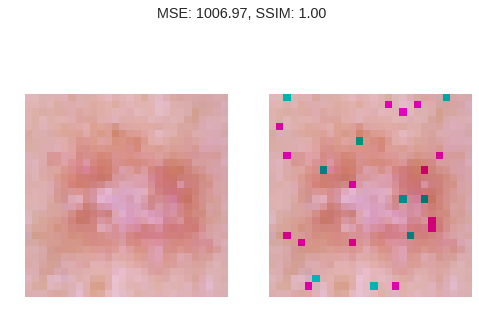

/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


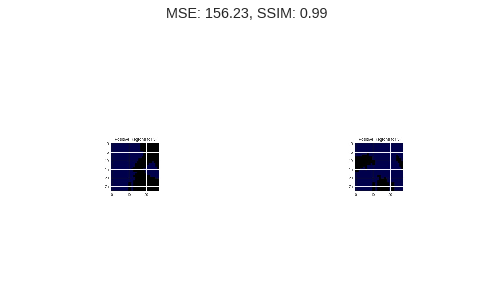

Done for  86 / 200


/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


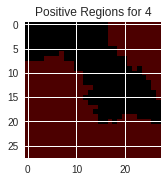

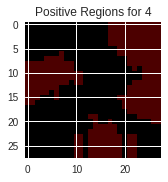

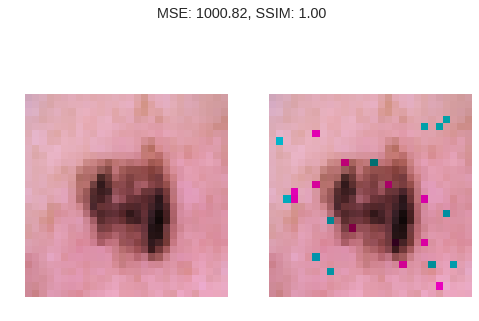

/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


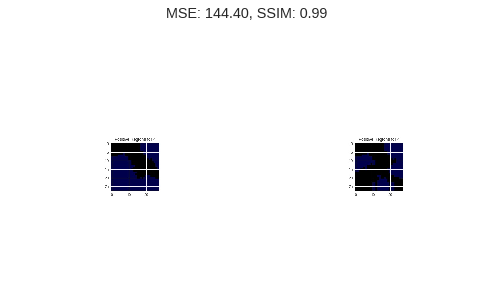

Done for  87 / 200


/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


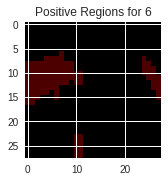

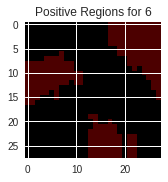

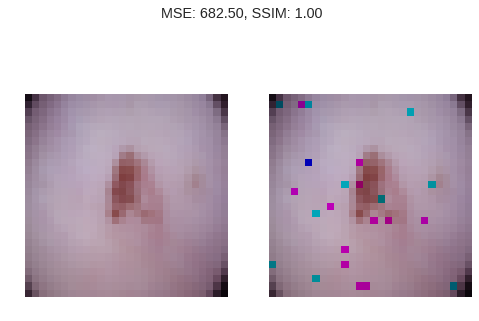

/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


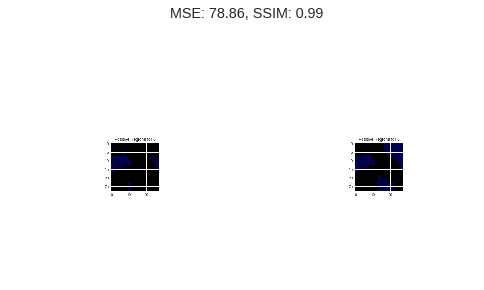

Done for  88 / 200


/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


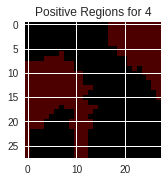

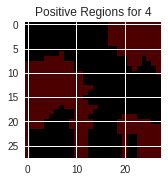

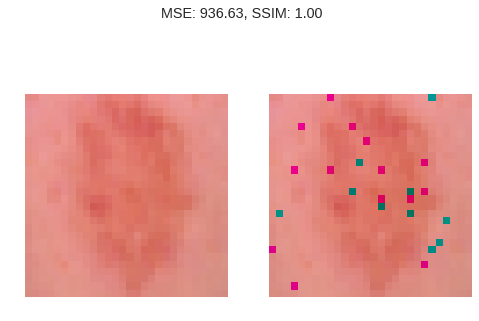

/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


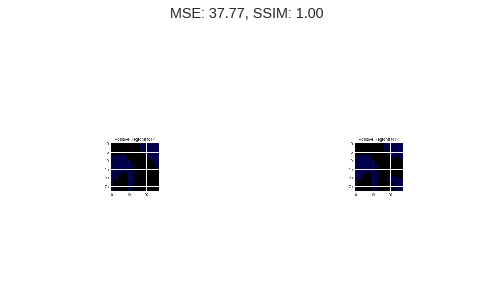

Done for  89 / 200


/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


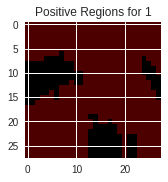

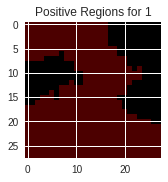

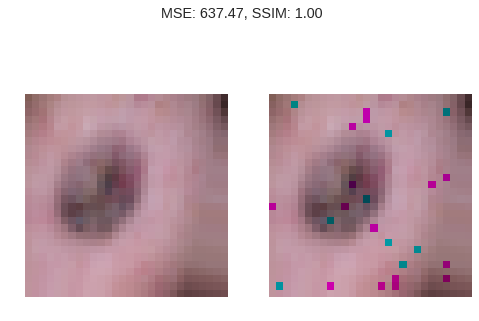

/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


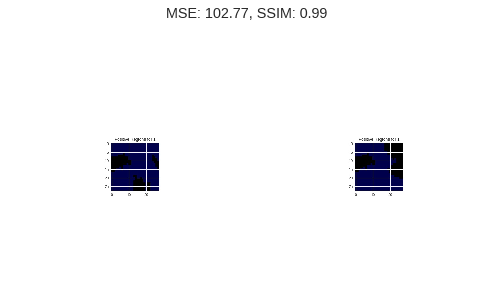

Done for  90 / 200


/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


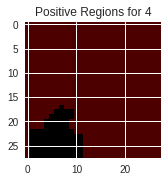

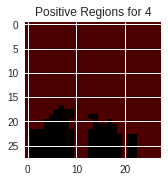

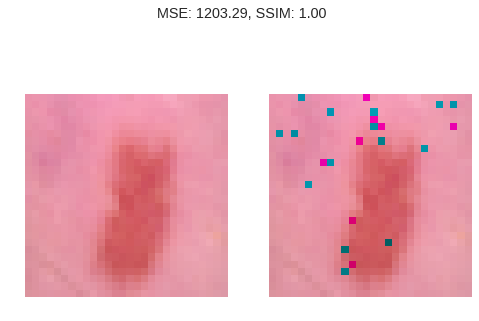

/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


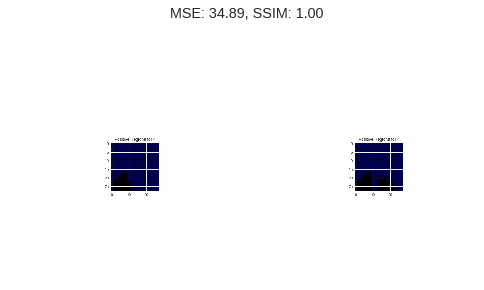

Done for  91 / 200


/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


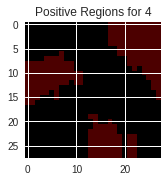

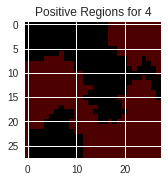

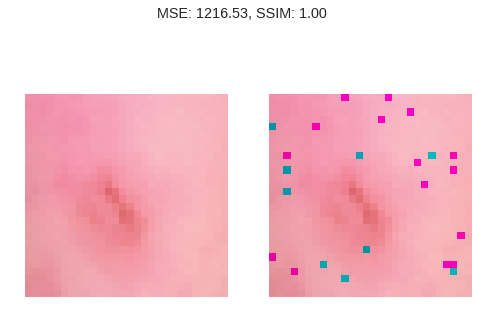

/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


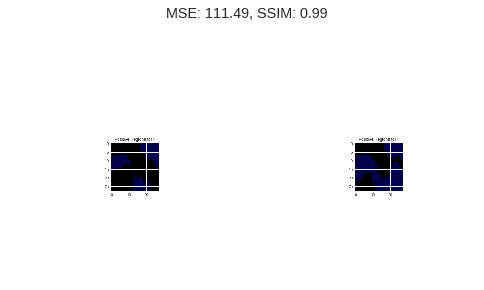

Done for  92 / 200


/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


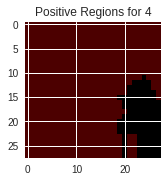

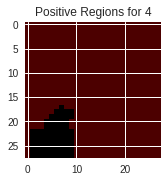

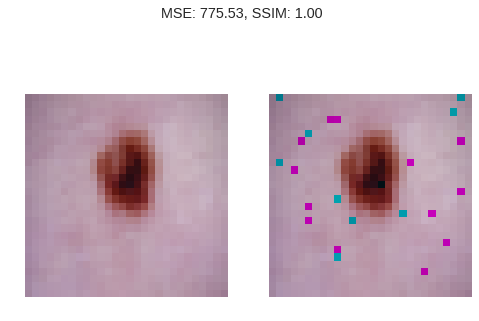

/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


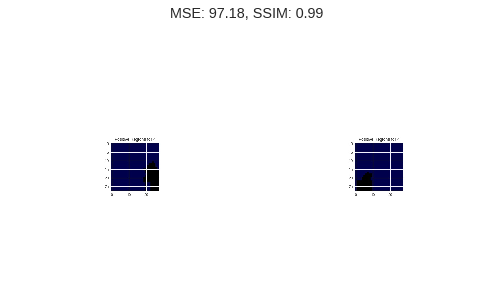

Done for  93 / 200


/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


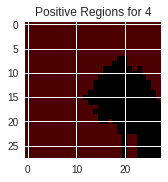

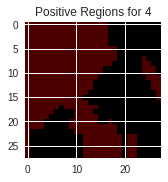

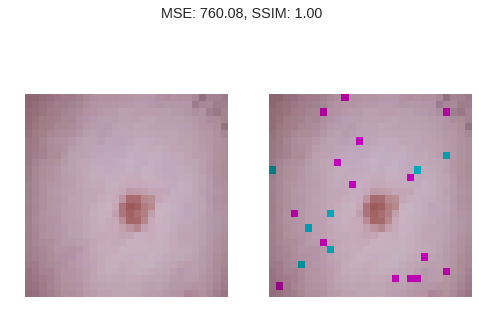

/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


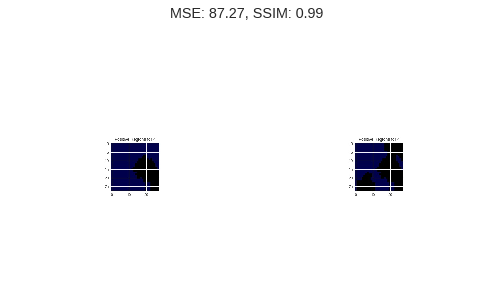

Done for  94 / 200


/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


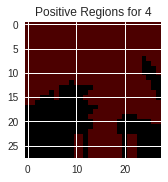

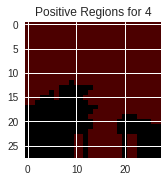

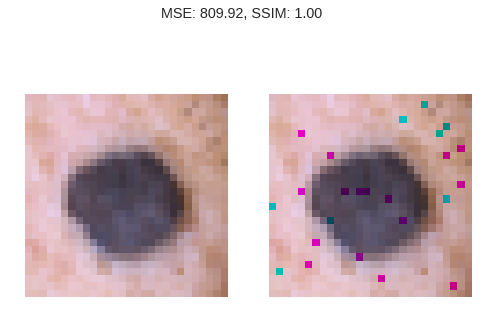

/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


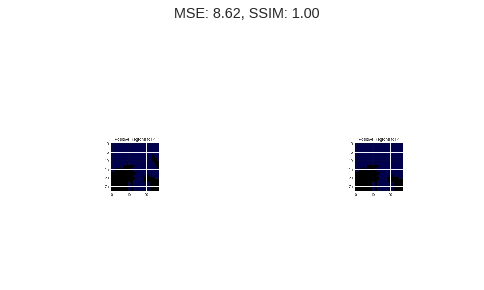

Done for  95 / 200


/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


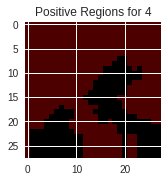

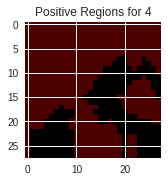

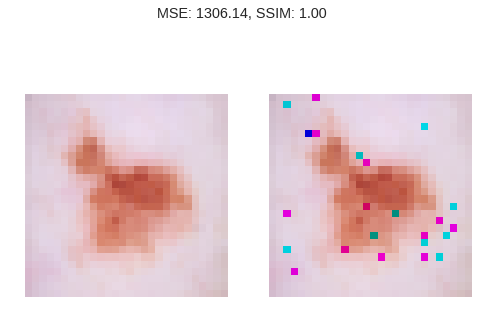

/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


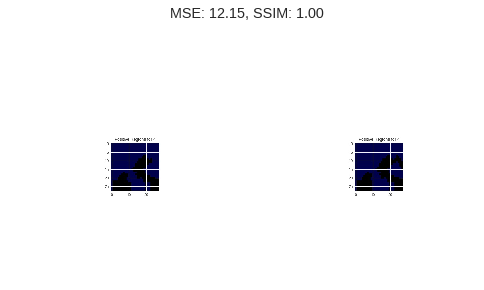

Done for  96 / 200


/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


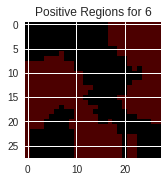

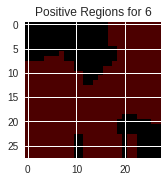

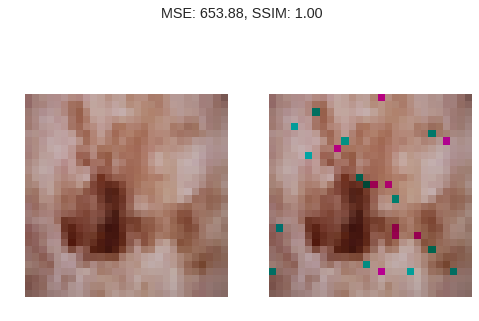

/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


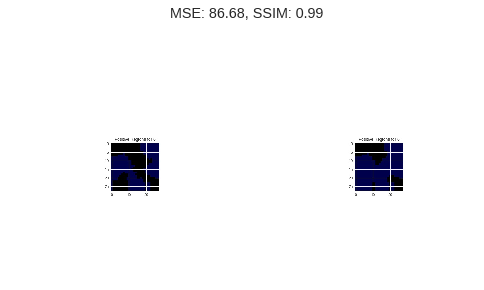

Done for  97 / 200


/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


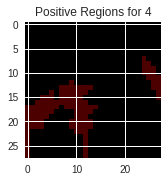

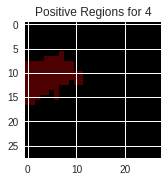

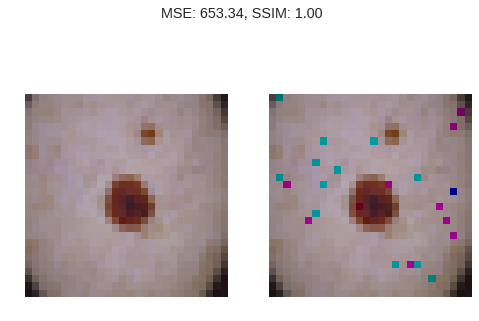

/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


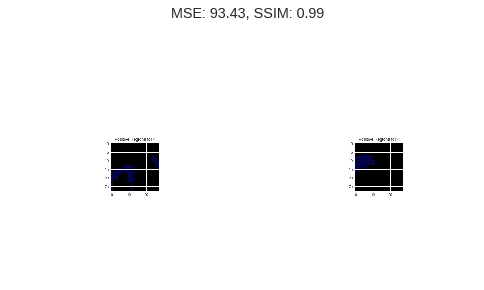

Done for  98 / 200


/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


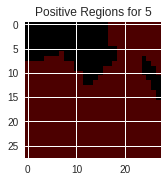

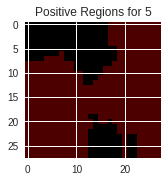

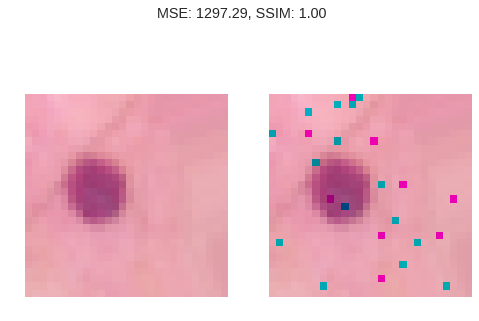

/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


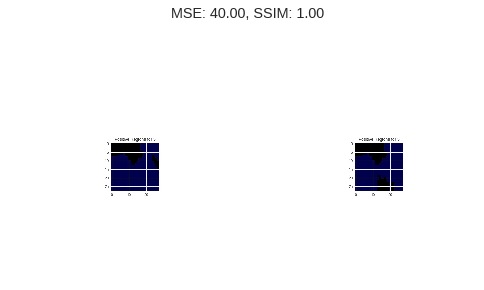

Done for  99 / 200


/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


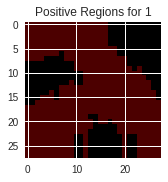

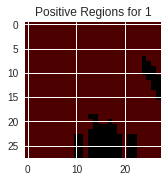

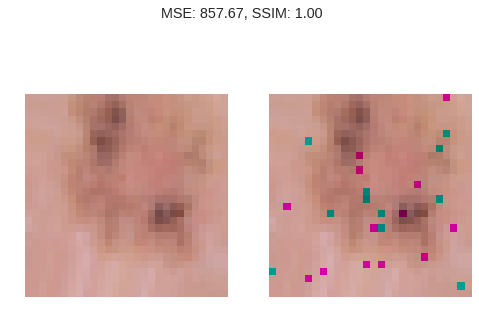

/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


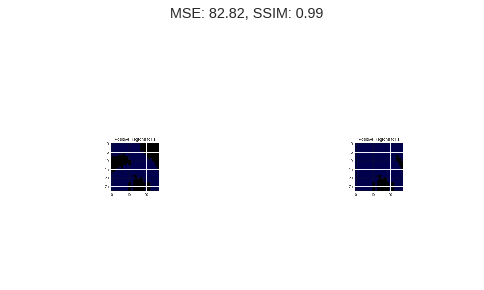

Done for  100 / 200


/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


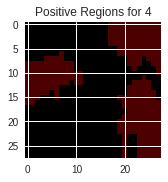

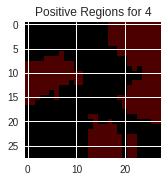

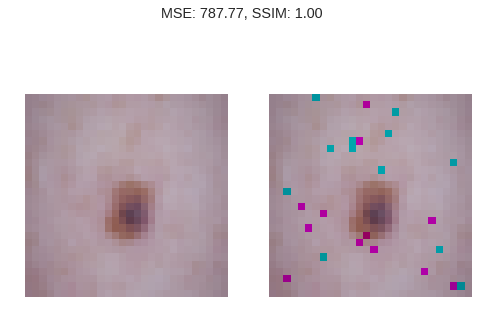

/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


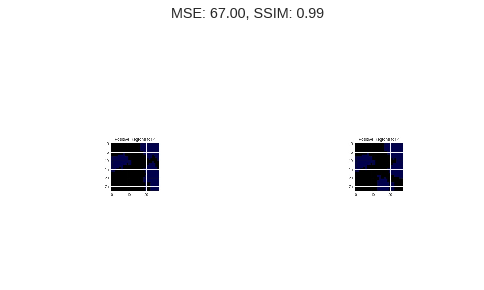

Done for  101 / 200


/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


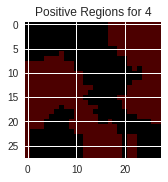

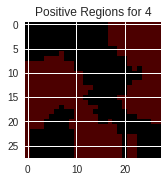

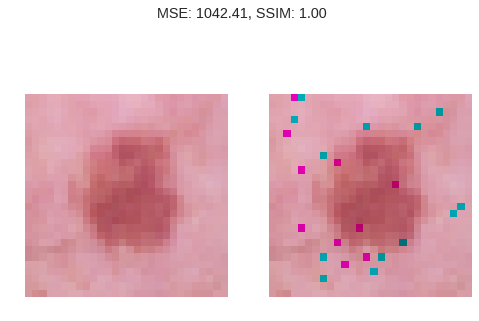

/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


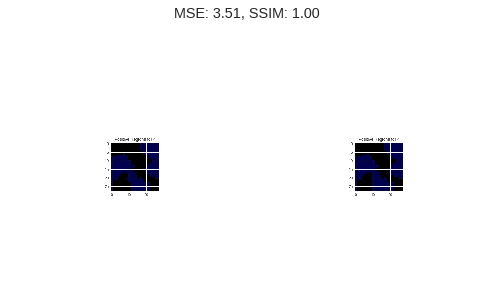

Done for  102 / 200


/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


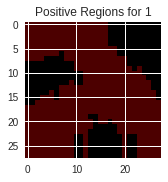

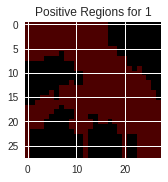

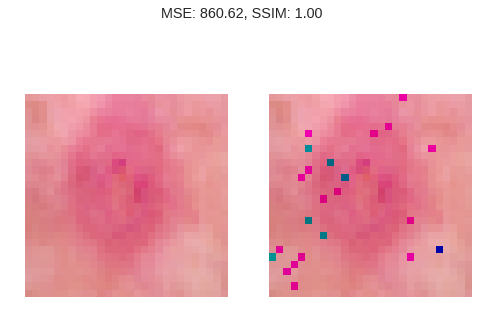

/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


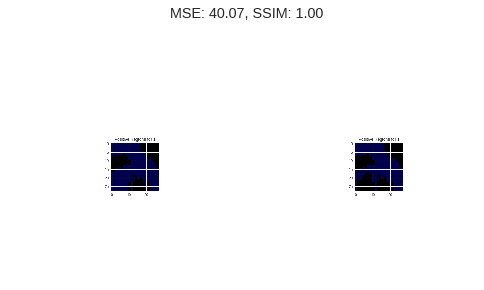

Done for  103 / 200


/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


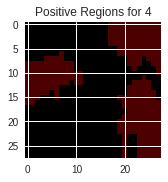

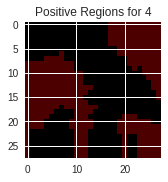

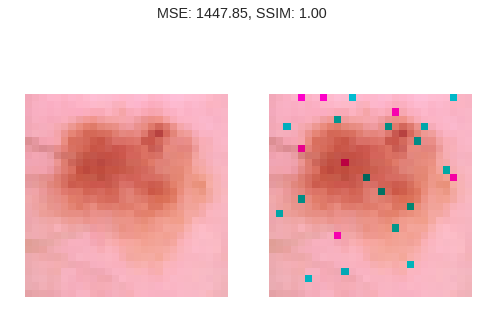

/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


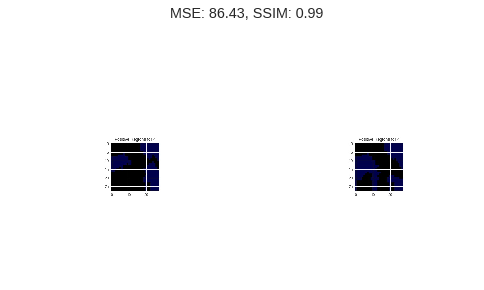

Done for  104 / 200


/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


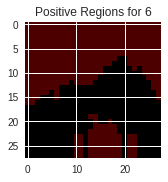

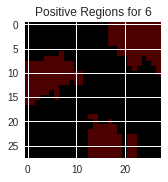

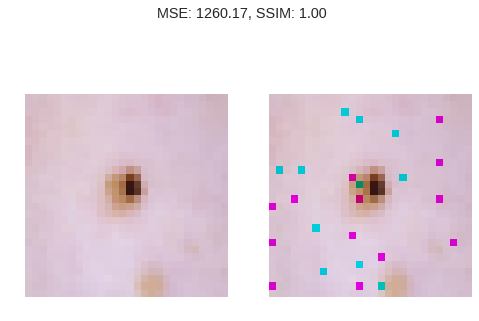

/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


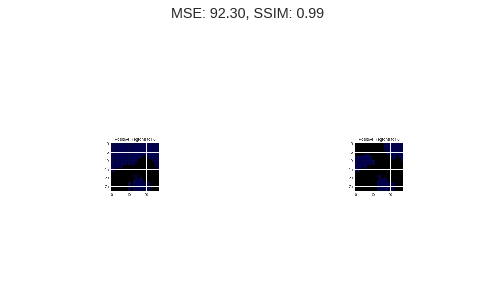

Done for  105 / 200


/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


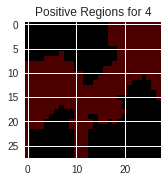

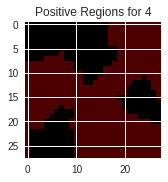

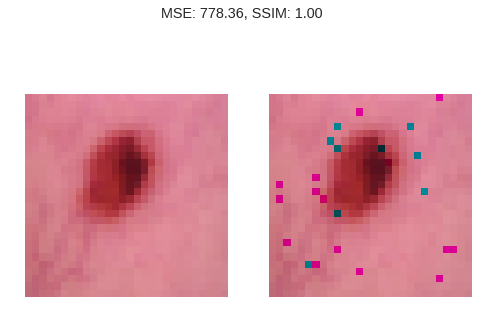

/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


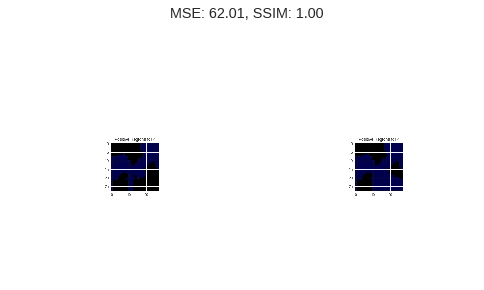

Done for  106 / 200


/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


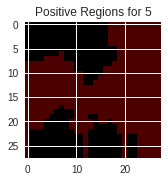

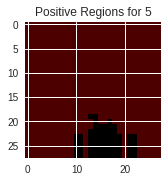

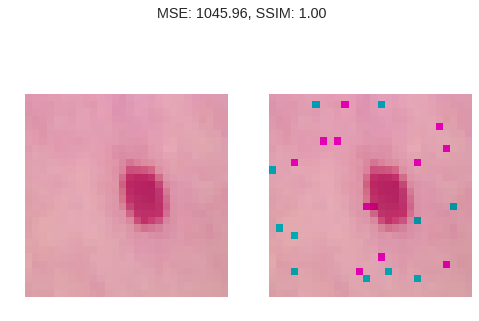

/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


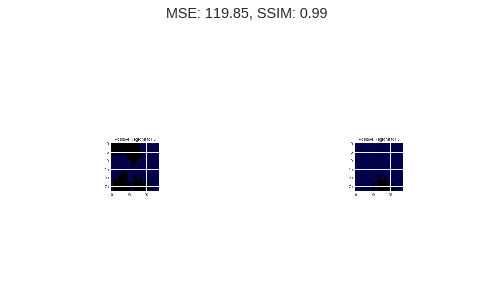

Done for  107 / 200


/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


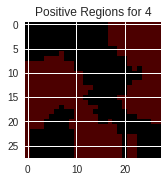

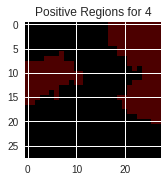

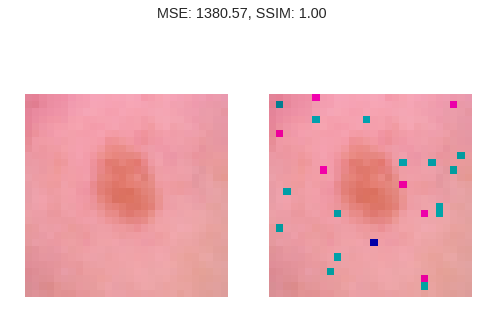

/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


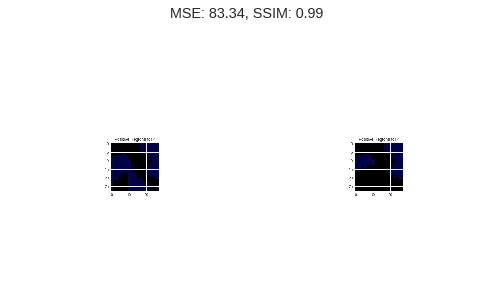

Done for  108 / 200


/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


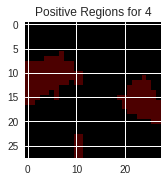

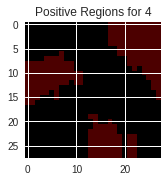

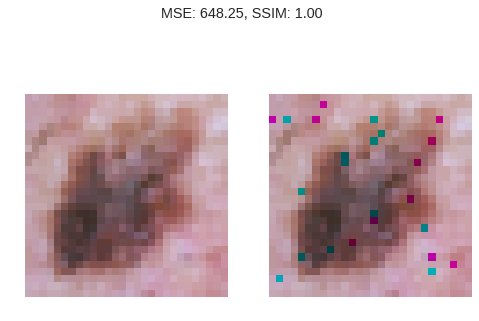

/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


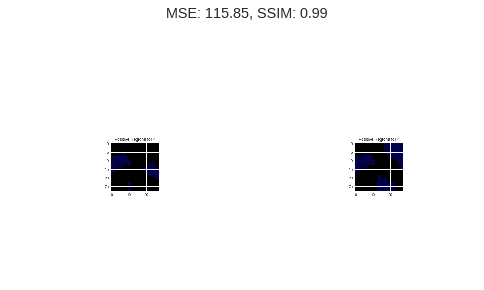

Done for  109 / 200


/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


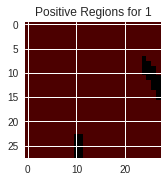

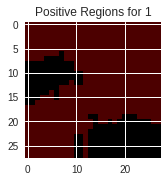

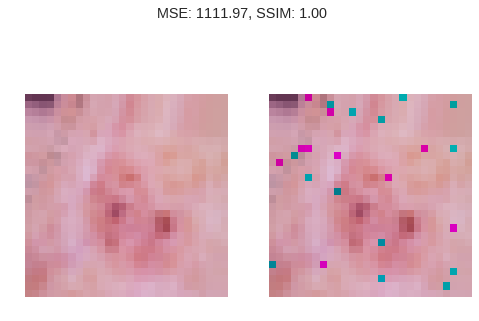

/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


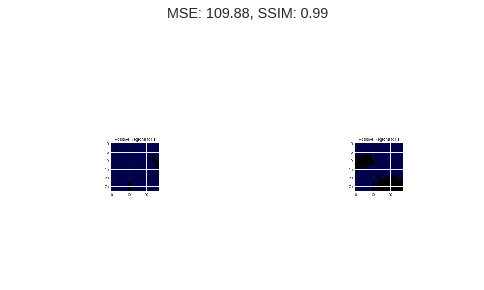

Done for  110 / 200


/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


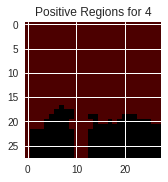

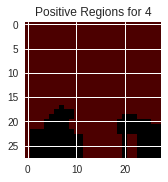

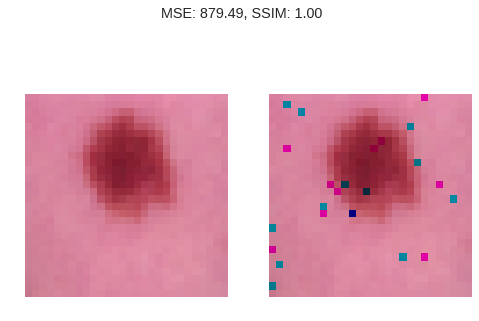

/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


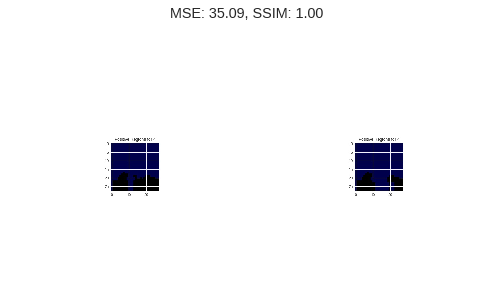

Done for  111 / 200


/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


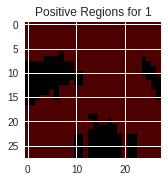

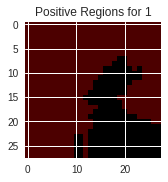

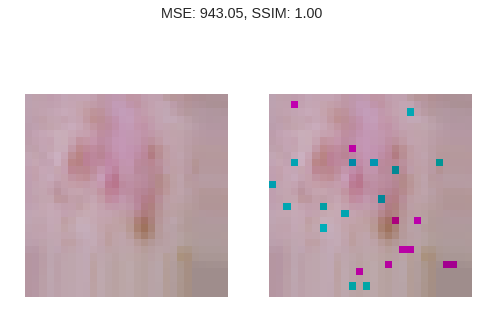

/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


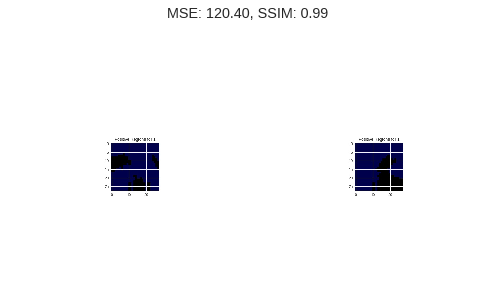

Done for  112 / 200


/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


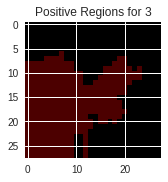

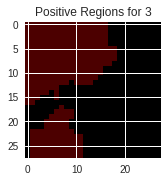

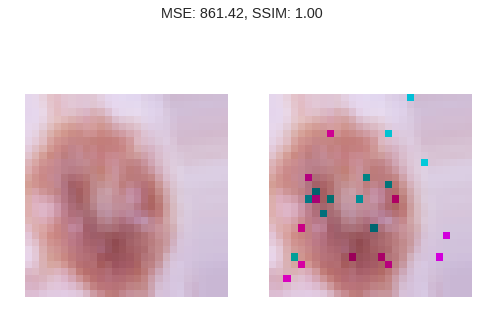

/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


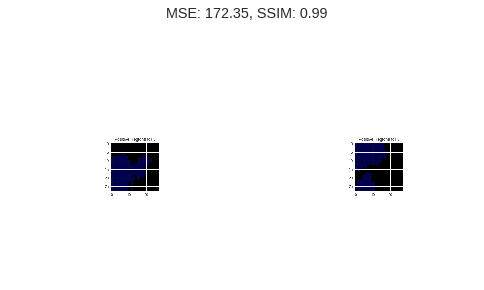

Done for  113 / 200


/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


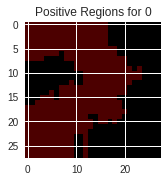

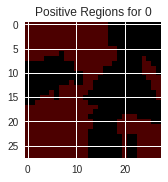

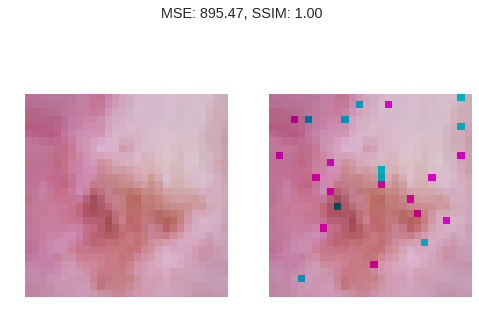

/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


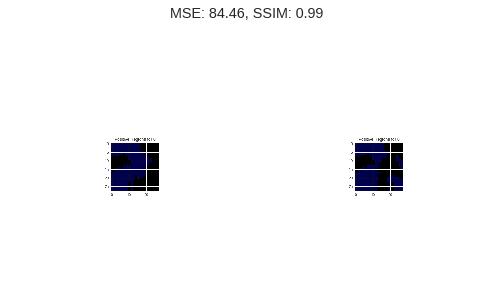

Done for  114 / 200


/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


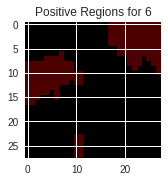

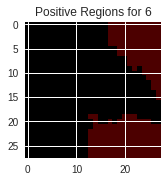

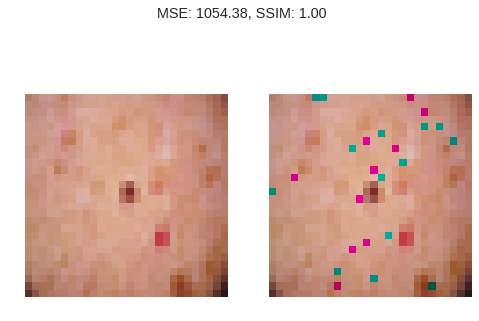

/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


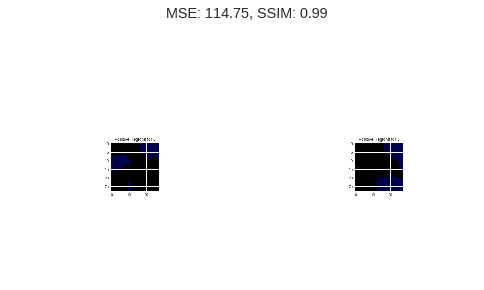

Done for  115 / 200


/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


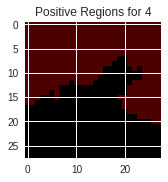

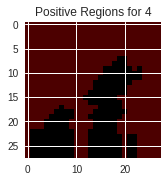

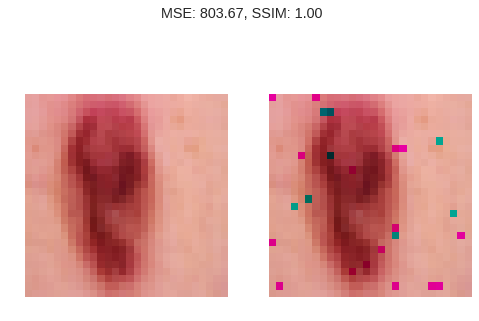

/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


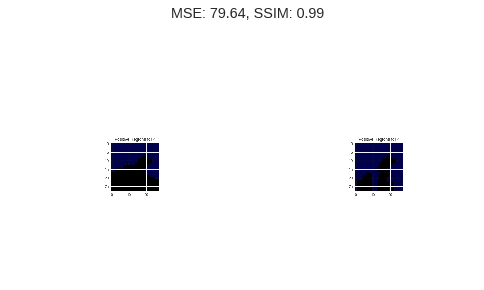

Done for  116 / 200


/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


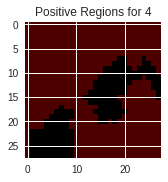

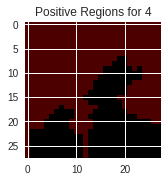

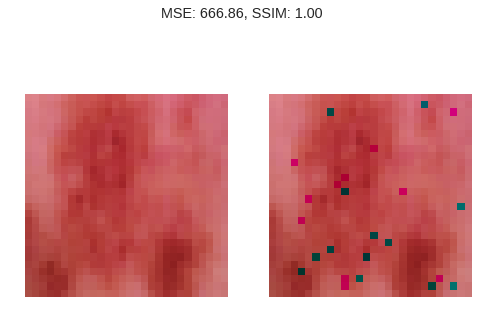

/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


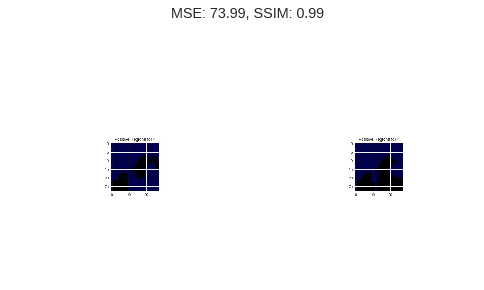

Done for  117 / 200


/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


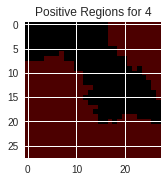

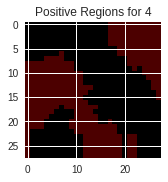

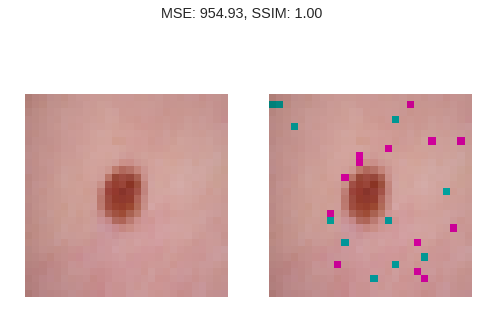

/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


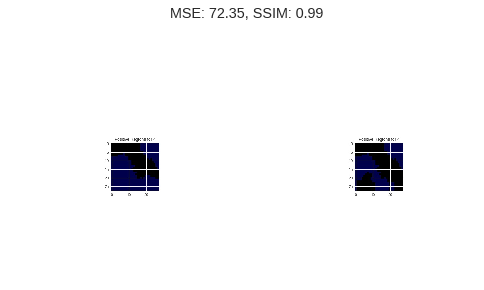

Done for  118 / 200


/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


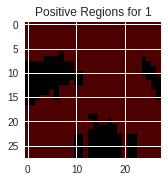

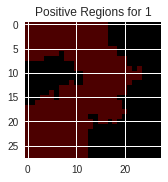

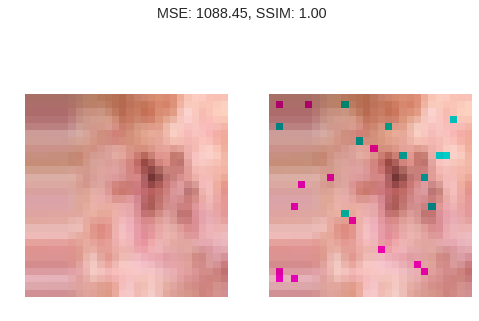

/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


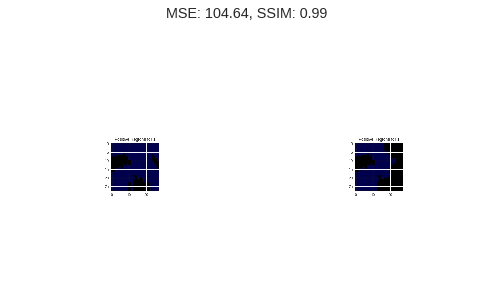

Done for  119 / 200


/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


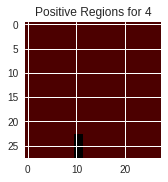

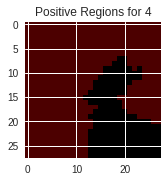

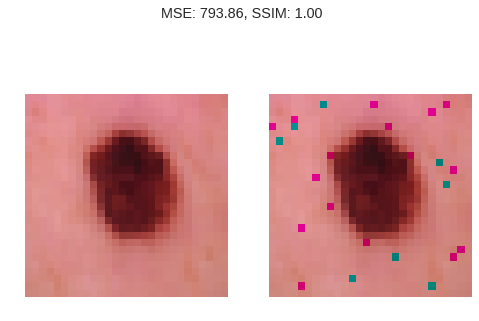

/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


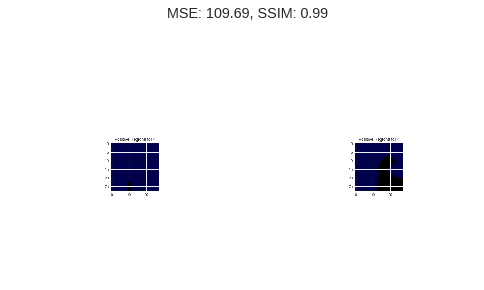

Done for  120 / 200


/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


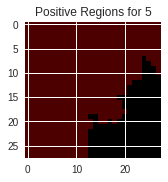

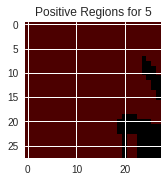

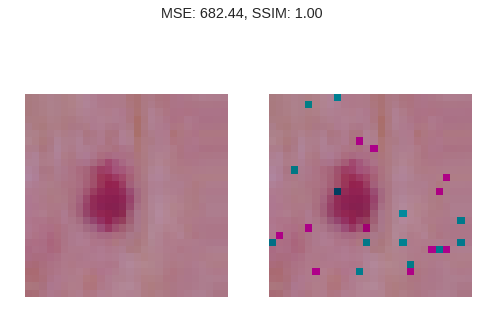

/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


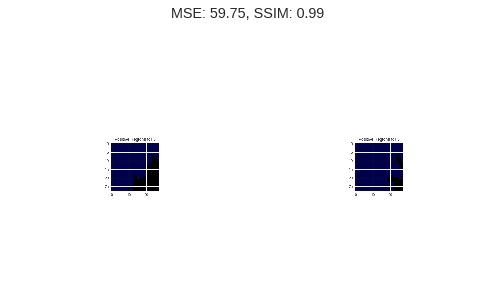

Done for  121 / 200


/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


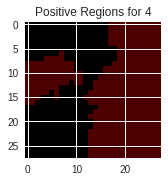

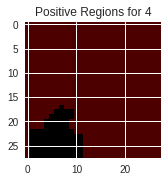

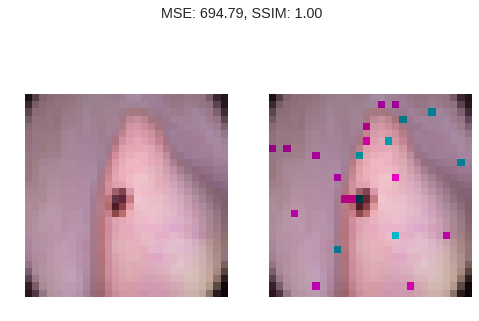

/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


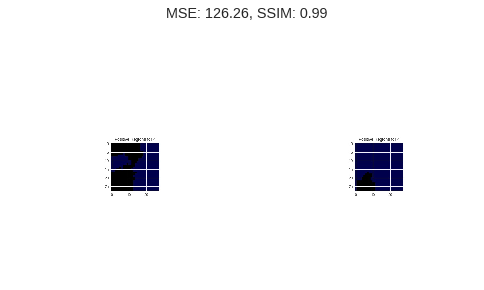

Done for  122 / 200


/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


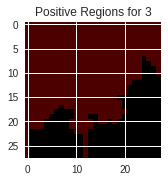

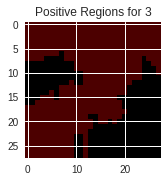

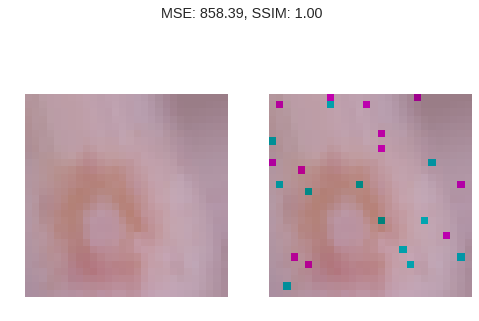

/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


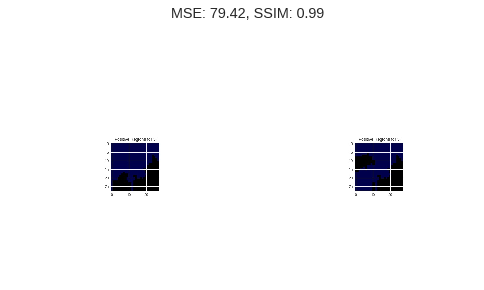

Done for  123 / 200


/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


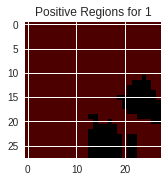

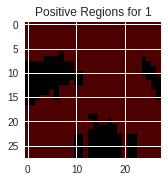

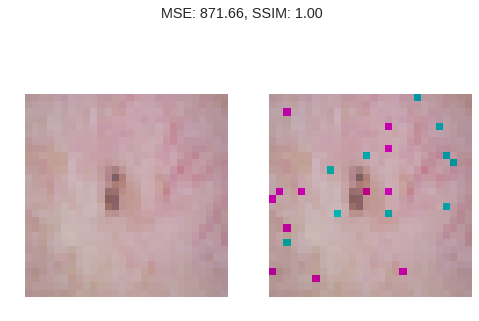

/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


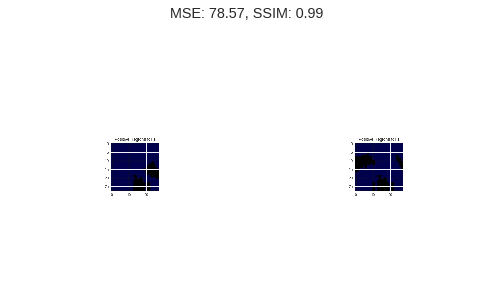

Done for  124 / 200


/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


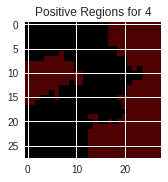

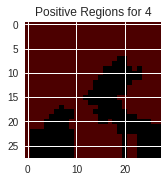

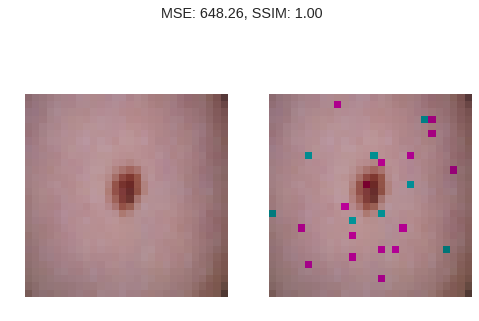

/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


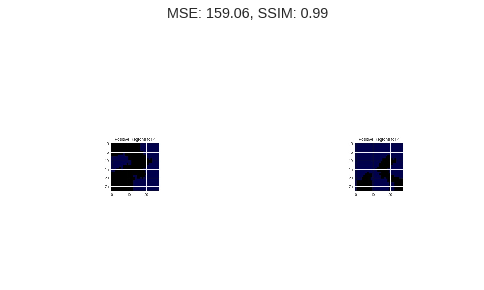

Done for  125 / 200


/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


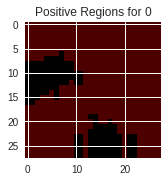

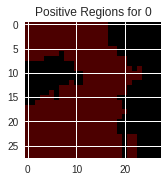

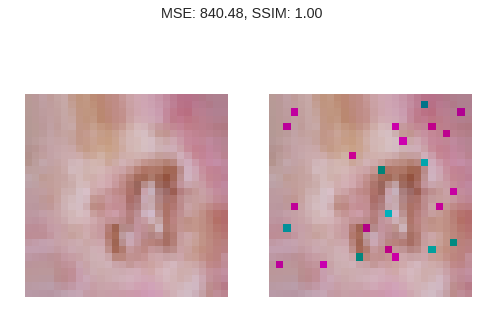

/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


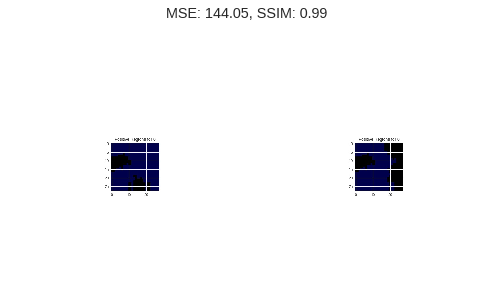

Done for  126 / 200


/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


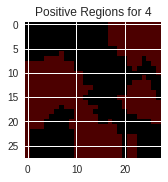

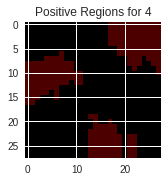

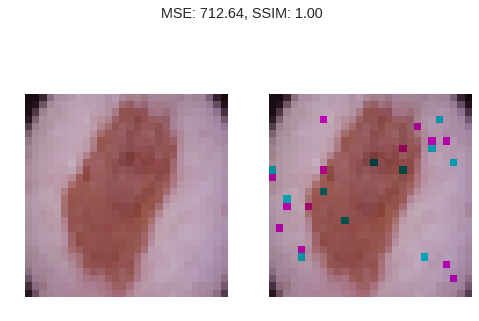

/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


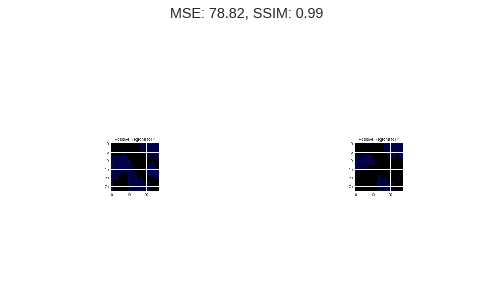

Done for  127 / 200


/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


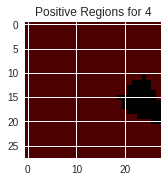

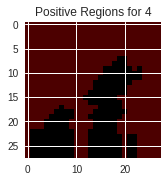

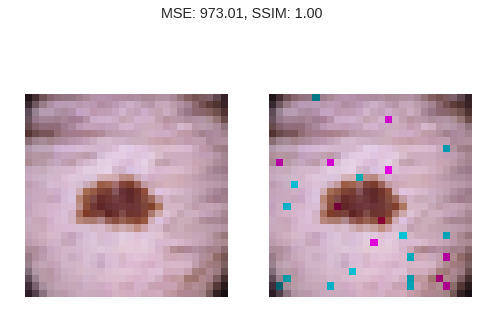

/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


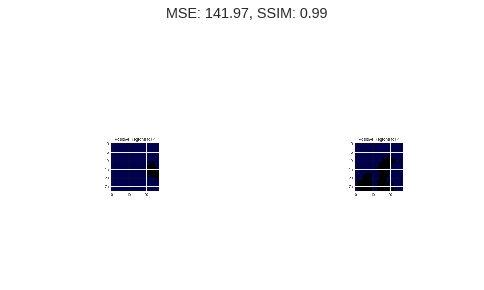

Done for  128 / 200


/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


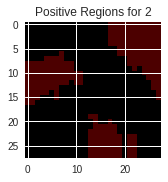

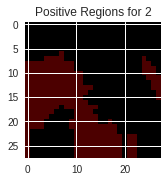

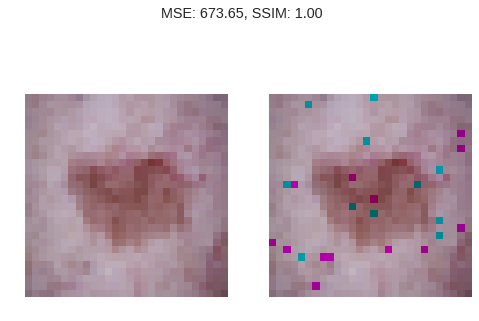

/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


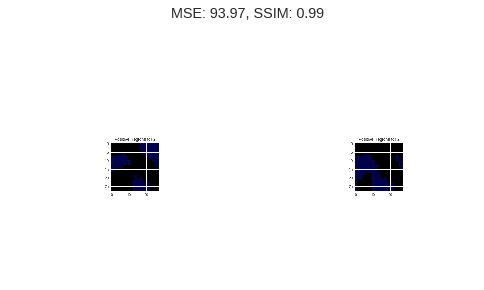

Done for  129 / 200


/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


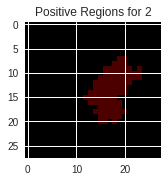

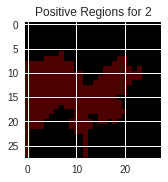

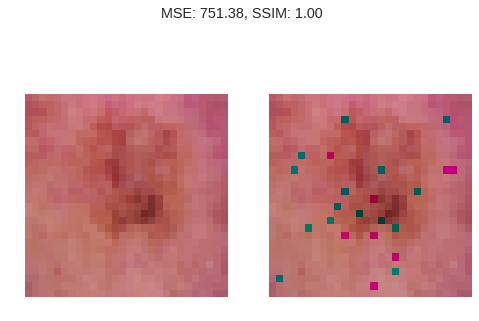

/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


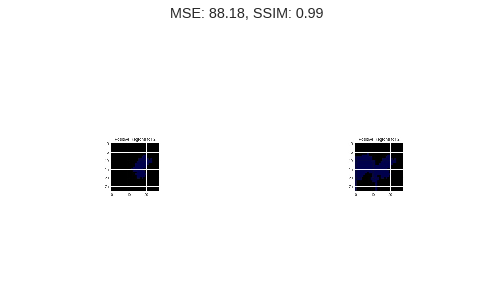

Done for  130 / 200


/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


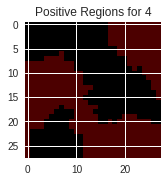

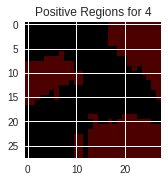

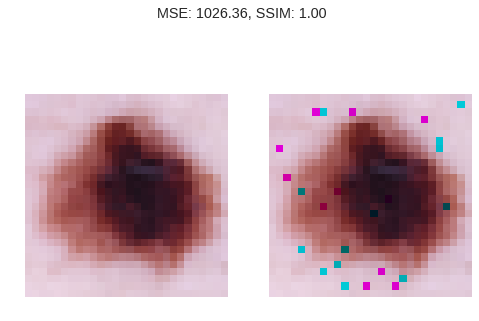

/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


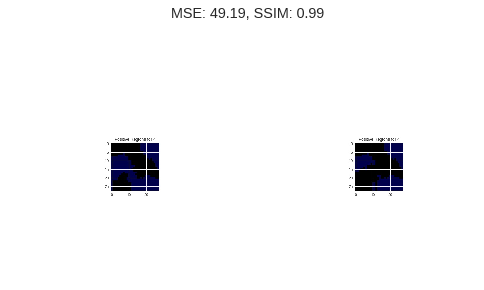

Done for  131 / 200


/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


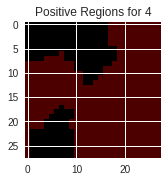

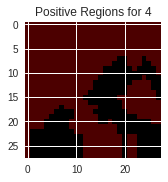

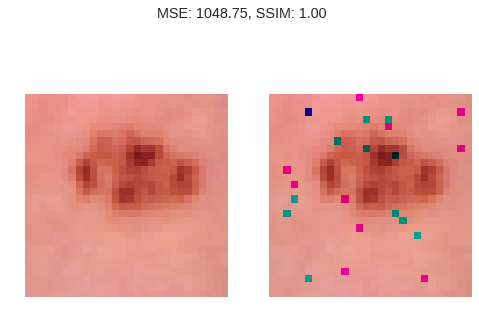

/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


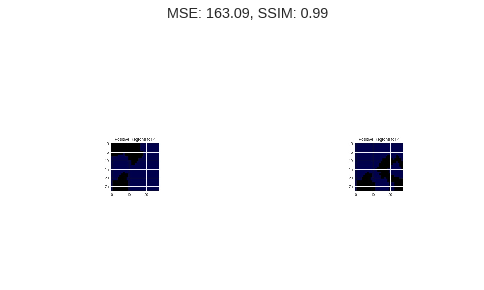

Done for  132 / 200


/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


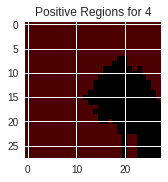

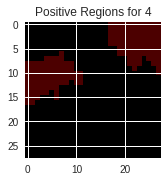

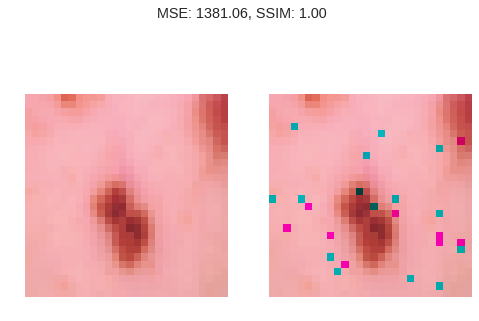

/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


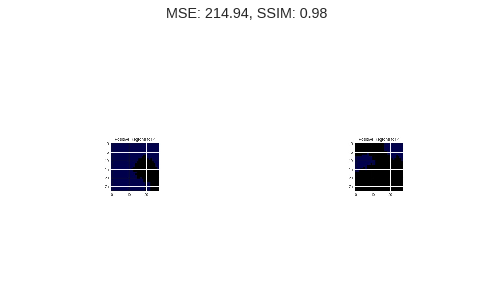

Done for  133 / 200


/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


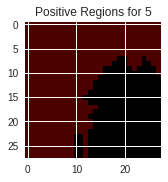

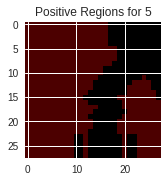

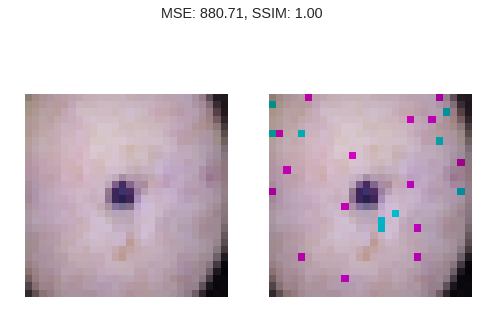

/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


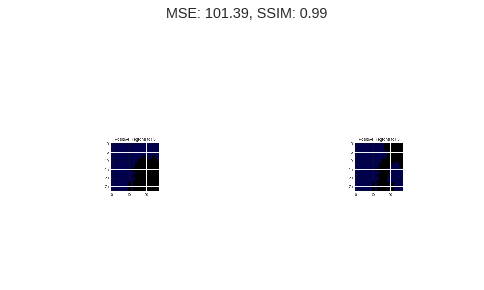

Done for  134 / 200


/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


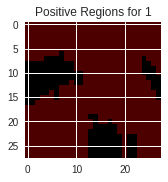

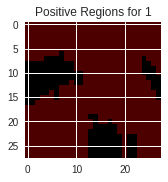

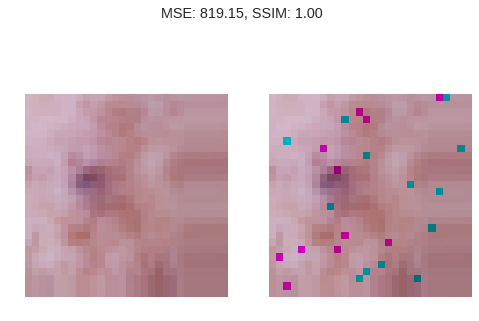

/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


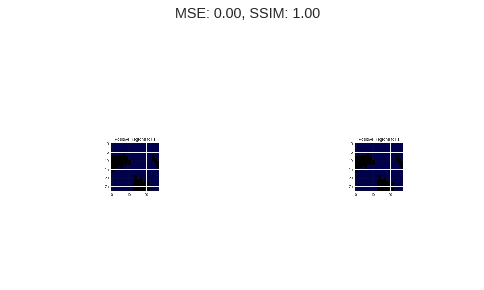

Done for  135 / 200


/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


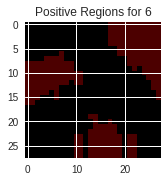

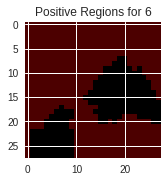

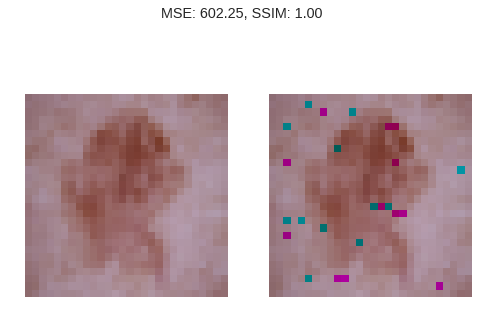

/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


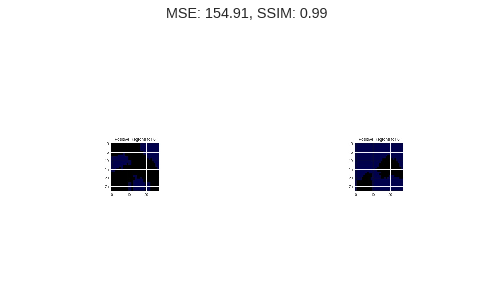

Done for  136 / 200


/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


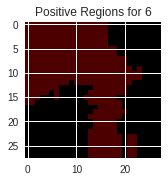

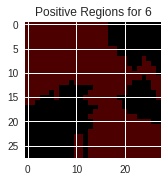

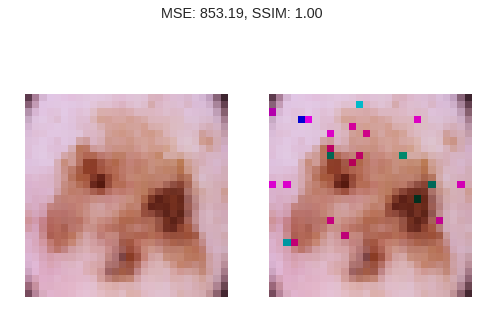

/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


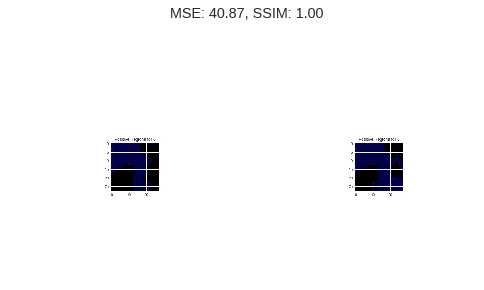

Done for  137 / 200


/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


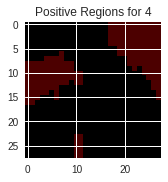

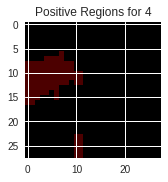

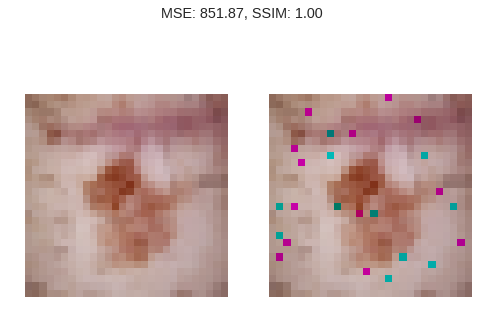

/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


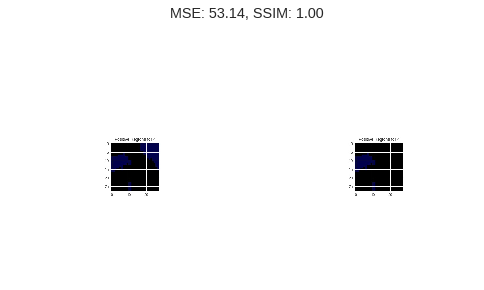

Done for  138 / 200


/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


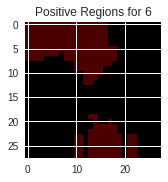

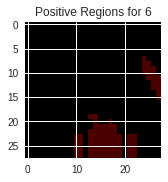

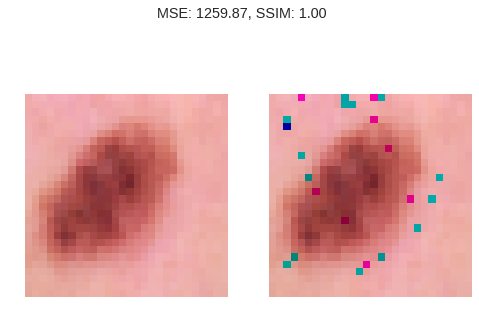

/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


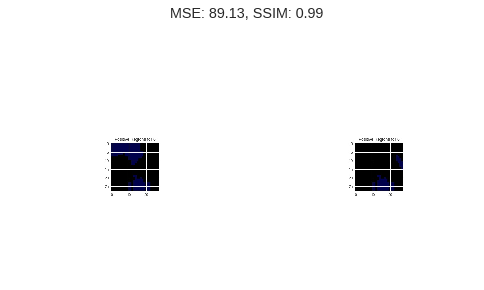

Done for  139 / 200


/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


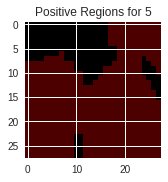

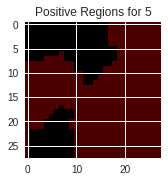

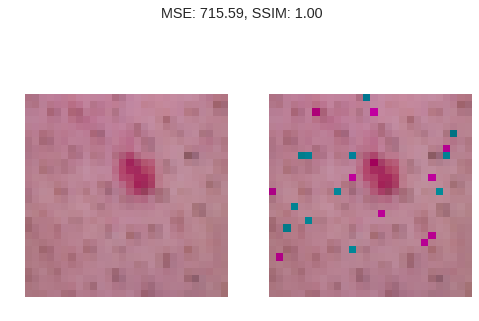

/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


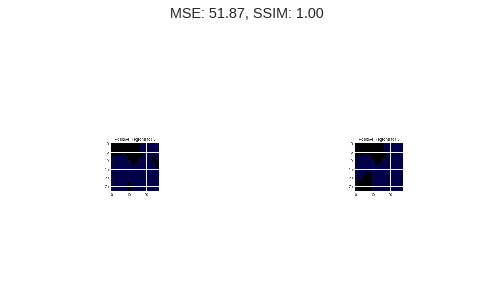

Done for  140 / 200


/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


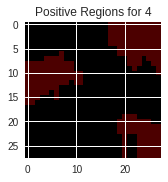

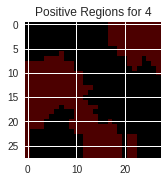

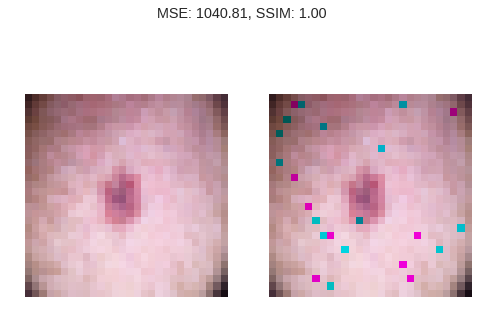

/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


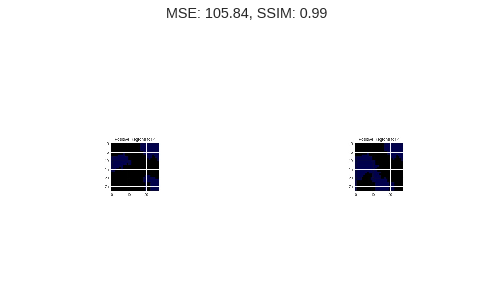

Done for  141 / 200


/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


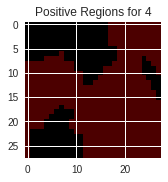

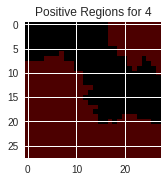

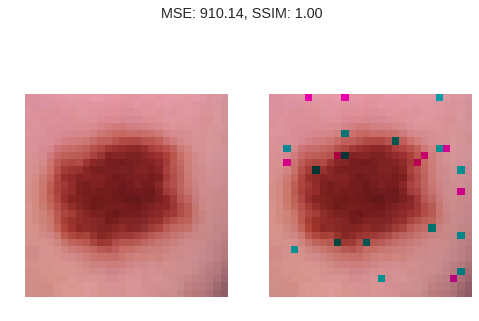

/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


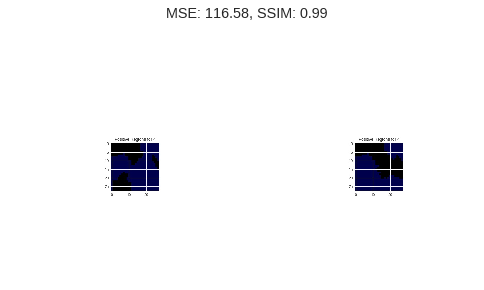

Done for  142 / 200


/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


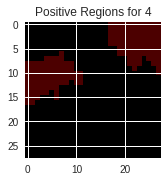

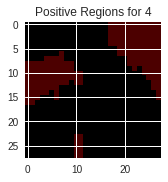

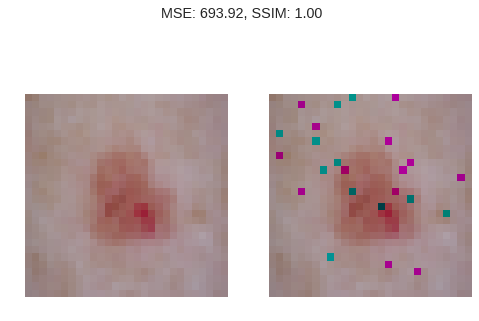

/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


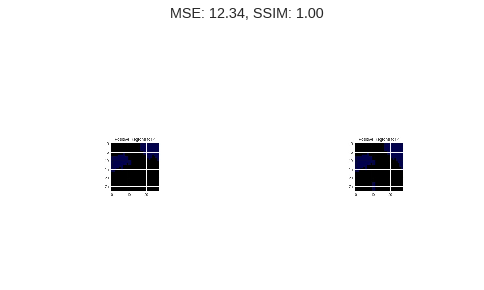

Done for  143 / 200


/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


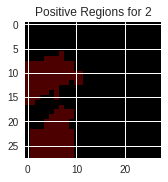

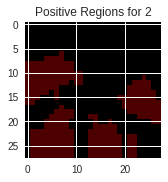

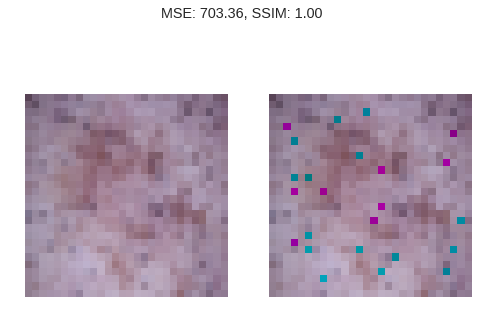

/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


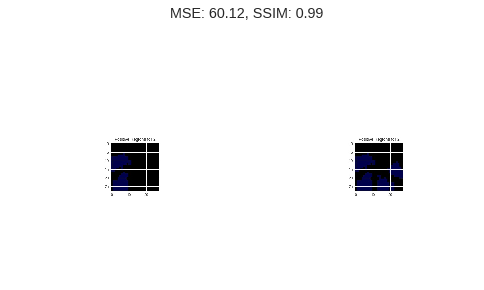

Done for  144 / 200


/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


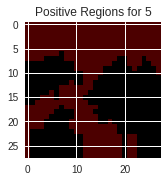

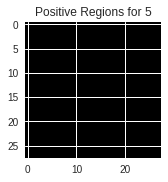

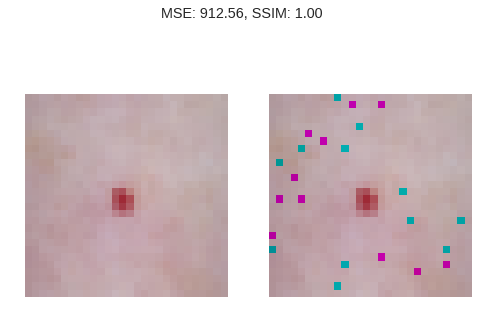

/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


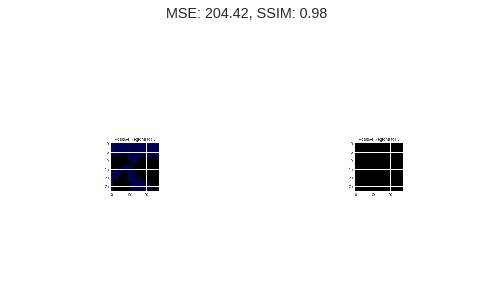

Done for  145 / 200


/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


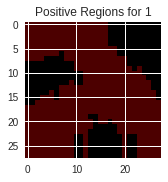

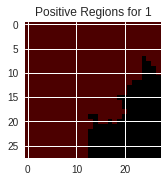

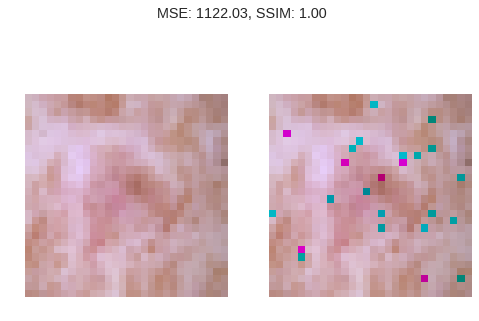

/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


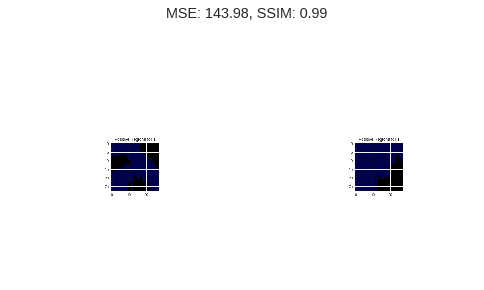

Done for  146 / 200


/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


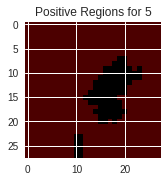

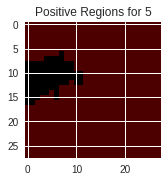

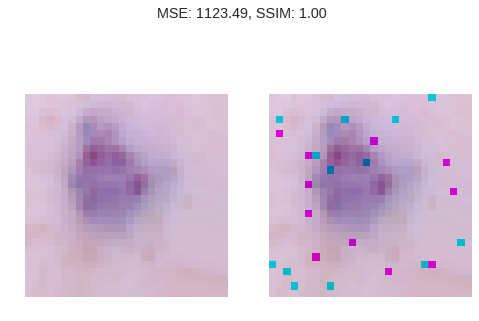

/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


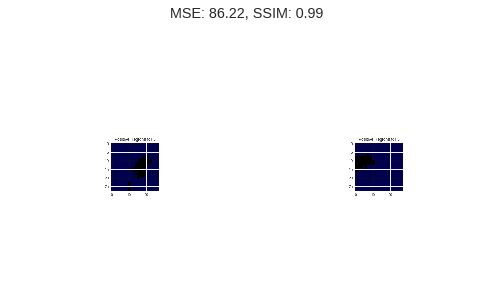

Done for  147 / 200


/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


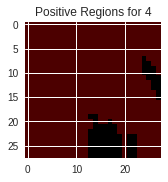

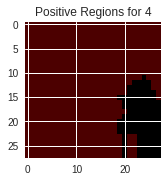

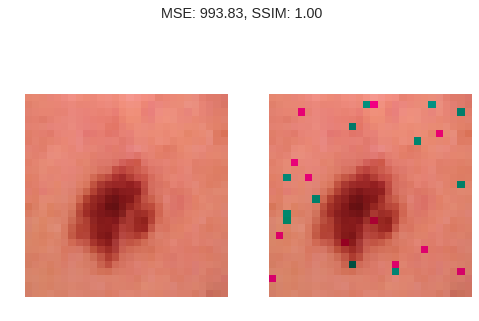

/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


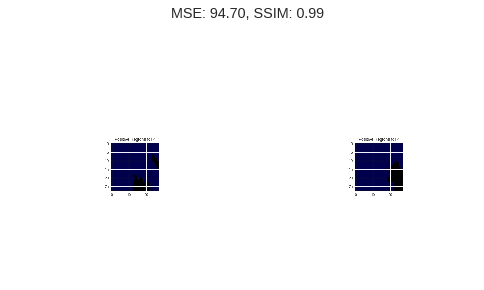

Done for  148 / 200


/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


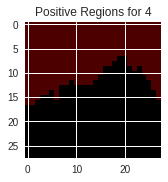

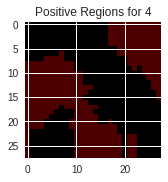

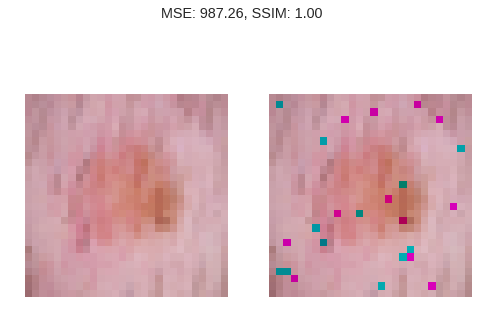

/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


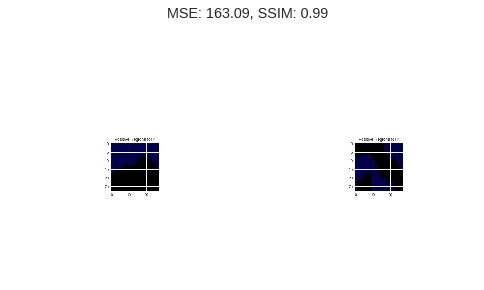

Done for  149 / 200


/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


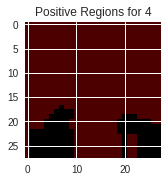

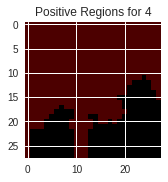

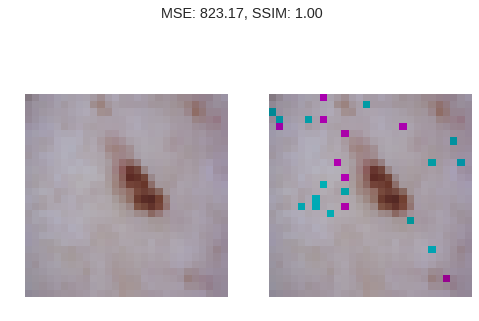

/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


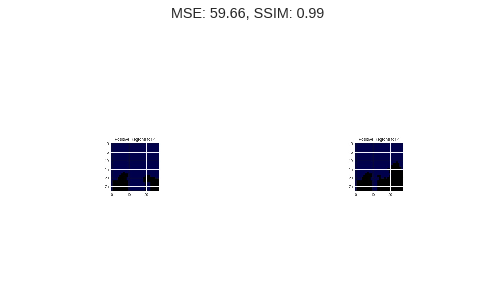

Done for  150 / 200


/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


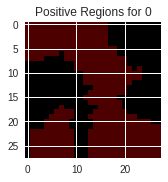

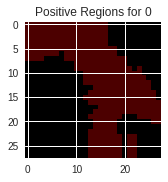

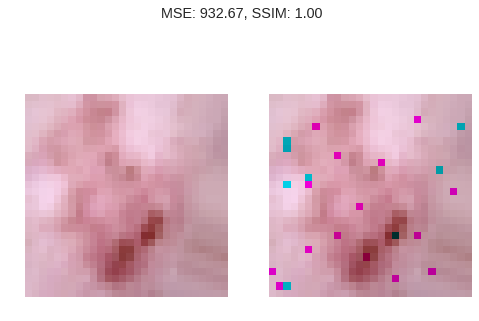

/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


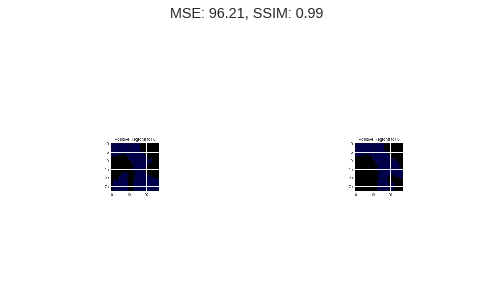

Done for  151 / 200


/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


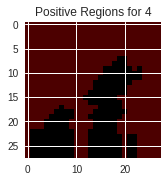

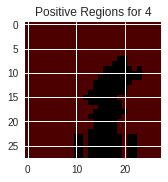

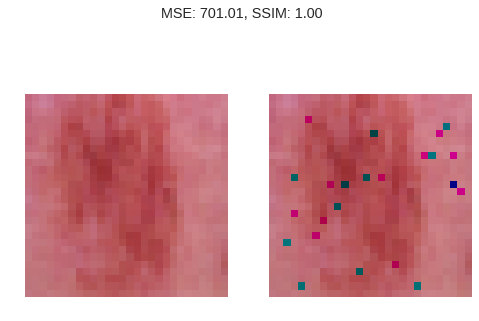

/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


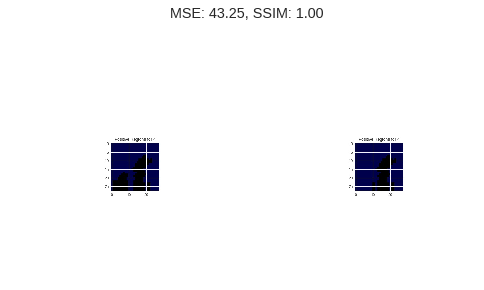

Done for  152 / 200


/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


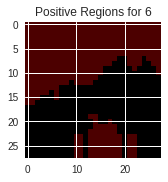

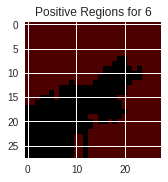

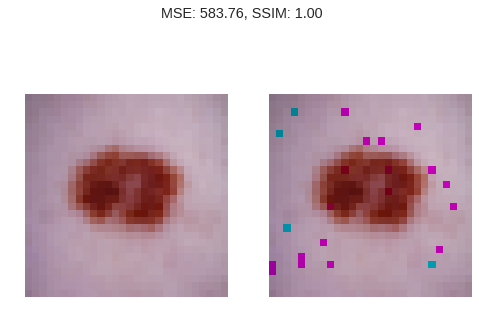

/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


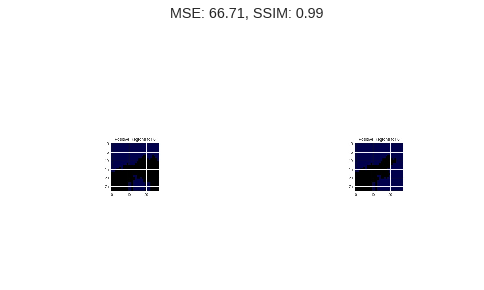

Done for  153 / 200


/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


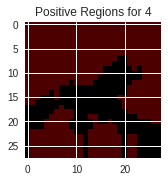

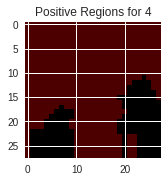

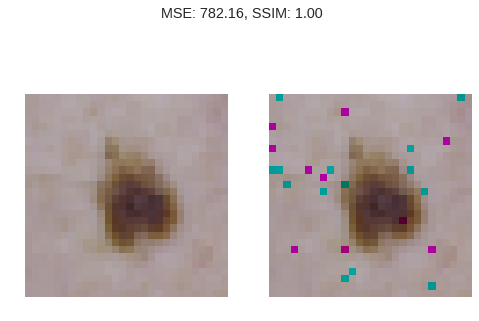

/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


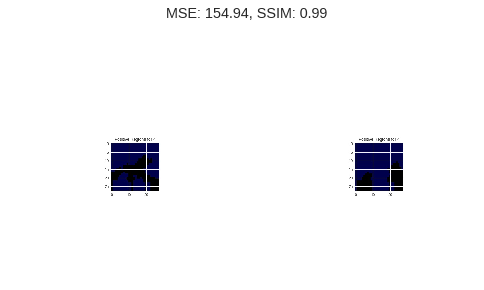

Done for  154 / 200


/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


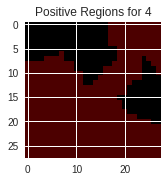

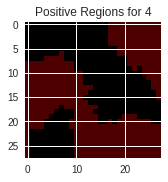

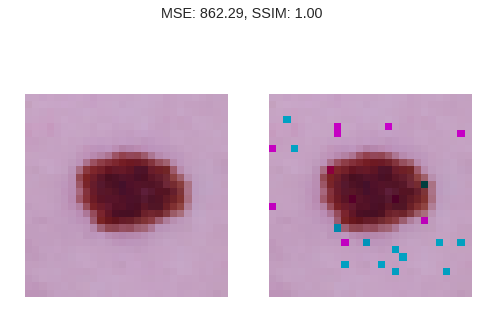

/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


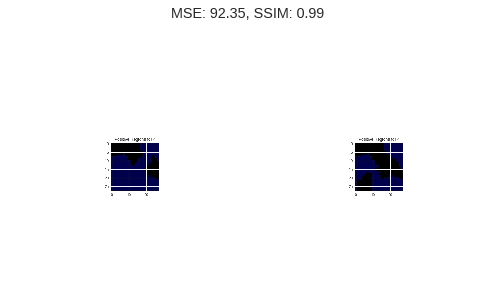

Done for  155 / 200


/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


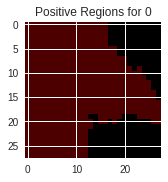

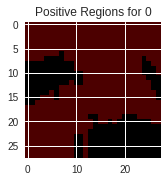

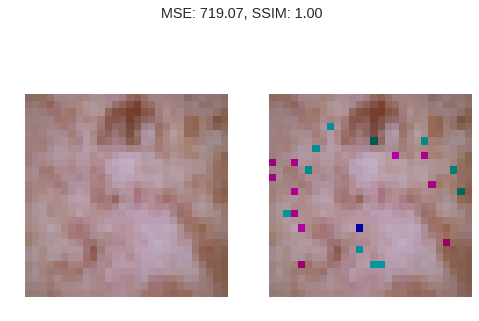

/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


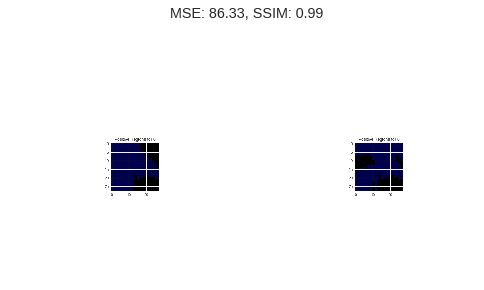

Done for  156 / 200


/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


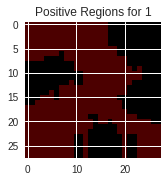

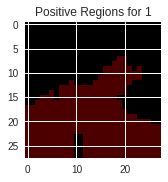

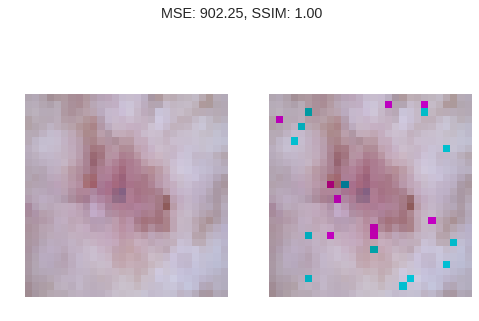

/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


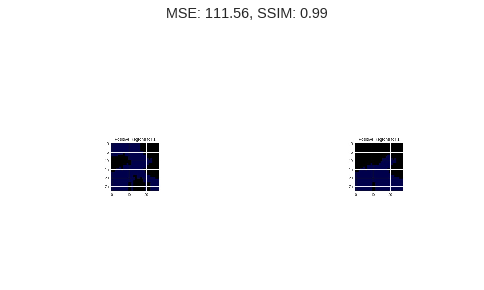

Done for  157 / 200


/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


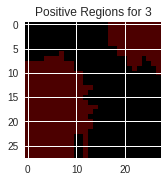

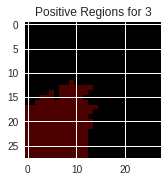

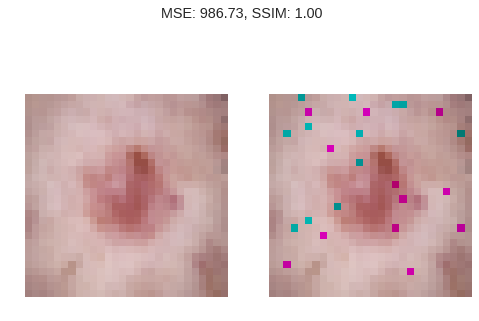

/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


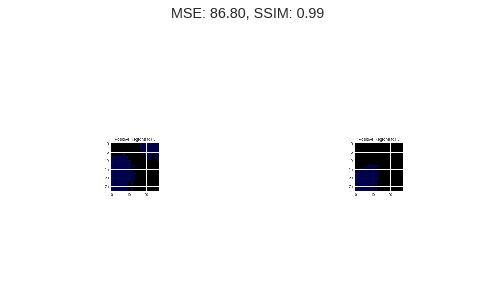

Done for  158 / 200


/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


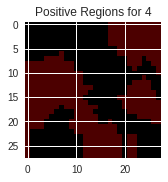

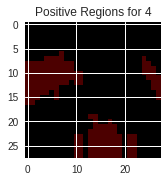

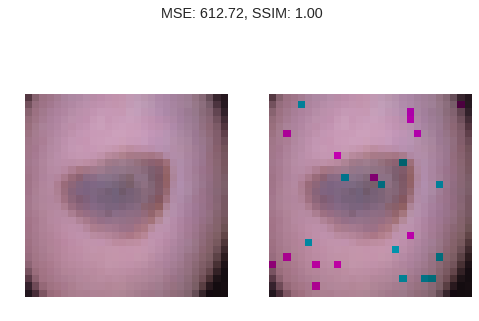

/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


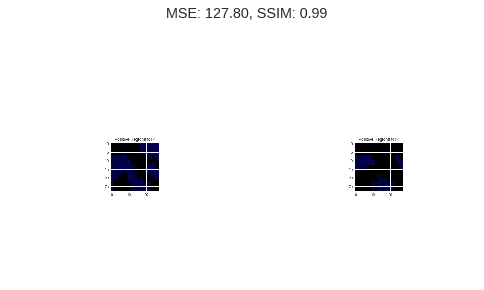

Done for  159 / 200


/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


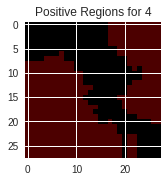

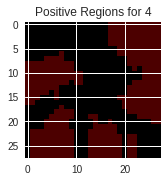

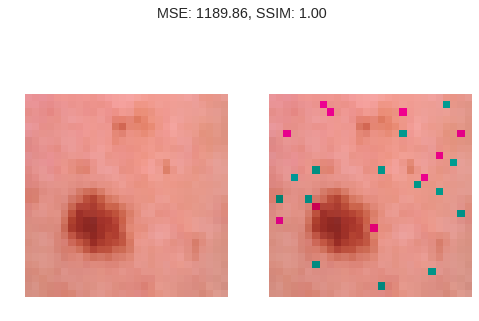

/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


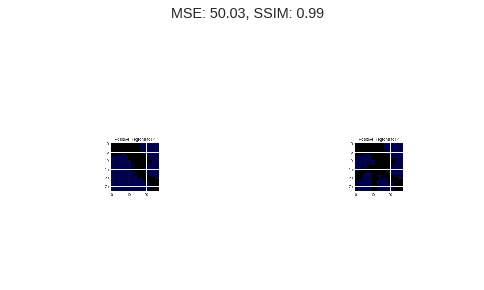

Done for  160 / 200


/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


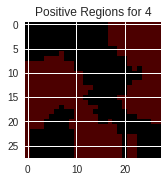

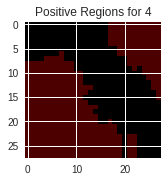

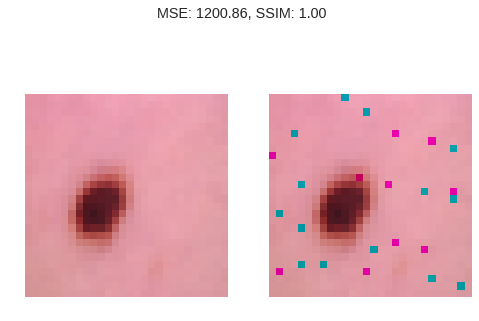

/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


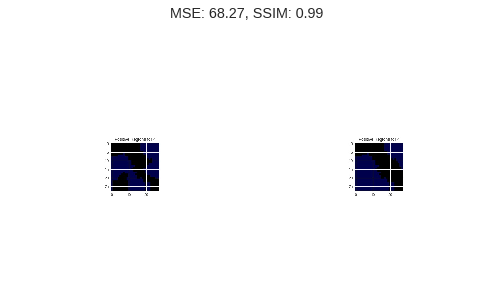

Done for  161 / 200


/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


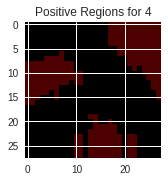

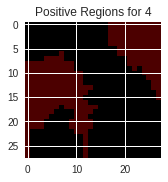

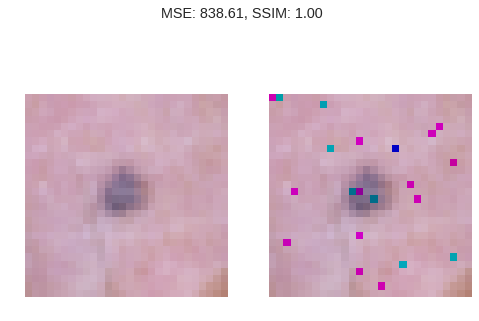

/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


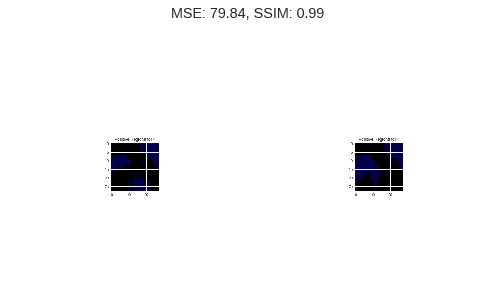

Done for  162 / 200


/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


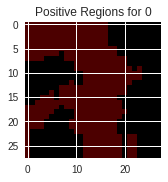

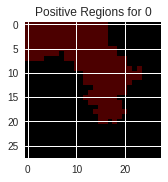

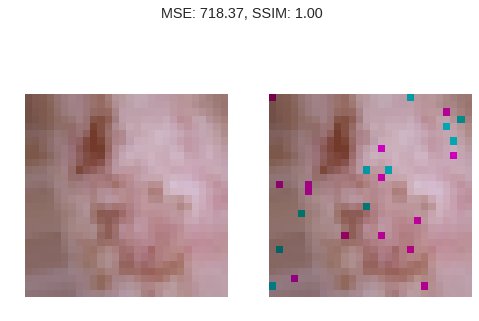

/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


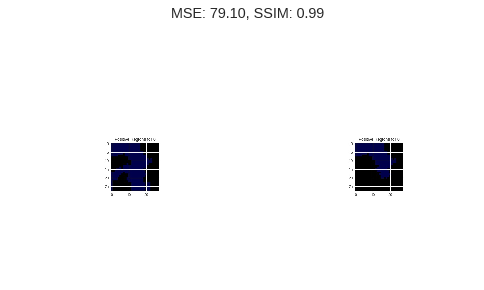

Done for  163 / 200


/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


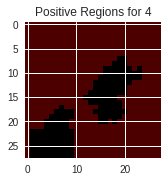

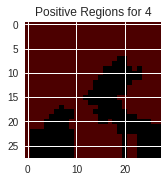

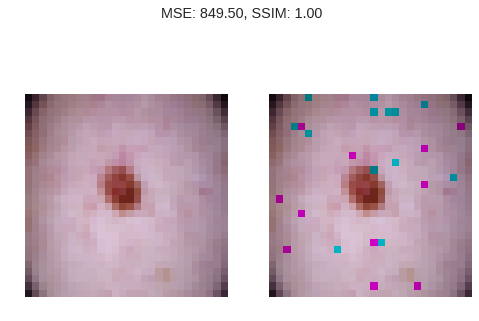

/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


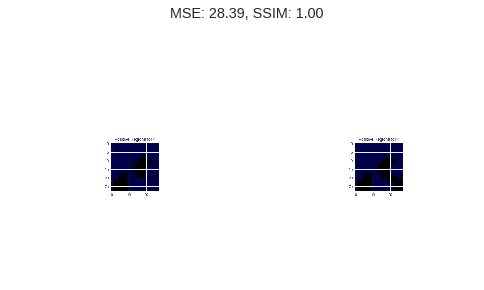

Done for  164 / 200


/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


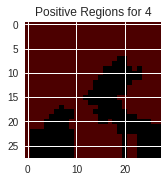

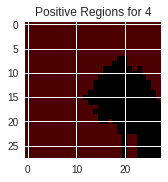

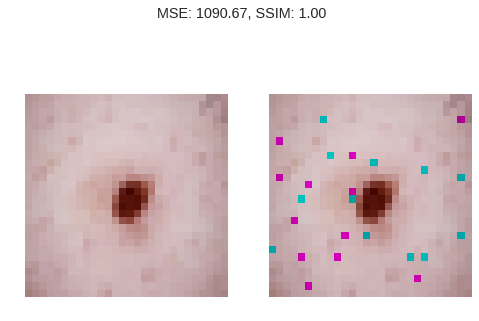

/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


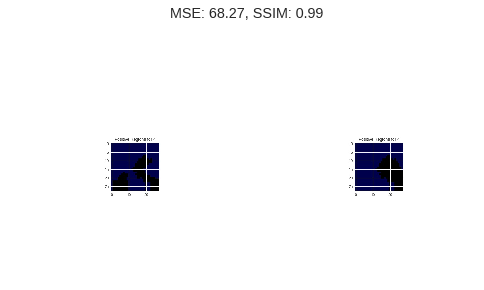

Done for  165 / 200


/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


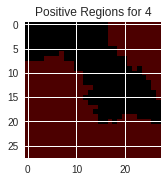

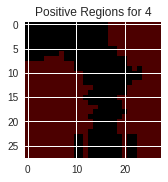

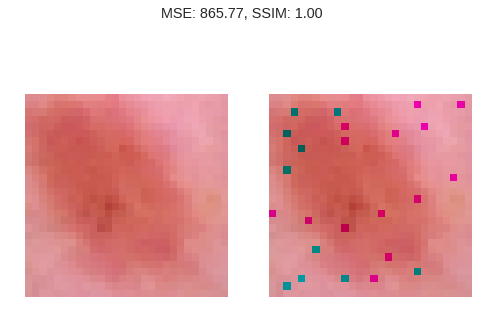

/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


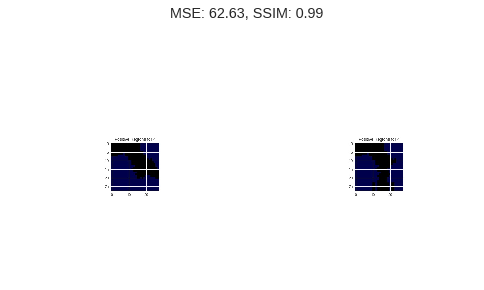

Done for  166 / 200


/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


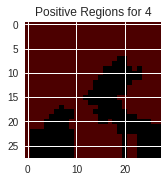

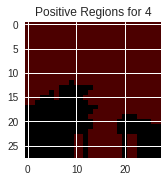

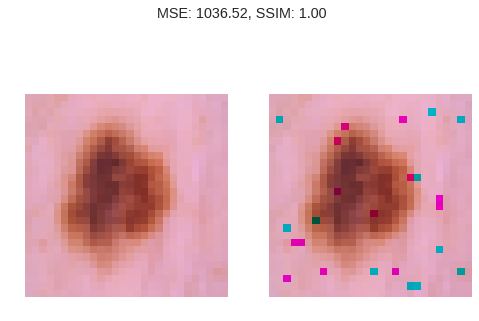

/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


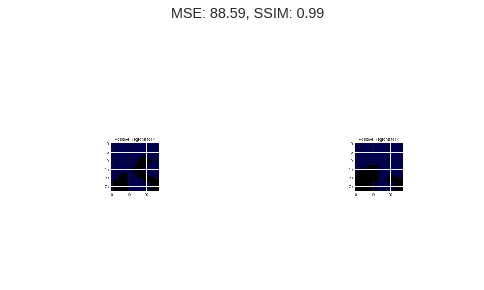

Done for  167 / 200


/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


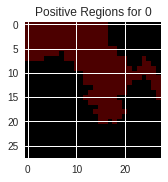

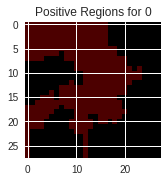

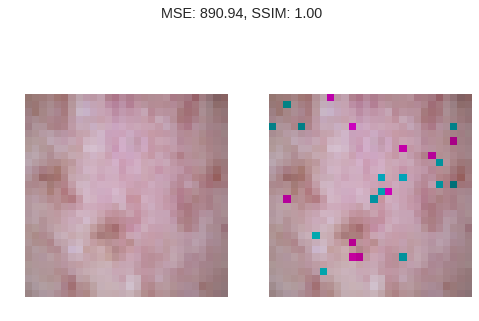

/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


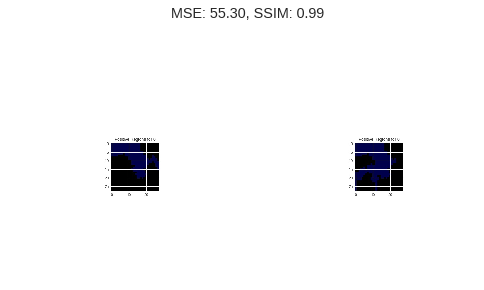

Done for  168 / 200


/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


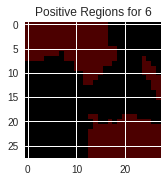

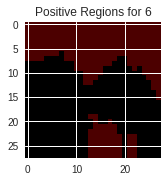

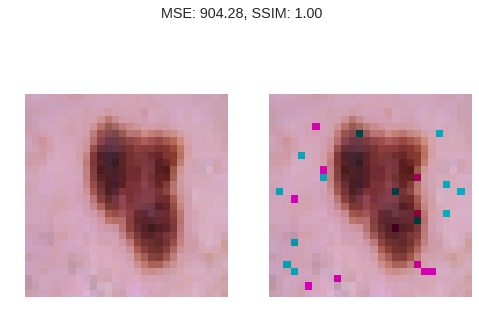

/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


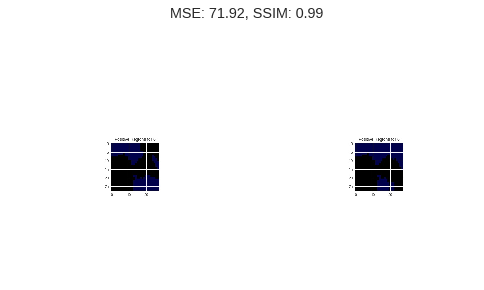

Done for  169 / 200


/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


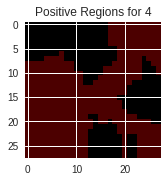

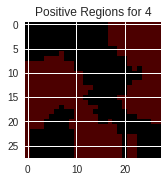

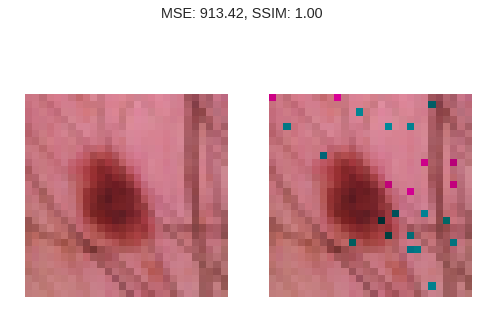

/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


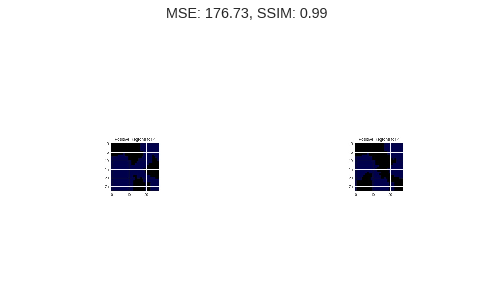

Done for  170 / 200


/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


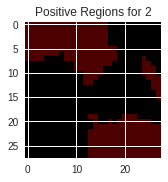

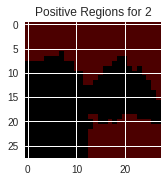

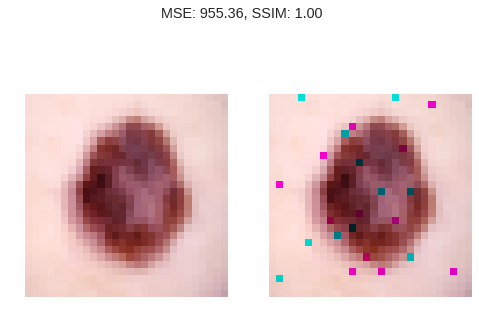

/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


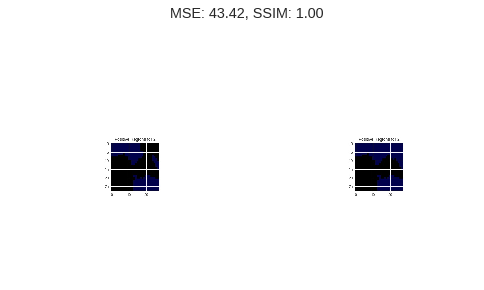

Done for  171 / 200


/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


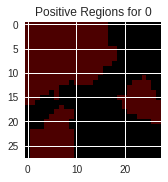

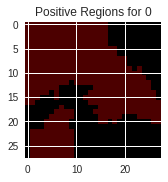

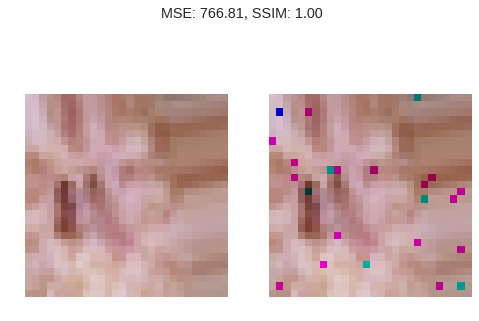

/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


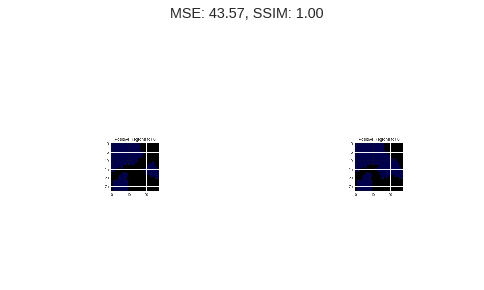

Done for  172 / 200


/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


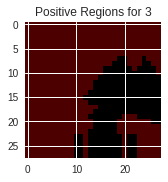

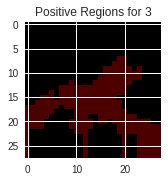

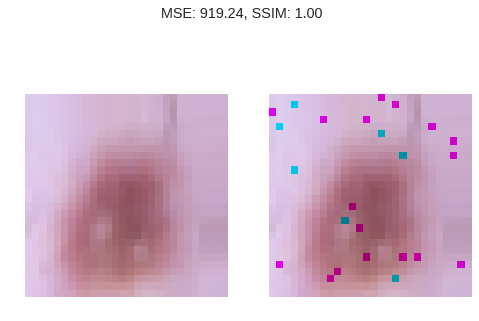

/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


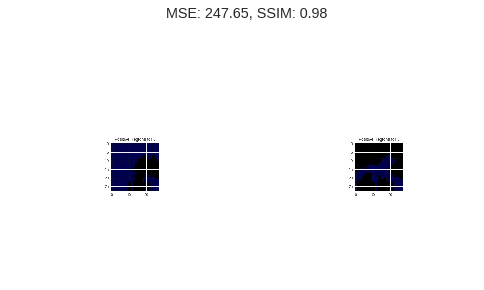

Done for  173 / 200


/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


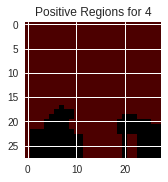

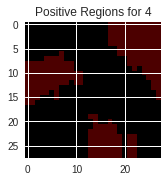

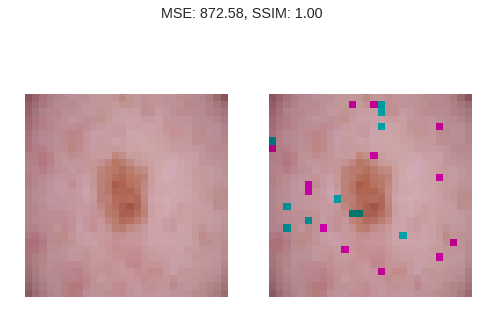

/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


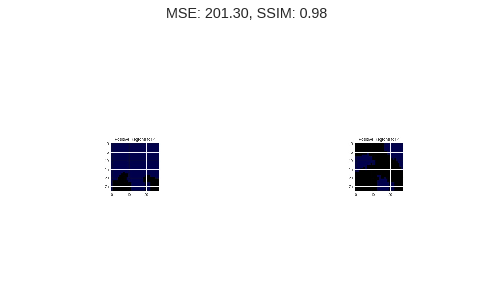

Done for  174 / 200


/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


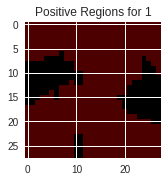

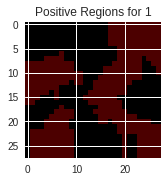

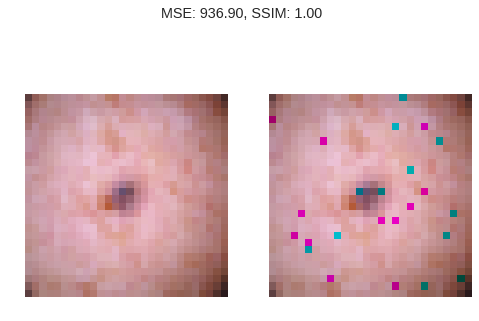

/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


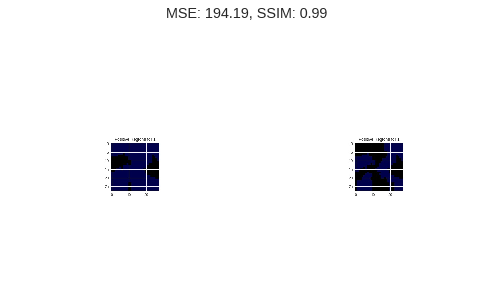

Done for  175 / 200


/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


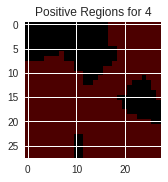

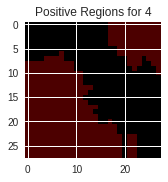

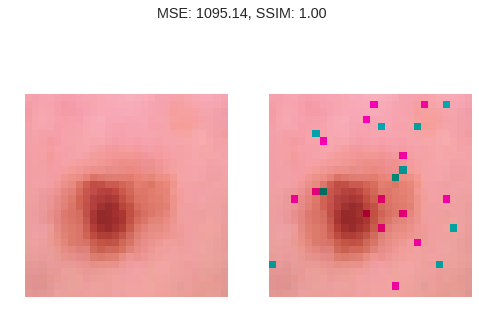

/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


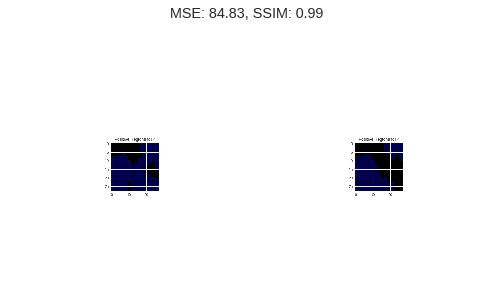

Done for  176 / 200


/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


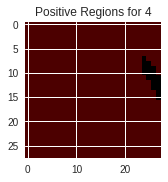

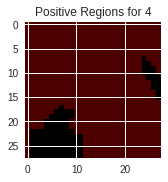

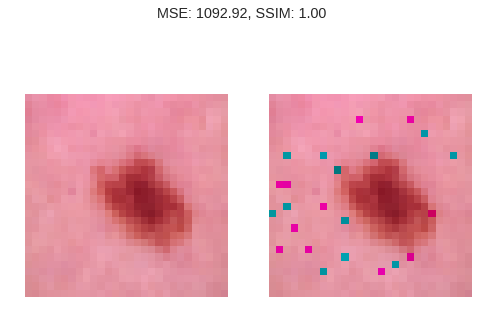

/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


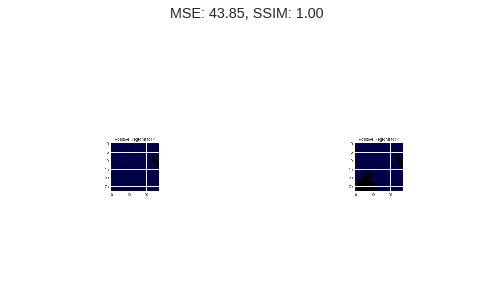

Done for  177 / 200


/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


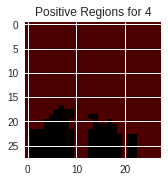

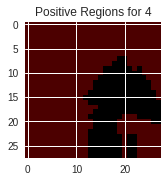

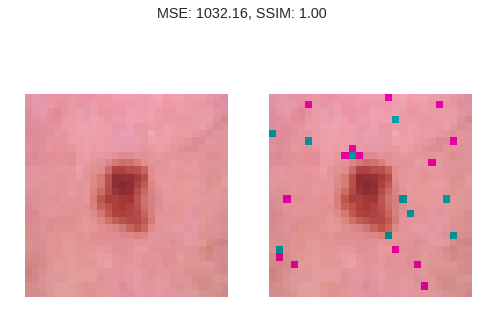

/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


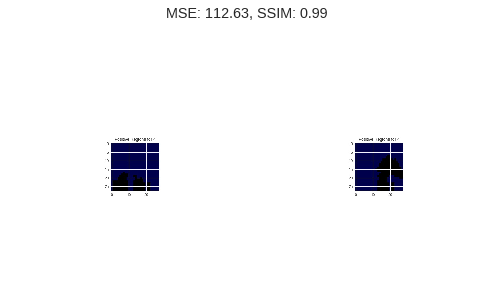

Done for  178 / 200


/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


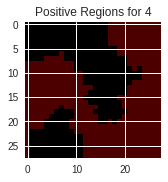

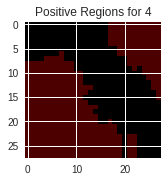

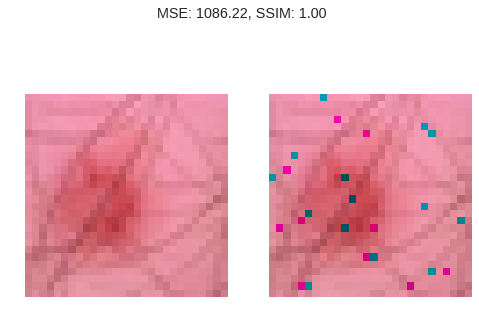

/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


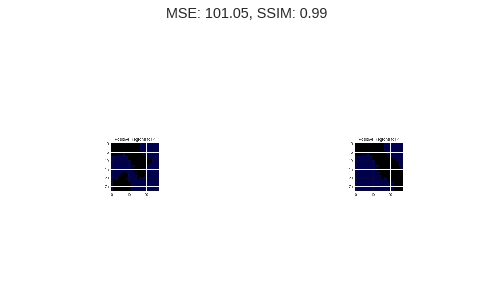

Done for  179 / 200


/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


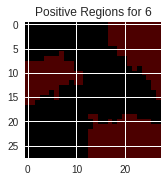

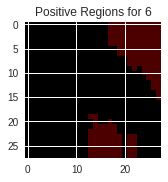

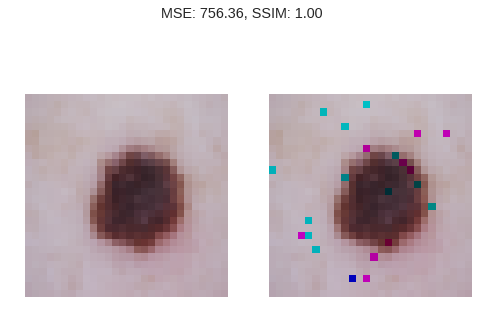

/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


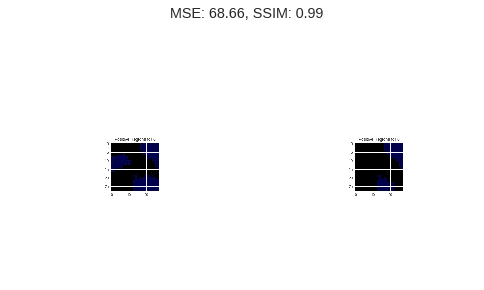

Done for  180 / 200


/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


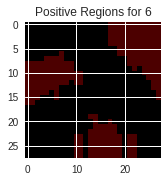

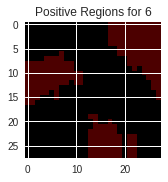

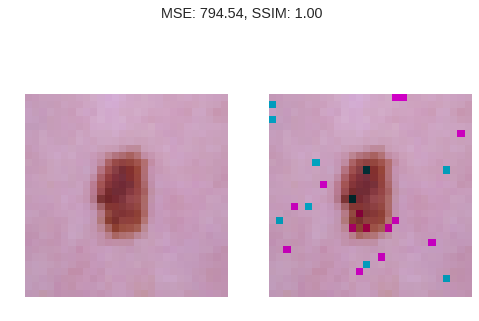

/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


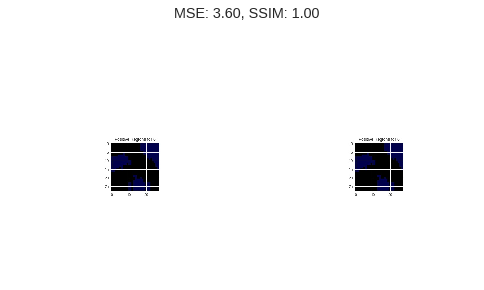

Done for  181 / 200


/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


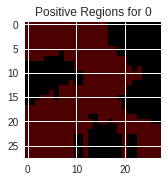

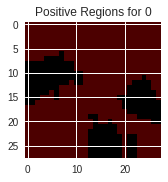

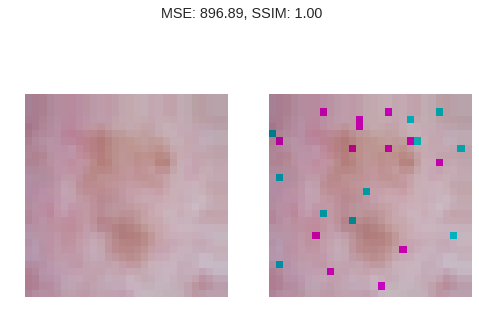

/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


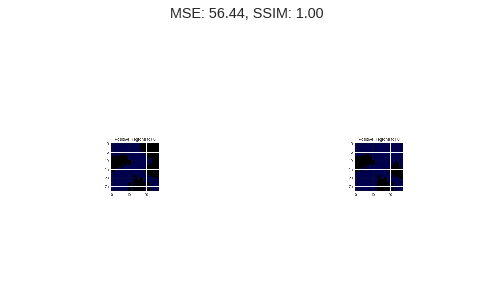

Done for  182 / 200


/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


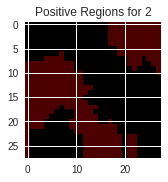

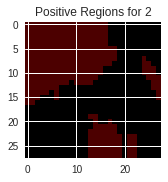

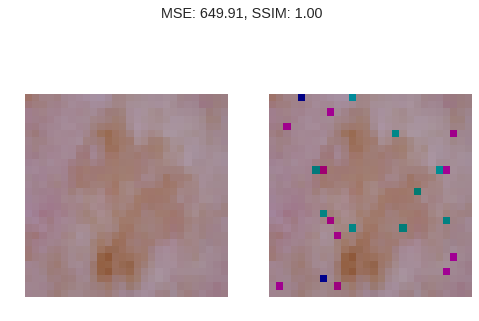

/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


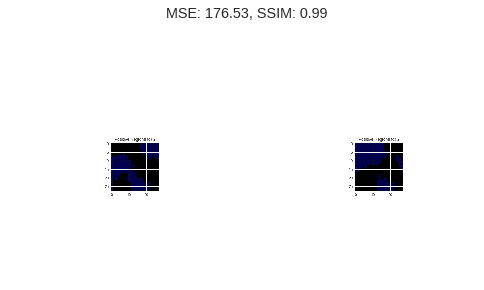

Done for  183 / 200


/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


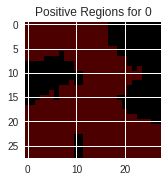

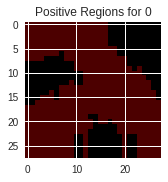

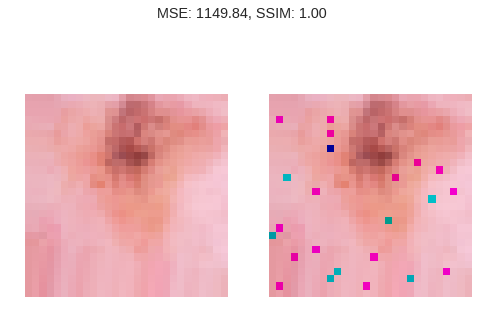

/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


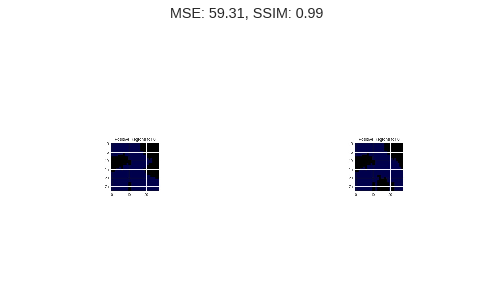

Done for  184 / 200


/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


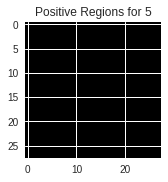

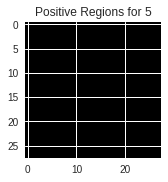

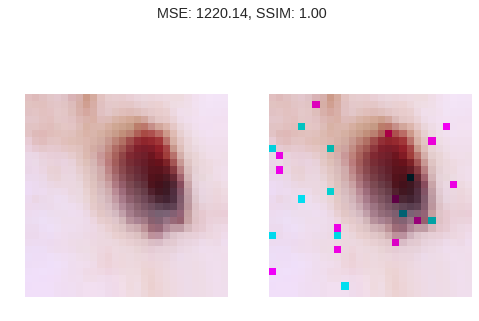

/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


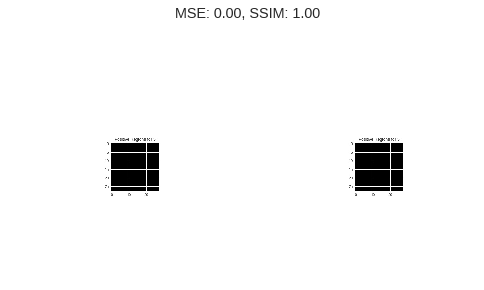

Done for  185 / 200


/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


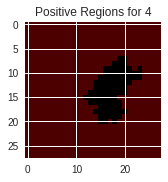

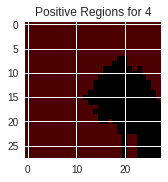

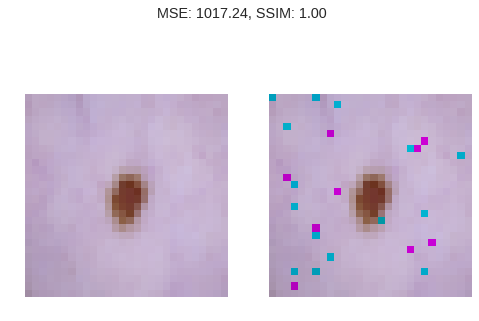

/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


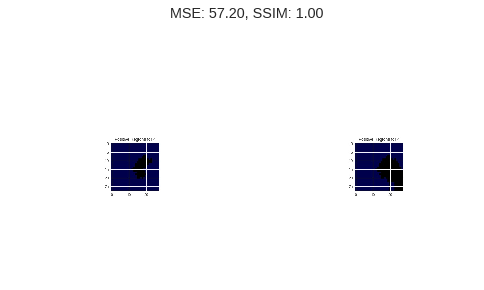

Done for  186 / 200


/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


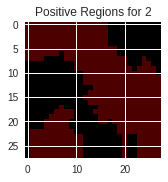

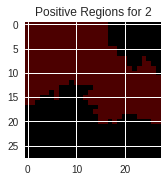

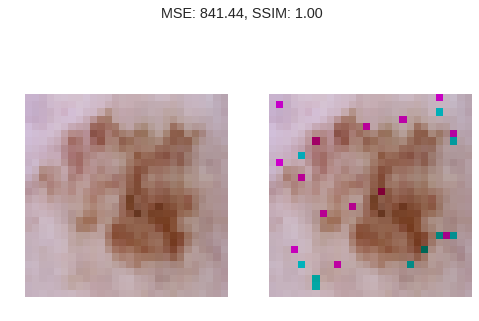

/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


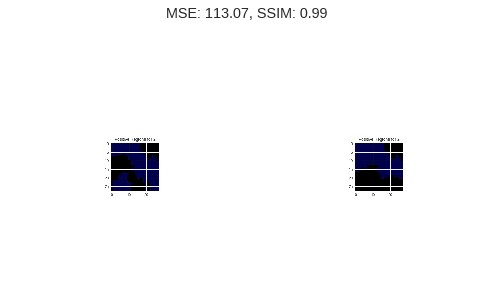

Done for  187 / 200


/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


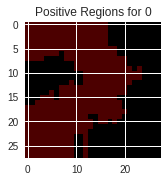

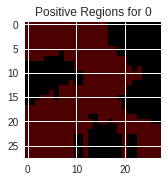

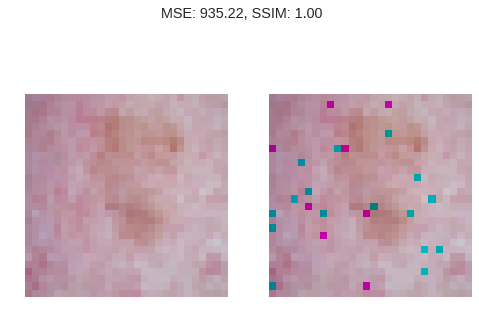

/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


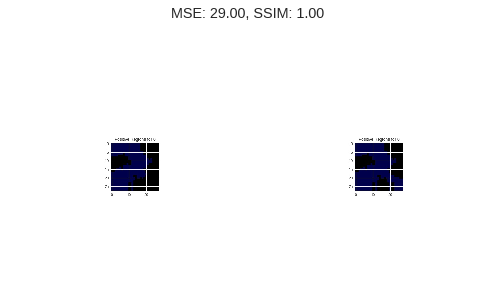

Done for  188 / 200


/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


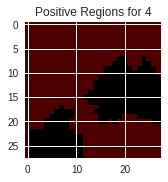

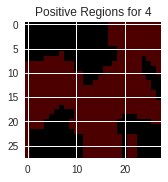

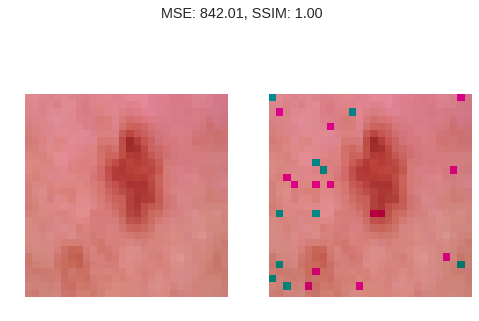

/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


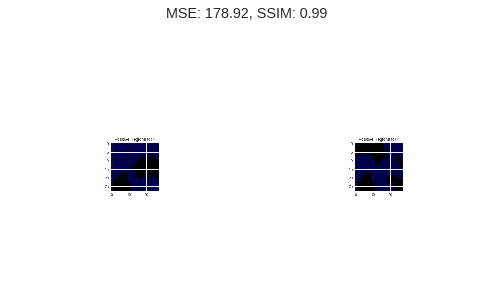

Done for  189 / 200


/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


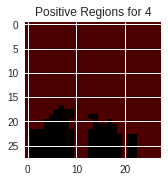

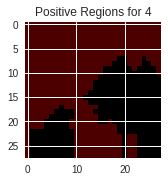

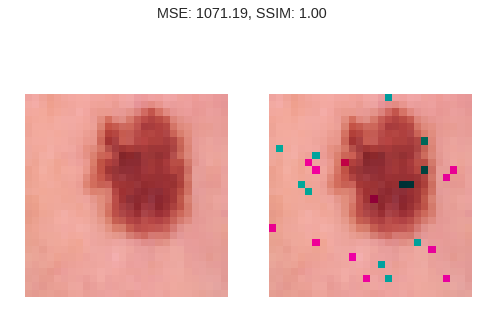

/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


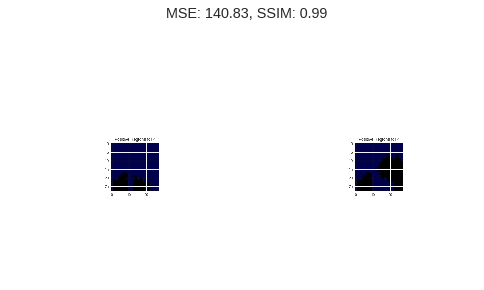

Done for  190 / 200


/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


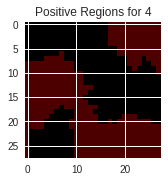

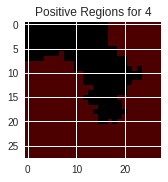

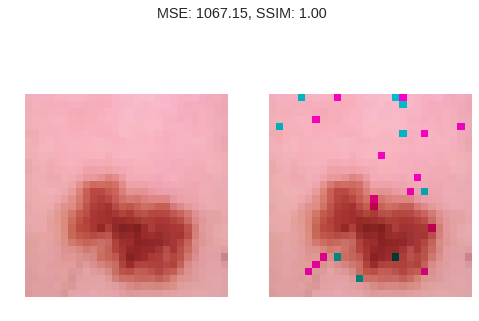

/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


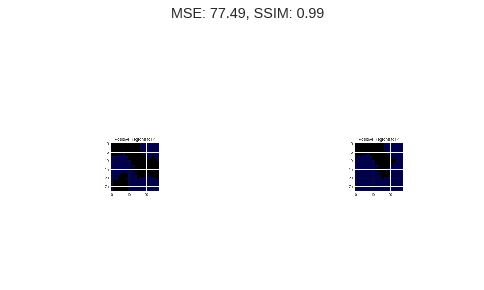

Done for  191 / 200


/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


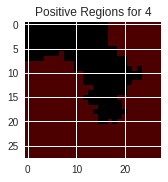

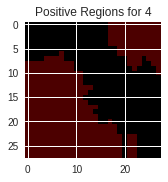

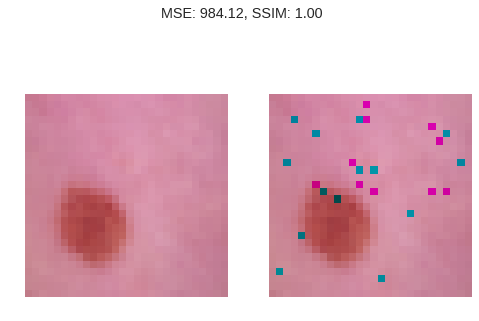

/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


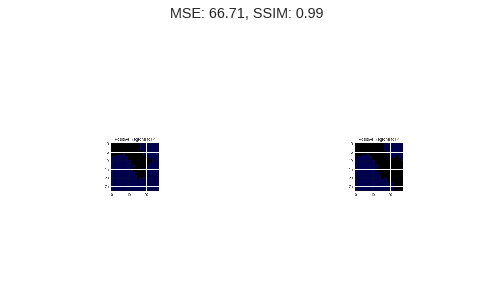

Done for  192 / 200


/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


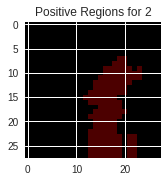

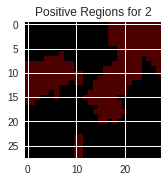

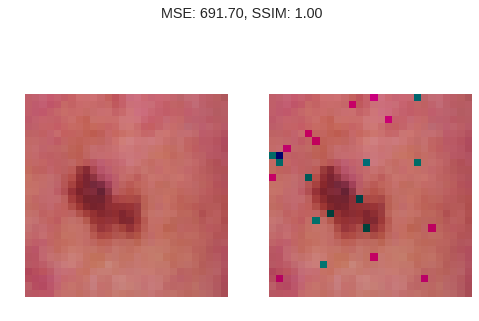

/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


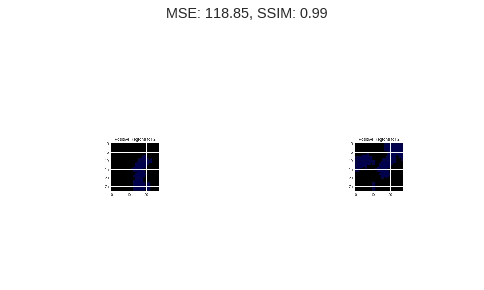

Done for  193 / 200


/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


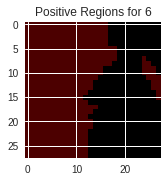

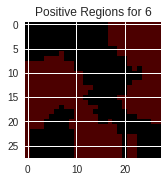

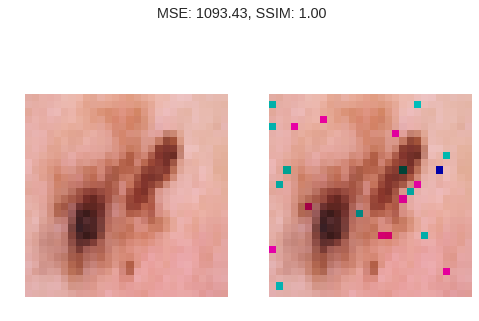

/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


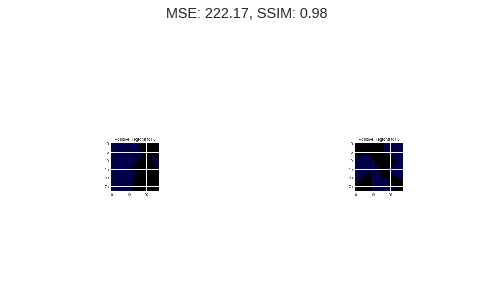

Done for  194 / 200


/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


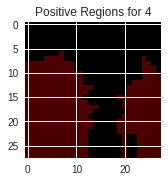

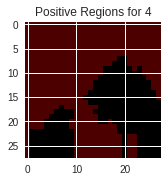

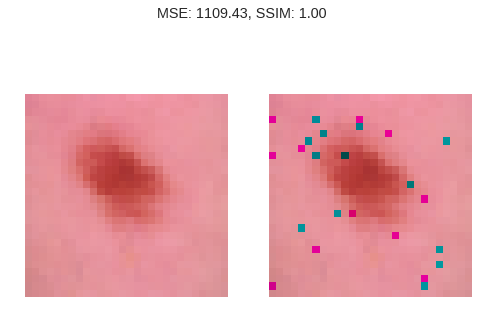

/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


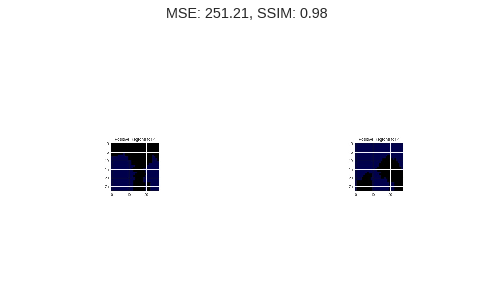

Done for  195 / 200


/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


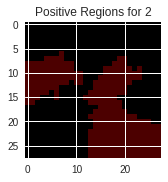

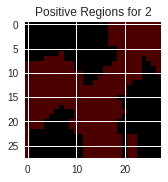

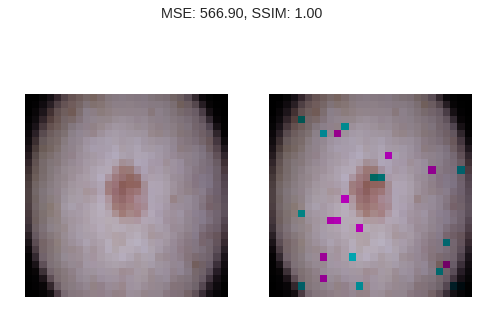

/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


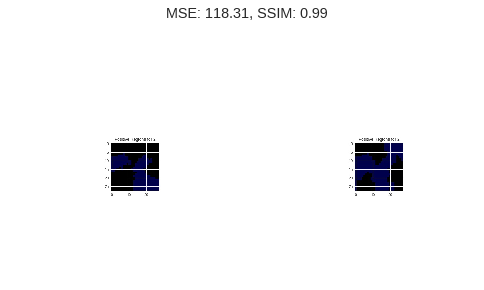

Done for  196 / 200


/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


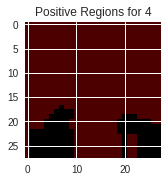

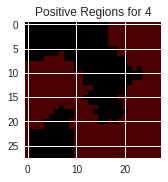

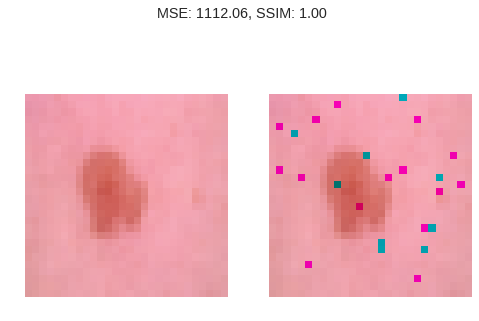

/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


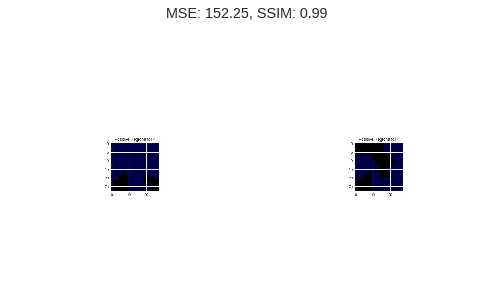

Done for  197 / 200


/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


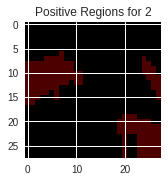

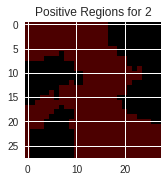

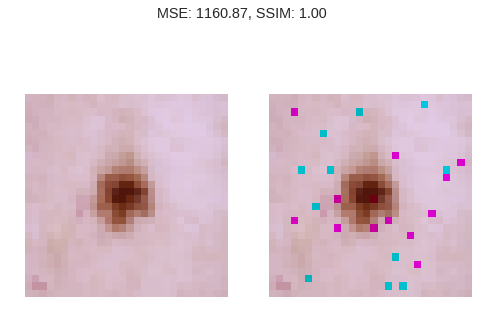

/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


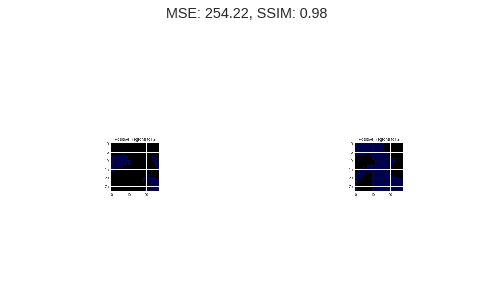

Done for  198 / 200


/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


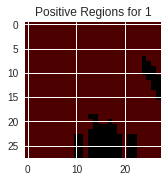

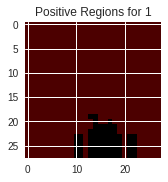

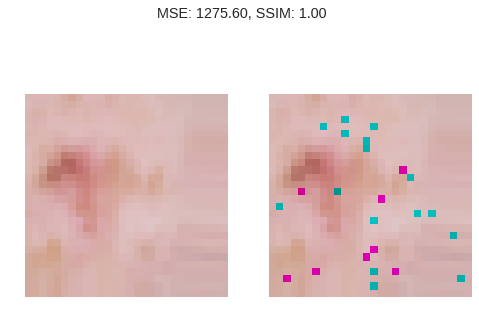

/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


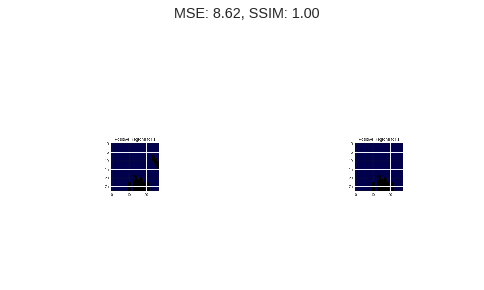

Done for  199 / 200


In [221]:
for i in range(number_of_samples):
  image = x_test[i]
  output = y_test[i]
  
  original_filename = "/content/gdrive/My Drive/8th Semester Project/test_1.jpeg"
  original_image_explanation = return_explanation_image(image,output,original_filename)
  
  noisy_input = add_noise(image)
  
  noisy_exp_filename = "/content/gdrive/My Drive/8th Semester Project/test_2.jpeg"
  noisy_image_explanation = return_explanation_image(noisy_input,output,noisy_exp_filename)
  
  m1,s1 = compare_images(image,noisy_input,"Original Images")
  m2,s2 = compare_images(original_image_explanation,noisy_image_explanation,"Explanations")
  
  stability = m2/m1
  
  stabilities.append(stability)
  print("Done for ",i,'/',number_of_samples)

In [0]:
mean_stability = sum(stabilities)/len(stabilities)

In [223]:
print("Mean Stability of the Model is : ",mean_stability)

Mean Stability of the Model is :  0.1128044146263678
